# **Business Cases Course**

<br>

- **Group Project 2022/2023**
- **Academic Year: 2020-2023 | 2nd Semester**
- **Professor: Nuno António**

<br>

- **"Case 2: Market Basket Analysis"**
- **Asian Food Restaurant from Company C**
- **This notebook uses the *Case2_AsianRestaurant_Cyprus_2018.txt* dataset**


<br>

> **Group composed by:**<p>
> Ana Carolina Ottavi, nº 20220541<p>
> Carolina Bezerra, nº 20220392 <p>
> Duarte Girão, nº 20220670<p>
> João Pólvora, nº 20221037<p>
> Luca Loureiro, nº 20221750<p>

## 📖 Introduction
    
Within the scope of __Business Cases for Data Science__, it was proposed a project, where the groups' ability to deliver a market basket analysis in accordance with the different features included in a dataset containing 84.109 records would be tested. However, the company C that ownes this restaurant realized that they are not having enough profits and therefore, wishes to better understand their customers and its preferences.
    
Therefore, the business goal determined for this project was to develop a market basket analysis. C expects to gain insights in terms of creation of menus, introduction of new products, understand substitute products, recommending/promoting cross-selling, customer segmentation and other possible results depending on the findings. 

C has several questions that it hopes to get answers to:
- Are there any differences between dine-inn customers and delivery customers?
- Is the product offering adequate (e.g., do customers make strange combination of products) ?
- Are there any patterns in consumption that may indicate tendencies?

<br>

## 📖Dataset description

This notebook uses the Case2_AsianRestaurant_Cyprus_2018.txt. The Dataset is related with all sales transactions of a restaurant located in Nicosia, the capital of Cyprus.<br> This asian food restaurant is inserted in a company C, with restaurants spread all over the this country. <br> This restaurant is struggling to maintain its profit margin and continuous growth due to increasing competition and customers’ changes in habits. To try to revert this process, C wants to take advantage of its sales data to understand customers’ patterns of consumption and preferences.

The dataset is composed of the following columns:
- **DocNumber**: number of the document. The document number repeats in as many rows as the rows in the original document (invoice)
- **ProductDesignation**: product designation
- **ProductFamily**: name of the family of the product. A product can only be member of one only family
- **Qty**: quantity
- **TotalAmount**: sale price of the total quantity
- **InvoiceDateHour**: date and hour when the document was issued
- **EmployeeID**: ID of the employee who issued the document
- **IsDelivery**: indication if sale was a delivery or a dine-inn (1:
delivery, 0: dine-inn)
- **Pax**: number of persons at the table
- **CustomerID**: ID of the customer (if a customer record was
assigned to the sale)
- **CustomerCity**: city of the customer (usually only employed in
delivery)
- **CustomerSince**: date of creation of the customer

Note: Each row in the dataset represents a document line (invoice line).

# **1. Initial Setup**

- 1.1) Importing needed libraries
- 1.2) Defining functions

In [1]:
# Install in case its necessary
    # pip install mlxtend
    # pip install networkx
    # pip install WorldCloud
    # pip install geopy
    # pip install folium
    
# Imports
import category_encoders as ce
import datetime as dt
import folium
import joypy
import itertools
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import missingno as msno
import networkx as nx
import numpy as np
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import re
import seaborn as sns
import scipy.stats as stats
import warnings
import ydata_profiling
warnings.filterwarnings("ignore")

# From mlxtend
# Associated Rules related imports
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# From other libraries
from datetime import datetime, timedelta
from dateutil import parser
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy import exc
from itertools import cycle,islice, product
from math import ceil
from matplotlib import ticker
from plotly.subplots import make_subplots
from os.path import join
from ydata_profiling import ProfileReport
from wordcloud import WordCloud

# Setting Visual Theme
sns.set_theme(style = 'white', palette = None)

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


# **2. Data Understanding**

- **2.1) Collect Initial Data: Reading the original file**
- 2.1.1) Reading the original file
- 2.1.2) Making a safety copy of the dataset
- **2.3) Describe Data: General description of data**
- **2.4) Explore Data**
- 2.4.1) Counting the number of rows and columns 
- 2.4.2) Checking the top and bottom from the dataset
- 2.4.3) Checking Data types
- 2.4.4) Describe Data: General description of data after changing dtypes
- 2.4.5) Checking the number of unique values per feature
- **2.6) Verify Data Quality**
- 2.6.1) Checking Duplicated Values
- 2.6.2) Checking Missing Values
- 2.6.3) Checking CustomerSince and InvoiceDateHour
- 2.6.4) Checking DocNumber
- 2.6.5) Checking ProductDesignation and ProductFamily
- 2.6.6) Checking Qty and Total Amount
- 2.6.7) Checking EmployeeID
- 2.6.8) Checking Pax and CustomerID

- **2.1) Collect Initial Data: Reading the original file**
- 2.1.1) Reading the original file

In [2]:
'''
dtypes = {'DocNumber':'category',
          'ProductDesignation':'category', 
          'ProductFamily':'category',
          'Qty':'category', 
          'TotalAmount': 'category',
          'InvoiceDateHour':'category',
          'EmployeeID':'category',
          'IsDelivery':'category',
          'Pax':'category',
          'CustomerID':'category',
          'CustomerCity':'category',
          'CustomerSince':'category'}
df = pd.DataFrame(pd.read_csv("Case2_AsianRestaurant_Cyprus_2018.txt",sep=";", dtype=dtypes))'''

# Reading the dataframe.
df = pd.DataFrame(pd.read_csv("Case2_AsianRestaurant_Cyprus_2018.txt",sep=";"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84109 entries, 0 to 84108
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DocNumber           84109 non-null  object 
 1   ProductDesignation  84109 non-null  object 
 2   ProductFamily       84109 non-null  object 
 3   Qty                 84109 non-null  float64
 4   TotalAmount         84109 non-null  object 
 5   InvoiceDateHour     84109 non-null  object 
 6   EmployeeID          84109 non-null  int64  
 7   IsDelivery          84109 non-null  int64  
 8   Pax                 84109 non-null  int64  
 9   CustomerID          84109 non-null  int64  
 10  CustomerCity        31248 non-null  object 
 11  CustomerSince       29142 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 7.7+ MB


- **2.1) Collect Initial Data: Reading the original file**
- 2.1.2) Making a safety copy of the dataset

In [3]:
# Make a first security copy of our original dataset.

df_original = df.copy()

- **2.3) Describe Data: General description of data**

In [4]:
# Check descriptive statistics before replacing missing values.
# Here, we can have a good sensibility on data.

df.describe(include="all").T

count unique                      top   freq  \
DocNumber             84109  11147          TK0110053522018     46   
ProductDesignation    84109    255      MINERAL WATER 1.5LT   7061   
ProductFamily         84109     27                 STARTERS  14148   
Qty                 84109.0    NaN                      NaN    NaN   
TotalAmount           84109    374                     3,00   9733   
InvoiceDateHour       84109  11146  2018-12-24 22:59:54.000     46   
EmployeeID          84109.0    NaN                      NaN    NaN   
IsDelivery          84109.0    NaN                      NaN    NaN   
Pax                 84109.0    NaN                      NaN    NaN   
CustomerID          84109.0    NaN                      NaN    NaN   
CustomerCity          31248     17                   EGKOMI   9423   
CustomerSince         29142   2109  2005-12-06 15:00:00.000   1164   

                           mean           std  min  25%  50%      75%      max  
DocNumber                   NaN           NaN  NaN  NaN  NaN      NaN      NaN  
ProductDesignation          NaN           NaN  NaN  NaN  NaN      NaN      NaN  
ProductFamily               NaN           NaN  NaN  NaN  NaN      NaN      NaN  
Qty                    1.261256       0.92378  1.0  1.0  1.0      1.0     53.0  
TotalAmount                 NaN           NaN  NaN  NaN  NaN      NaN      NaN  
InvoiceDateHour             NaN           NaN  NaN  NaN  NaN      NaN      NaN  
EmployeeID             3.591221      3.682017  2.0  2.0  2.0      5.0     27.0  
IsDelivery             0.371518      0.483213  0.0  0.0  0.0      1.0      1.0  
Pax                      3.3008      3.693792  0.0  1.0  2.0      4.0    200.0  
CustomerID          12633.06576  21952.076038  0.0  0.0  0.0  16429.0  69101.0  
CustomerCity                NaN           NaN  NaN  NaN  NaN      NaN      NaN  
CustomerSince               NaN           NaN  NaN  NaN  NaN      NaN      NaN

**Key Takeawyays**
- There are repeated DocNumbers, which is possible since each DocNumber is repeated for how many products there are in the invoice. The restaurant has 11.147 invoices for the year of 2018.
- There are 255 different product designations and 27 different product families. Mineral water was the most requested product (7061 times). Starters is the most requested family of products (14.148 times).
- Most people order 1 unit of each product.
- The most ordered products have a cost of 3 to the customer over the total quantity. However there's a wrong ponctuation for this column - there shouldnt be a comma, instead, it should be a dot.
- The most busy day in terms of hours is the 24th of December of 2018, which is the Christmas Eve. Makes sense that more people come in the holidays.
- There isn't an employee 1 in the restaurant and theres an employee 27. Employee 2 takes the most orders
- Most orders are for dine-in
- The majority of tables answered have only 1 person and the maximum value for pax is 200
- Most customers don't have an ID
- Customers registered are from 17 different cities and most cusotmers are from Egkomi, which is a suburb and municipality of the Cypriot capital Nicosia
- The customers of this restaurant have been customers of it for a long while

In [5]:
# # Visualizing the profilling of our dataset to have a general sensibility on data.
# df_profilling =ydata_profiling.ProfileReport(df)
# partial_df_profilling =ydata_profiling.ProfileReport(partial_df)
# df_profilling. to_file("df_report.html")
# partial_df_profilling. to_file("partial_df_report.html")

- **2.4) Explore Data**
- 2.4.1) Counting the number of rows and columns 

In [6]:
# Count the number of rows and columns.
# Get more sensibility on data.
    # 84109 rows (records)
    # 12 columns (variables)

df.shape

(84109, 12)

- **2.4) Explore Data**
- 2.4.2) Checking the top and bottom from the dataset

In [7]:
# Checking the first two on top and on the bottom of the dataset df
# Is there a difference between TK and TKD?

df_sliced = df.head(2)
df_sliced = df_sliced.append(df.tail(2))
df_sliced

DocNumber           ProductDesignation ProductFamily  Qty  \
0      TKD0320000012018                     1/2 DUCK      STARTERS  1.0   
1      TKD0320000012018                  SPRING ROLL      STARTERS  8.0   
84107   TK0110054642018  TOFFEE BANANA COMPLEMENTARY       DESSERT  1.0   
84108   TK0110054642018  TOFFEE BANANA COMPLEMENTARY       DESSERT  1.0   

      TotalAmount          InvoiceDateHour  EmployeeID  IsDelivery  Pax  \
0           27,10  2018-01-01 19:12:12.000           2           1    1   
1           17,60  2018-01-01 19:12:12.000           2           1    1   
84107        0,00  2018-12-31 22:45:17.000           2           0    9   
84108        0,00  2018-12-31 22:45:17.000           2           0    9   

       CustomerID CustomerCity CustomerSince  
0           53908     LEYKOSIA           NaN  
1           53908     LEYKOSIA           NaN  
84107           0          NaN           NaN  
84108           0          NaN           NaN

- **2.4) Explore Data**
- 2.4.3) Data types

In [8]:
# Check dataset data types.
df.dtypes

DocNumber              object
ProductDesignation     object
ProductFamily          object
Qty                   float64
TotalAmount            object
InvoiceDateHour        object
EmployeeID              int64
IsDelivery              int64
Pax                     int64
CustomerID              int64
CustomerCity           object
CustomerSince          object
dtype: object

In [9]:
# Here, we are changing the three datatypes.
# There was an error converting dtype of 'TotalAmount' from object to float because there was a comma (,)
# instead of (.) for decimals units.

df.TotalAmount = df.TotalAmount.apply(lambda x:float(str(x.replace(',','.'))))
df['InvoiceDateHour'] = pd.to_datetime(df['InvoiceDateHour'])
df['CustomerSince'] = pd.to_datetime(df['CustomerSince'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84109 entries, 0 to 84108
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DocNumber           84109 non-null  object        
 1   ProductDesignation  84109 non-null  object        
 2   ProductFamily       84109 non-null  object        
 3   Qty                 84109 non-null  float64       
 4   TotalAmount         84109 non-null  float64       
 5   InvoiceDateHour     84109 non-null  datetime64[ns]
 6   EmployeeID          84109 non-null  int64         
 7   IsDelivery          84109 non-null  int64         
 8   Pax                 84109 non-null  int64         
 9   CustomerID          84109 non-null  int64         
 10  CustomerCity        31248 non-null  object        
 11  CustomerSince       29142 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 7.7+ MB


- **2.4) Explore Data**
- 2.4.4) Describe Data: General description of data after changing dtypes

In [10]:
# General sensibility on data.

df.describe(include="all").T

count unique                  top   freq  \
DocNumber             84109  11147      TK0110053522018     46   
ProductDesignation    84109    255  MINERAL WATER 1.5LT   7061   
ProductFamily         84109     27             STARTERS  14148   
Qty                 84109.0    NaN                  NaN    NaN   
TotalAmount         84109.0    NaN                  NaN    NaN   
InvoiceDateHour       84109  11146  2018-12-24 22:59:54     46   
EmployeeID          84109.0    NaN                  NaN    NaN   
IsDelivery          84109.0    NaN                  NaN    NaN   
Pax                 84109.0    NaN                  NaN    NaN   
CustomerID          84109.0    NaN                  NaN    NaN   
CustomerCity          31248     17               EGKOMI   9423   
CustomerSince         29142   2109  2005-12-06 15:00:00   1164   

                                 first                    last         mean  \
DocNumber                          NaT                     NaT          NaN   
ProductDesignation                 NaT                     NaT          NaN   
ProductFamily                      NaT                     NaT          NaN   
Qty                                NaT                     NaT     1.261256   
TotalAmount                        NaT                     NaT      9.83142   
InvoiceDateHour    2018-01-01 19:12:12 2018-12-31 22:45:17.000          NaN   
EmployeeID                         NaT                     NaT     3.591221   
IsDelivery                         NaT                     NaT     0.371518   
Pax                                NaT                     NaT       3.3008   
CustomerID                         NaT                     NaT  12633.06576   
CustomerCity                       NaT                     NaT          NaN   
CustomerSince      2005-12-06 15:00:00 2019-09-26 20:18:09.877          NaN   

                             std  min  25%  50%      75%      max  
DocNumber                    NaN  NaN  NaN  NaN      NaN      NaN  
ProductDesignation           NaN  NaN  NaN  NaN      NaN      NaN  
ProductFamily                NaN  NaN  NaN  NaN      NaN      NaN  
Qty                      0.92378  1.0  1.0  1.0      1.0     53.0  
TotalAmount            20.656789  0.0  3.0  6.9     12.6   3000.0  
InvoiceDateHour              NaN  NaN  NaN  NaN      NaN      NaN  
EmployeeID              3.682017  2.0  2.0  2.0      5.0     27.0  
IsDelivery              0.483213  0.0  0.0  0.0      1.0      1.0  
Pax                     3.693792  0.0  1.0  2.0      4.0    200.0  
CustomerID          21952.076038  0.0  0.0  0.0  16429.0  69101.0  
CustomerCity                 NaN  NaN  NaN  NaN      NaN      NaN  
CustomerSince                NaN  NaN  NaN  NaN      NaN      NaN

**Key Takeaways:**
- The mean of total amount of value paid for a specific quantity of a product is around 9.83 and the max is 3000

- **2.4) Explore Data**
- 2.4.5) Checking the number of unique values per feature

In [11]:
# Get the number of unique values per feature.
# Check each feature cardinality.

df.nunique().to_frame(name = 'Number of unique values per feature')

Number of unique values per feature
DocNumber                                         11147
ProductDesignation                                  255
ProductFamily                                        27
Qty                                                  24
TotalAmount                                         374
InvoiceDateHour                                   11146
EmployeeID                                            7
IsDelivery                                            2
Pax                                                  45
CustomerID                                         2316
CustomerCity                                         17
CustomerSince                                      2109

In [12]:
# Get unique values for all the features

columns = df.columns.to_list()

for column in columns:
    #print("\n")
    print("Column Name:", column)
    print(df[column].unique())
    print("\n")

Column Name: DocNumber
['TKD0320000012018' 'TKD0320000022018' 'TKD0320000032018' ...
 'TK0110054622018' 'TK0110054632018' 'TK0110054642018']


Column Name: ProductDesignation
['1/2 DUCK' 'SPRING ROLL' 'SWEET SOUR CHICKEN' 'LEMON CHICKEN' 'BEEF BBS'
 'STEAMED RICE' 'SPECIAL MONTPARNASSE RICE' 'NOODLES WITH MEAT' ' NO MEAT'
 '7UP' 'DELIVERY CHARGE' '1/4 DUCK' 'SALT PEPPER PRAWNS' 'SESAME PRAWNS'
 'BEEF OYSTER SAUCE' 'EGG FRIED RICE' 'CHICKEN CASHEW NUTS'
 'CALIFORNIA MAKI' 'PHILADELPHIA MAKI' 'TEMPURA MAKI'
 'FRIED SHREDDED BEEF' 'SPICY SALMON MAKI' 'CHICKEN SATAY' 'NAAN'
 '1/6 DUCK' 'DIET SPRITE' 'JIRA PULAO' 'ALOO BAINGAN'
 'CAULIFLOWER GUNCHAO' 'PORK WITH GINGER' 'SWEETCORN SOUP'
 'PRAWNS OYSTER SAUCE' 'TANDOORI TRILOGY' 'CHICK TIKKA MASALA'
 'ALOO PALAK' 'BABY PORK' 'CHICKEN MIXED VEGETABLES' 'SAMOSA CHICKEN'
 'MALAI MANGO CHICK' 'CHICKEN VINDALOO' 'MIXED PLATTER SUSHI' 'EBI SUSHI'
 'CHICKEN OYSTER SAUCE' 'SALT PEPPER SQUID' ' EXTRA SAUCE'
 'NOODLES BEAN SPROUTS' 'ONION BADJI' 'KADHA

- **2.6) Verify Data Quality**
- 2.6.1) Checking Duplicated Values

In [13]:
# Check the duplicated values on our dataset.
# There 3923 duplicated records.

df.duplicated().sum()

3923

- **2.6) Verify Data Quality**
- 2.6.2) Checking Missing Values

In [14]:
# Represent a missing values in pandas with a NaN value.

df.replace("", np.nan, inplace=True)

In [15]:
# Check the missing values on our dataset.

df.isna().sum()

DocNumber                 0
ProductDesignation        0
ProductFamily             0
Qty                       0
TotalAmount               0
InvoiceDateHour           0
EmployeeID                0
IsDelivery                0
Pax                       0
CustomerID                0
CustomerCity          52861
CustomerSince         54967
dtype: int64

In [16]:
# Getting the number of null values for the group of deliveries and for the total. 

print(df.loc[df["IsDelivery"]==0, ].isnull().sum()) # Representing Dine-Inns.
print(df.loc[df["IsDelivery"]>0, ].isnull().sum()) # Representing Deliveries.

DocNumber                 0
ProductDesignation        0
ProductFamily             0
Qty                       0
TotalAmount               0
InvoiceDateHour           0
EmployeeID                0
IsDelivery                0
Pax                       0
CustomerID                0
CustomerCity          52861
CustomerSince         52861
dtype: int64
DocNumber                0
ProductDesignation       0
ProductFamily            0
Qty                      0
TotalAmount              0
InvoiceDateHour          0
EmployeeID               0
IsDelivery               0
Pax                      0
CustomerID               0
CustomerCity             0
CustomerSince         2106
dtype: int64


<AxesSubplot:>

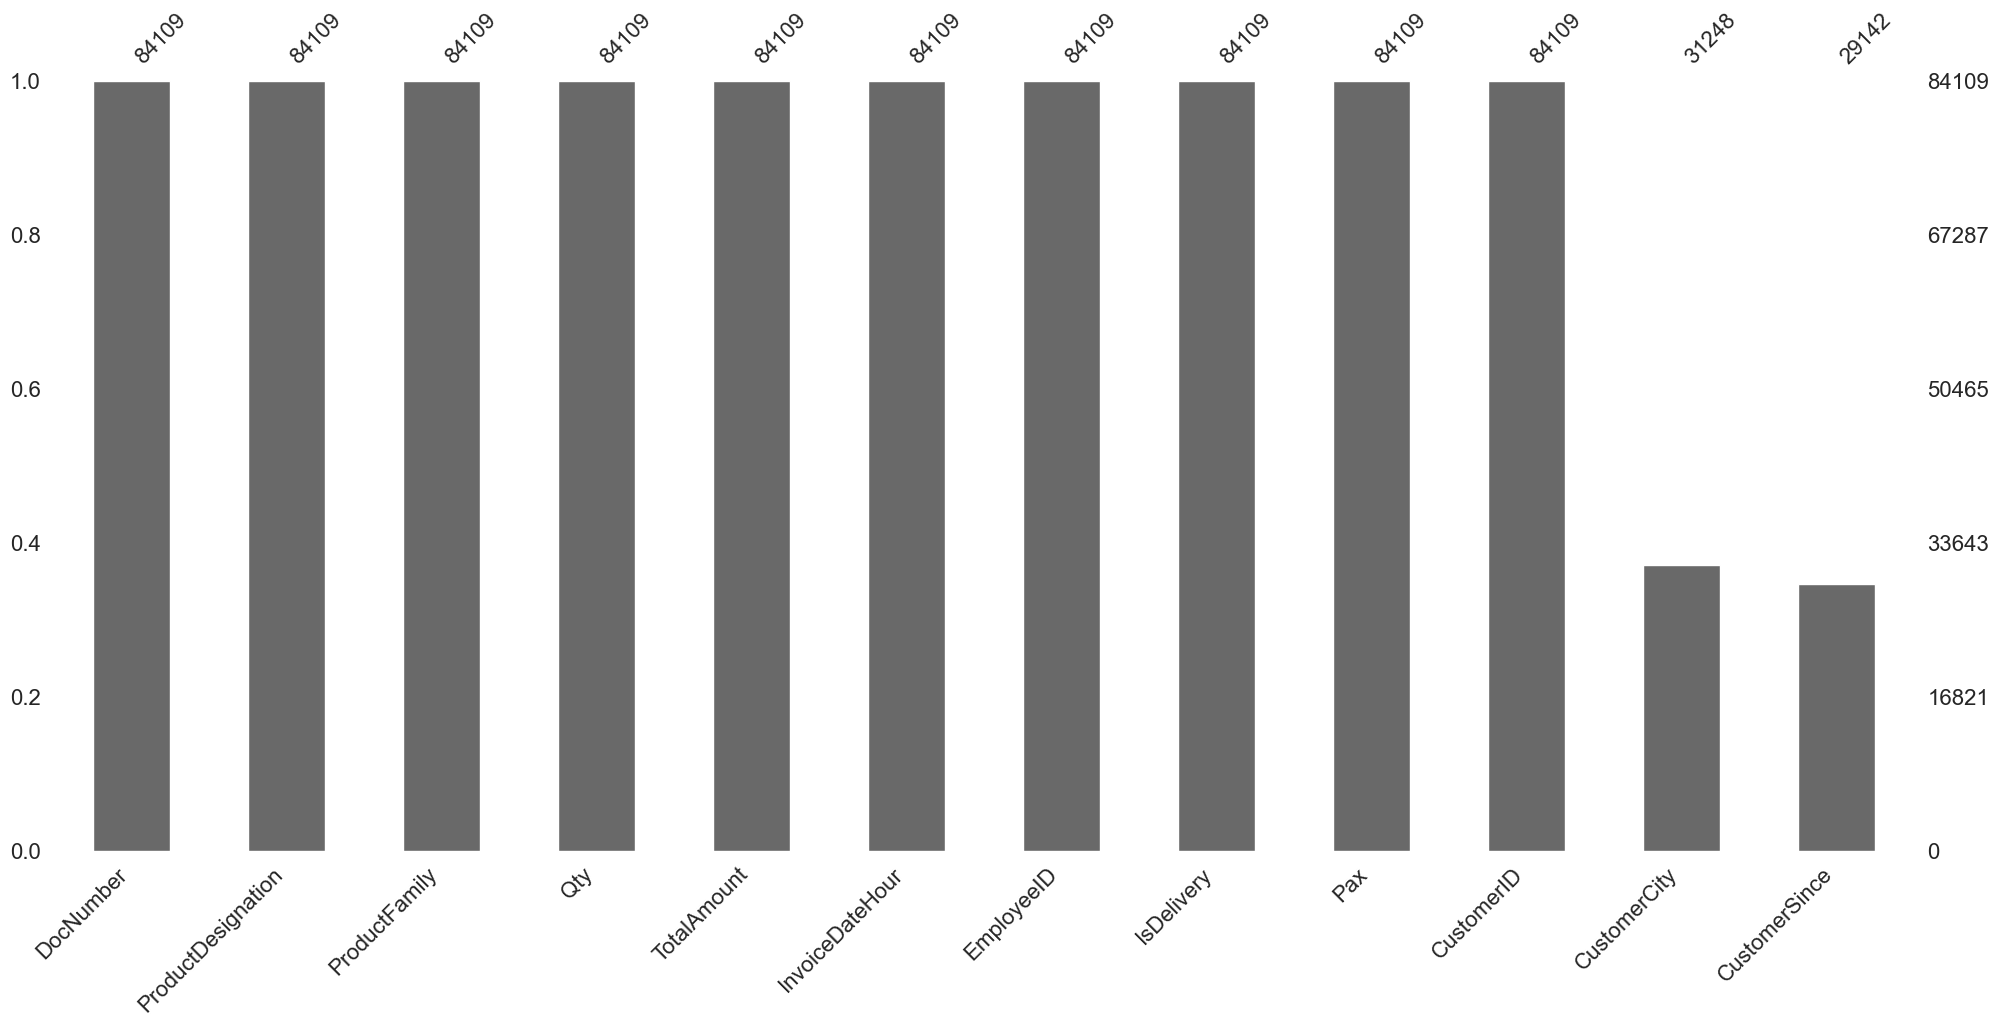

In [17]:
# Taking a visual look at the missing values per variable.
# We can easily check that the variables 'CustomerCity' and 'CustomerSince' have a significant amount of missing values.

msno.bar(df)

- **2.6) Verify Data Quality**
- 2.6.3) Checking CustomerSince and InvoiceDateHour

In [18]:
# InvoiceDateHour
# Checking the unique values of this variable.

df['InvoiceDateHour'].sort_values().unique()

array(['2018-01-01T19:12:12.000000000', '2018-01-01T19:12:28.000000000',
       '2018-01-01T20:13:42.000000000', ...,
       '2018-12-31T22:33:22.000000000', '2018-12-31T22:43:59.000000000',
       '2018-12-31T22:45:17.000000000'], dtype='datetime64[ns]')

In [19]:
# CustomerSince
# Checking the unique values of this variable.
# This plataform exists since 2005, which is the date of the oldest client.

df['CustomerSince'].sort_values().unique(), 
print('The total amount of impossible values is:', df[df['CustomerSince']>'2018-12-31 23:59:59'].shape[0])

The total amount of impossible values is: 793


In [20]:
# Under our understanding, it is impossible that CustomerSince is higher than InvoiceDateHour:
    # InvoiceDateHour: date and hour when the document was issued.
    # CustomerSince: date the customer was created.
    
df[df['InvoiceDateHour'] < df['CustomerSince']].shape[0]
print('The total amount of impossible values is:', df[df['InvoiceDateHour'] < df['CustomerSince']].shape[0])

The total amount of impossible values is: 916


- **2.6) Verify Data Quality**
- 2.6.4) Checking DocNumber

In [21]:
# DocNumber
# Checking the main values amount of this variables.
# Some invoices include orders with a lot of different products

df['DocNumber'].value_counts().sort_values(ascending=False)

TK0110053522018     46
TK0110044742018     46
TK0110007092018     41
TK0110054302018     40
TK0110016132018     37
                    ..
TK0110047282018      1
TK0110006252018      1
TK0110008442018      1
TKD0320024862018     1
TKD0320033622018     1
Name: DocNumber, Length: 11147, dtype: int64

In [22]:
# What's WITH Product Family?
# Getting our understanding of ProductFamily per DocNumber.

pd.crosstab(df['DocNumber'], df['ProductFamily'])

ProductFamily     BREADS IND  DESSERT  DESSERT IND  DRINKS  EXTRAS  HOLDS  \
DocNumber                                                                   
TK0110000012018            1        0            0       1       0      0   
TK0110000022018            1        1            0       2       0      1   
TK0110000032018            0        0            0       1       0      0   
TK0110000042018            1        0            1       2       0      0   
TK0110000052018            1        0            0       1       0      0   
...                      ...      ...          ...     ...     ...    ...   
TKD0320044492018           0        0            0       0       0      0   
TKD0320044502018           0        0            0       0       1      0   
TKD0320044512018           0        0            0       0       1      0   
TKD0320044522018           0        0            0       0       1      0   
TKD0320044532018           1        0            0       0       1      0   

ProductFamily     JAP SUSHI  MAIN IND  MEAT  NEW SUSHI  ...  SOUPS  SPIRITS  \
DocNumber                                               ...                   
TK0110000012018           0         1     1          0  ...      1        0   
TK0110000022018           0         1     1          0  ...      0        3   
TK0110000032018           0         0     2          0  ...      0        0   
TK0110000042018           0         2     0          0  ...      0        0   
TK0110000052018           0         0     0          0  ...      0        0   
...                     ...       ...   ...        ...  ...    ...      ...   
TKD0320044492018          0         0     2          0  ...      0        0   
TKD0320044502018          0         0     1          0  ...      0        0   
TKD0320044512018          0         0     0          0  ...      0        0   
TKD0320044522018          1         0     1          0  ...      0        0   
TKD0320044532018          0         0     0          0  ...      0        0   

ProductFamily     START IND  STARTERS  SUSHI  TSANTES  VEG  VEG IND  \
DocNumber                                                             
TK0110000012018           0         1      0        0    0        0   
TK0110000022018           0         3      0        0    0        0   
TK0110000032018           0         1      0        0    0        0   
TK0110000042018           2         0      0        0    0        1   
TK0110000052018           1         0      0        0    0        1   
...                     ...       ...    ...      ...  ...      ...   
TKD0320044492018          0         0      0        0    0        0   
TKD0320044502018          0         2      0        0    0        0   
TKD0320044512018          0         2      0        0    0        0   
TKD0320044522018          0         2      0        0    0        0   
TKD0320044532018          1         0      0        0    0        1   

ProductFamily     WHITE WINE  WITH  
DocNumber                           
TK0110000012018            1     0  
TK0110000022018            1     0  
TK0110000032018            0     0  
TK0110000042018            0     0  
TK0110000052018            1     0  
...                      ...   ...  
TKD0320044492018           0     0  
TKD0320044502018           0     0  
TKD0320044512018           0     0  
TKD0320044522018           0     0  
TKD0320044532018           0     0  

[11147 rows x 27 columns]

In [23]:
# Why are there products registered that has a TotalAmount=0 or TotalAmount equal to a few cents?
# Getting our understanding of TotalAmount per DocNumber.

pd.crosstab(df['DocNumber'], df['TotalAmount'])

TotalAmount       0.00     0.06     0.10     0.12     0.18     0.50     \
DocNumber                                                                
TK0110000012018         0        0        0        0        0        0   
TK0110000022018         2        0        0        0        0        0   
TK0110000032018         0        0        0        0        0        0   
TK0110000042018         0        0        0        0        0        0   
TK0110000052018         0        0        0        0        0        0   
...                   ...      ...      ...      ...      ...      ...   
TKD0320044492018        0        0        0        0        0        0   
TKD0320044502018        0        0        0        0        0        0   
TKD0320044512018        0        0        0        0        0        0   
TKD0320044522018        0        0        0        0        0        0   
TKD0320044532018        0        0        0        0        0        0   

TotalAmount       0.70     1.00     1.15     1.20     ...  600.00   650.00   \
DocNumber                                             ...                     
TK0110000012018         0        0        0        0  ...        0        0   
TK0110000022018         0        0        0        0  ...        0        0   
TK0110000032018         0        0        0        0  ...        0        0   
TK0110000042018         0        0        0        0  ...        0        0   
TK0110000052018         0        0        0        0  ...        0        0   
...                   ...      ...      ...      ...  ...      ...      ...   
TKD0320044492018        0        0        0        0  ...        0        0   
TKD0320044502018        0        0        0        0  ...        0        0   
TKD0320044512018        0        0        0        0  ...        0        0   
TKD0320044522018        0        0        0        0  ...        0        0   
TKD0320044532018        0        0        0        0  ...        0        0   

TotalAmount       713.00   720.00   750.00   760.00   1064.00  1196.00  \
DocNumber                                                                
TK0110000012018         0        0        0        0        0        0   
TK0110000022018         0        0        0        0        0        0   
TK0110000032018         0        0        0        0        0        0   
TK0110000042018         0        0        0        0        0        0   
TK0110000052018         0        0        0        0        0        0   
...                   ...      ...      ...      ...      ...      ...   
TKD0320044492018        0        0        0        0        0        0   
TKD0320044502018        0        0        0        0        0        0   
TKD0320044512018        0        0        0        0        0        0   
TKD0320044522018        0        0        0        0        0        0   
TKD0320044532018        0        0        0        0        0        0   

TotalAmount       2160.00  3000.00  
DocNumber                           
TK0110000012018         0        0  
TK0110000022018         0        0  
TK0110000032018         0        0  
TK0110000042018         0        0  
TK0110000052018         0        0  
...                   ...      ...  
TKD0320044492018        0        0  
TKD0320044502018        0        0  
TKD0320044512018        0        0  
TKD0320044522018        0        0  
TKD0320044532018        0        0  

[11147 rows x 374 columns]

In [24]:
# Now we know employee that number of employees equal to ONE doesn't exist.
# The employees working in the restaurant at 2018 are designated with the nrs. 2, 4, 5, 6, 7, 23 and 27.
# Getting our understanding of EmployeeID per DocNumber.

pd.crosstab(df['DocNumber'], df['EmployeeID'])

EmployeeID        2   4   5   6   7   23  27
DocNumber                                   
TK0110000012018    9   0   0   0   0   0   0
TK0110000022018   19   0   0   0   0   0   0
TK0110000032018    5   0   0   0   0   0   0
TK0110000042018   10   0   0   0   0   0   0
TK0110000052018    6   0   0   0   0   0   0
...               ..  ..  ..  ..  ..  ..  ..
TKD0320044492018   4   0   0   0   0   0   0
TKD0320044502018   6   0   0   0   0   0   0
TKD0320044512018   5   0   0   0   0   0   0
TKD0320044522018   6   0   0   0   0   0   0
TKD0320044532018   4   0   0   0   0   0   0

[11147 rows x 7 columns]

In [25]:
# The fact that TK DocNumber have numbers when IsDelivery=0, 
# makes us believe that TK is code used for dine-ins and TKD is code used for deliveries.
# Getting our understanding of IsDelivery per DocNumber.

pd.crosstab(df['DocNumber'], df['IsDelivery'])

IsDelivery         0  1
DocNumber              
TK0110000012018    9  0
TK0110000022018   19  0
TK0110000032018    5  0
TK0110000042018   10  0
TK0110000052018    6  0
...               .. ..
TKD0320044492018   0  4
TKD0320044502018   0  6
TKD0320044512018   0  5
TKD0320044522018   0  6
TKD0320044532018   0  4

[11147 rows x 2 columns]

In [26]:
# Getting our understanding of the relationship between 'IsDelivery' and 'CustomerID'.
# We can check that all the times that the 'CustomerID' has no value, means that it is a 'DineIn' and not a delivery.

df['CustomerID'] = df['CustomerID'].astype('str')
df_deliveries = pd.crosstab(index=np.where(df['CustomerID']>'0','1','0'), columns=df['IsDelivery'])
df_deliveries.index=['Invoice with no customer ID','Invoice with customer ID']
df_deliveries

IsDelivery                       0      1
Invoice with no customer ID  52861      0
Invoice with customer ID         0  31248

- **2.6) Verify Data Quality**
- 2.6.5) Checking ProductDesignation and ProductFamily

In [27]:
# Taking a close look at the relationship between ProductDesignation, ProductFamily and TotalAmount.
# Now, we can see that extras total amount is equal to 0, as well as holds equals to no meat. But also other products, 
# which dont make that much sense.
# We also can tell that delivery has a charge, which counts as extras

#df.groupby('TotalAmount')['ProductDesignation', 'ProductFamily'].sum()
df.groupby(['ProductDesignation', 'ProductFamily'])['TotalAmount'].sum()

ProductDesignation  ProductFamily
 EXTRA PANCAKES     EXTRAS            174.0
 EXTRA SALAD        EXTRAS              0.0
 EXTRA SAUCE        EXTRAS            120.5
 NO BABY CORN       HOLDS               0.0
 NO BEANSPROUTS     HOLDS               0.0
                                      ...  
WHOLE DUCK          STARTERS         4972.0
WINE                DRINKS             42.0
YELLOW DAL DHABA    VEG IND          1124.6
ZIVANIA 20CL        SPIRITS            84.0
ZIVANIA 5CL         SPIRITS            40.0
Name: TotalAmount, Length: 255, dtype: float64

In [28]:
# Taking a close look at the relationship between ProductFamily and TotalAmount.
# Now, we can see that extras total amount is equal to 0, but also other products, which dont make that much sense

categorical_table = pd.crosstab(index=df['ProductFamily'], columns=df['TotalAmount'])
categorical_table

TotalAmount    0.00     0.06     0.10     0.12     0.18     0.50     0.70     \
ProductFamily                                                                  
BREADS IND           0        0        0        0        0        0        0   
DESSERT           2310        0        0        0        0        0        0   
DESSERT IND          0        0        0        0        0        0        0   
DRINKS             325        0        0        0        0        0        0   
EXTRAS             907        0        1        0        0      149        1   
HOLDS             1184        0        0        0        0        0        0   
JAP SUSHI            0        0        0        0        0        0        0   
MAIN IND             0        0        0        0        0        0        0   
MEAT                 0        0        0        0        0        0        0   
NEW SUSHI            0        0        0        0        0        0        0   
RED WINES            0        0        0        0        0        0        0   
RICE                 0        0        0        0        0        0        0   
RICE IND             0        0        0        0        0        0        0   
ROSE WINES           0        0        0        0        0        0        0   
SEAFOOD              0        0        0        0        0        0        0   
SIDE IND             0        0        0        0        0        0        0   
SIZZLING             0        0        0        0        0        0        0   
SOUPS               10        0        0        0        0        0        0   
SPIRITS             29        0        0        0        0        0        0   
START IND            0        0        0        0        0        0        0   
STARTERS           828        0        0        0        0        0        0   
SUSHI                0        0        0        0        0        0        0   
TSANTES              0     1783        0       13        1        0        0   
VEG                  0        0        0        0        0        0        0   
VEG IND              0        0        0        0        0        0        0   
WHITE WINE          74        0        0        0        0        0        0   
WITH               351        0        0        0        0        0        0   

TotalAmount    1.00     1.15     1.20     ...  600.00   650.00   713.00   \
ProductFamily                             ...                              
BREADS IND           0        0        0  ...        0        0        0   
DESSERT              0        0        0  ...        0        0        0   
DESSERT IND          0        0        0  ...        0        0        0   
DRINKS               0        0      179  ...        0        0        0   
EXTRAS            2236        0        0  ...        0        0        0   
HOLDS                0        0        0  ...        0        0        0   
JAP SUSHI            0        0        0  ...        0        0        0   
MAIN IND             0        0        0  ...        0        0        0   
MEAT                 0        0        0  ...        0        0        0   
NEW SUSHI            0        0        0  ...        0        0        0   
RED WINES            0        0        0  ...        0        0        0   
RICE                 0        0        0  ...        0        0        0   
RICE IND             0        0        0  ...        0        0        0   
ROSE WINES           0        0        0  ...        0        0        0   
SEAFOOD              0        0        0  ...        0        0        0   
SIDE IND             0        0        0  ...        0        0        0   
SIZZLING             0        0        0  ...        0        0        0   
SOUPS                0        0        0  ...        1        1        2   
SPIRITS              0        0        0  ...        0        0        0   
START IND            0        0        0  ...        0        0        0   
STARTER

In [29]:
# 'With' and 'Holds' PorductFamily have no price

concat_df = pd.concat([df.groupby(["ProductFamily"])["Qty"].sum(), 
                       df.groupby(["ProductFamily"])["TotalAmount"].sum()], axis=1)
display(concat_df)

Qty  TotalAmount
ProductFamily                      
BREADS IND      2047.0      7041.20
DESSERT         3041.0       411.30
DESSERT IND       84.0       424.90
DRINKS         13592.0     38553.70
EXTRAS          5129.0      5330.30
HOLDS           1237.0         0.00
JAP SUSHI       4183.0     35243.95
MAIN IND        3389.0     44327.60
MEAT            9226.0    114028.00
NEW SUSHI        286.0      2969.70
RED WINES       1418.0     15276.90
RICE           11928.0     80509.20
RICE IND        1621.0     10357.15
ROSE WINES       345.0      6609.20
SEAFOOD          889.0     13024.10
SIDE IND         167.0       749.50
SIZZLING        5269.0     76310.75
SOUPS           1456.0     27654.53
SPIRITS         2741.0     10347.60
START IND       2033.0     13969.65
STARTERS       24431.0    168530.45
SUSHI           5231.0    104360.00
TSANTES         1812.0       108.72
VEG              494.0      4425.95
VEG IND          929.0      6802.85
WHITE WINE      2708.0     39543.72
WITH             397.0         0.00

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


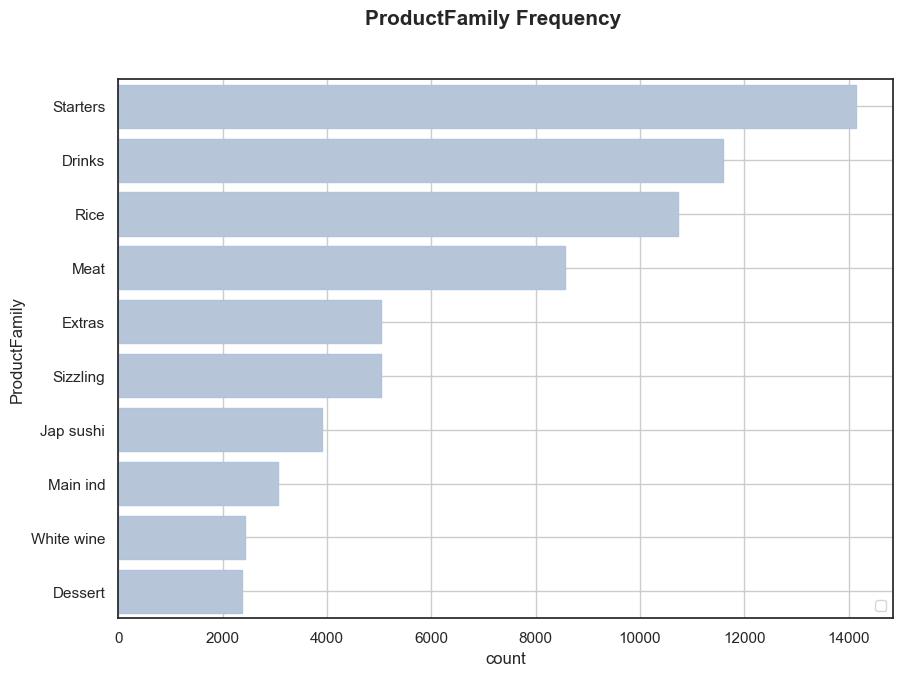

In [30]:
# Convert lowercase column using str.lower().
df['ProductFamily'] = df['ProductFamily'].str.lower()

# Capitalize first letter.
df['ProductFamily'] = df['ProductFamily'].str.capitalize()

# Setting visual theme
sns.set_theme(style = 'white', palette = None)

# Plot
plt.figure(figsize=(10,7))
sns.countplot(
                data = df,
                y = df['ProductFamily'],
                color='lightsteelblue',
                edgecolor='lightsteelblue',
                order=df.ProductFamily.value_counts().iloc[:10].index
             )
# Layout
plt.suptitle('ProductFamily Frequency', fontsize = 15, fontweight = 'bold')
plt.legend(title='', loc='lower right', prop={'size': 10})
plt.grid()
plt.show()

In [31]:
# Convert lowercase column using str.lower()
df['ProductDesignation'] = df['ProductDesignation'].str.lower()

# Capitalize first letter
df['ProductDesignation'] = df['ProductDesignation'].str.capitalize()

# Getting sensibility on all 'ProductDesignation'.
Products = list(df.ProductDesignation.unique())
display(Products)

['1/2 duck',
 'Spring roll',
 'Sweet sour chicken',
 'Lemon chicken',
 'Beef bbs',
 'Steamed rice',
 'Special montparnasse rice',
 'Noodles with meat',
 ' no meat',
 '7up',
 'Delivery charge',
 '1/4 duck',
 'Salt pepper prawns',
 'Sesame prawns',
 'Beef oyster sauce',
 'Egg fried rice',
 'Chicken cashew nuts',
 'California maki',
 'Philadelphia maki',
 'Tempura maki',
 'Fried shredded beef',
 'Spicy salmon maki',
 'Chicken satay',
 'Naan',
 '1/6 duck',
 'Diet sprite',
 'Jira pulao',
 'Aloo baingan',
 'Cauliflower gunchao',
 'Pork with ginger',
 'Sweetcorn soup',
 'Prawns oyster sauce',
 'Tandoori trilogy',
 'Chick tikka masala',
 'Aloo palak',
 'Baby pork',
 'Chicken mixed vegetables',
 'Samosa chicken',
 'Malai mango chick',
 'Chicken vindaloo',
 'Mixed platter sushi',
 'Ebi sushi',
 'Chicken oyster sauce',
 'Salt pepper squid',
 ' extra sauce',
 'Noodles bean sprouts',
 'Onion badji',
 'Kadhai bhindi',
 'Steamed rice ind',
 'Lamb rogan josh',
 'Mineral water 1.5lt',
 'Boutari moschof

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


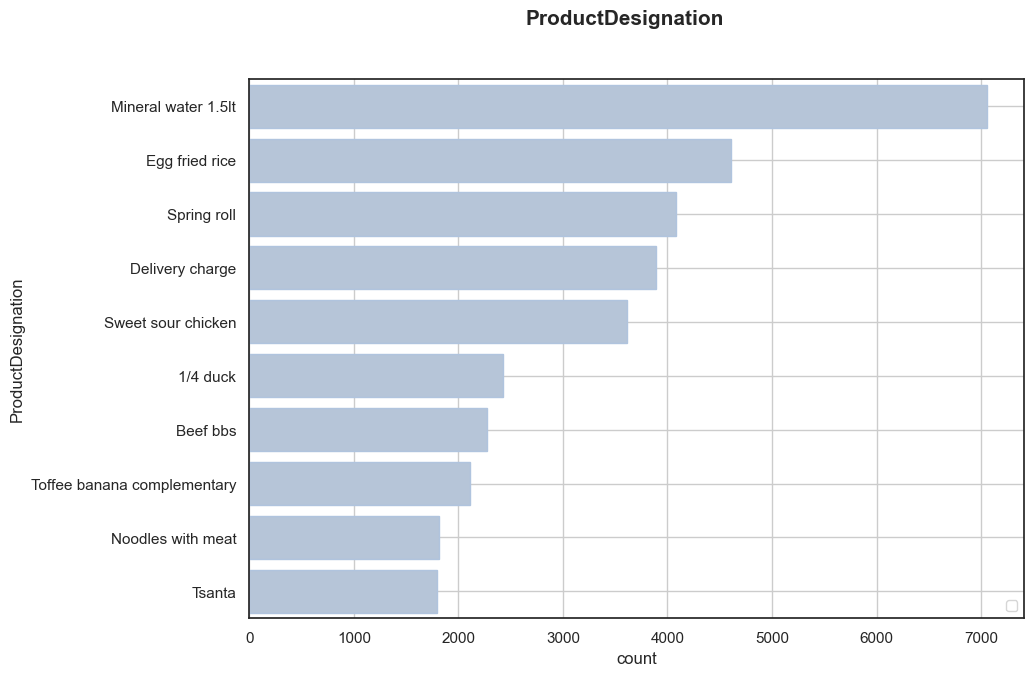

In [32]:
# Setting visual theme
sns.set_theme(style = 'white', palette = None)

# Plot
plt.figure(figsize=(10,7))
sns.countplot(
                data = df,
                y = df['ProductDesignation'],
                color='lightsteelblue',
                edgecolor='lightsteelblue',
                order=df.ProductDesignation.value_counts().iloc[:10].index
             )
# Layout
plt.suptitle('ProductDesignation', fontsize = 15, fontweight = 'bold')
plt.legend(title='', loc='lower right', prop={'size': 10})
plt.grid()
plt.show()

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will b

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will b

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

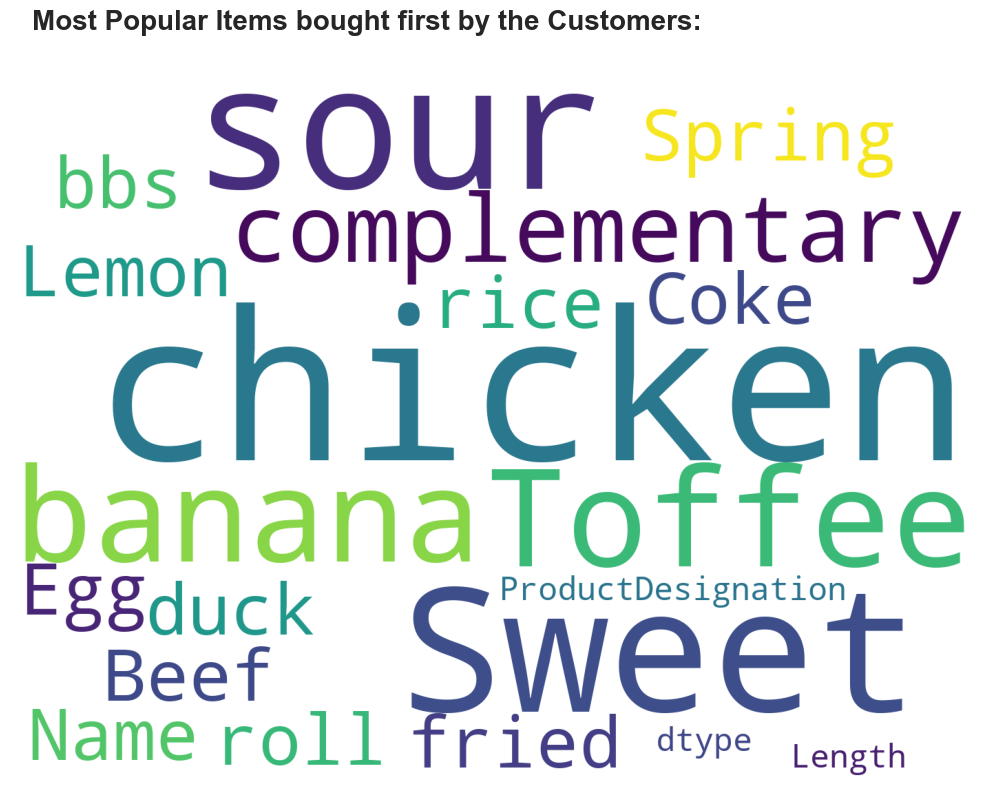

In [33]:
# Visualization of the 20 main products ordered by costumers.

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', 
                      width = 1400,  
                      height = 1000, 
                      max_words = 20).generate(str(df['ProductDesignation']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items bought first by the Customers:',
          fontsize = 20, 
          fontweight = 'bold', 
          x= 0.37, 
          y=1.08)
plt.tight_layout()
plt.show()

In [34]:
# Under all 'ProductDesignation', understanding what are those that have a 'NO' on the name.
no_list = []
for no_product in Products:
    if ' no ' in no_product:
        product_NO = no_product.strip()
        no_list.append(product_NO)
display(no_list)



# Under all 'ProductDesignation', understanding what are those that have an 'EXTRA' on the name.
extra_list = []
for extra_product in Products:
    if ' extra ' in extra_product:
        product_EXTRA = extra_product.strip()
        extra_list.append(product_EXTRA)
display(extra_list)



# Under all 'ProductDesignation', understanding what are those that have an 'WITH' on the name.
with_list = []
for with_product in Products:
    if ' with ' in with_product:
        product_WITH = with_product.strip()
        with_list.append(product_WITH)
display(with_list)

['no meat',
 'no mushrooms',
 'no onion',
 'no egg',
 'no beansprouts',
 'no sauce',
 'no chilly',
 'no prawns',
 'no pork',
 'no baby corn']

['extra sauce', 'extra pancakes', 'extra salad']

['Noodles with meat',
 'Pork with ginger',
 'Prawns with ginger',
 'with beef',
 'Beef with ginger',
 'Chicken with mushrooms',
 'Chicken with ginger',
 'with chicken',
 'with shrimp',
 'with pork']

In [35]:
# This graph below is very good to obtain sensibility throughout the existing families.
    # It tell us the main preferences of our customers and we can use this information in the end for our market analysis.
# We can see below that in deliveries, there is a tendency for clients to personalize there requests with additional
# products.

# ProductFamily Consumption - Dinne-Inns 
df_dinne_inns = df[df.IsDelivery == 0][["ProductFamily","Qty"]].groupby(["ProductFamily"]).sum().sort_values(by = "Qty", ascending = False).reset_index() 

# ProductFamily Consumption - deliveries (excluding delivery charges)
df_delivery = df[df.ProductDesignation != "DELIVERY CHARGE"][df.IsDelivery == 1][["ProductFamily","Qty"]].groupby(["ProductFamily"]).sum().sort_values(by = "Qty", ascending = False).reset_index() 
df_merged = df_dinne_inns.merge(df_delivery, left_on= "ProductFamily", right_on="ProductFamily" ) 
 
# Plot    
fig = go.Figure(data=[ 
    go.Bar(marker=dict(color='lightsteelblue'),name='Dinne-Inns', x=df_merged['ProductFamily'], y=df_merged['Qty_x']), 
    go.Bar(marker=dict(color='seagreen'),name='Deliveries', x=df_merged['ProductFamily'], y=df_merged['Qty_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",
                  height=450, 
                  width=950, 
                  title_text="Bestselling products group by families (In Absolute Values)", 
                  xaxis_title="Product Family",
                  yaxis_title="Quantity (Qty)",
                  font=dict(size=16, color='black'),
                  plot_bgcolor="white")
fig.show() 

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [36]:
# Main conclusions from the graphs below:
    # Spring Roll is the most requested product either for Dinne-Inns as for deliveries. 

df_dinne_inns = df[df.IsDelivery == 0][["ProductDesignation","Qty"]].groupby(["ProductDesignation"]).sum().sort_values(by = "Qty", ascending = False).reset_index() 
df_delivery = df[df.IsDelivery == 1][["ProductDesignation","Qty"]].groupby(["ProductDesignation"]).sum().sort_values(by = "Qty", ascending = False).reset_index() 


# Plot
fig = make_subplots(1,2, subplot_titles=["Dinne-Inns", "Delivery"])
fig.add_trace(go.Bar(marker=dict(color='lightsteelblue'),
                     name='Dinne-Inns', 
                     x=df_dinne_inns['ProductDesignation'][0:20], 
                     y=df_dinne_inns["Qty"][0:20]),1,1)

# We are always excluding delivery charge products
fig.add_trace(go.Bar(marker=dict(color='seagreen'),
                     name='Deliveries', 
                     x=df_delivery[df_delivery['ProductDesignation']!= "DELIVERY CHARGE"]['ProductDesignation'][0:20], 
                     y=df_delivery[df_delivery['ProductDesignation']!= "DELIVERY CHARGE"]["Qty"][0:20]),1,2)
fig.update_layout(height=450, 
                  width=950, 
                  title_text="Bestselling products", 
                  xaxis_title="Product Designation",
                  yaxis_title="Quantity (Qty)",
                  plot_bgcolor="white")
fig.show() 

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



- **2.6) Verify Data Quality**
- 2.6.6) Checking Qty and Total Amount

In [37]:
 # Understanding the most required quantities.

df['Qty'].value_counts()/ len(df)

1.0     0.860871
2.0     0.088671
3.0     0.020485
4.0     0.015099
5.0     0.004922
6.0     0.004768
7.0     0.001486
8.0     0.001450
10.0    0.000737
9.0     0.000606
12.0    0.000238
11.0    0.000214
15.0    0.000131
14.0    0.000119
20.0    0.000048
18.0    0.000048
13.0    0.000024
17.0    0.000012
23.0    0.000012
21.0    0.000012
25.0    0.000012
26.0    0.000012
19.0    0.000012
53.0    0.000012
Name: Qty, dtype: float64

In [38]:
# 'IsDelivery' distributed per 'Qty' and 'TotalAmount'.
# We can say that the restaurant gains less money with deliveries than with dine-ins.

concat_df_2 = pd.concat([df.groupby(["IsDelivery"])["Qty"].sum(), 
                       df.groupby(["IsDelivery"])["TotalAmount"].sum()], axis=1)
display(concat_df_2)

Qty  TotalAmount
IsDelivery                      
0           69607.0    607690.05
1           36476.0    219220.87

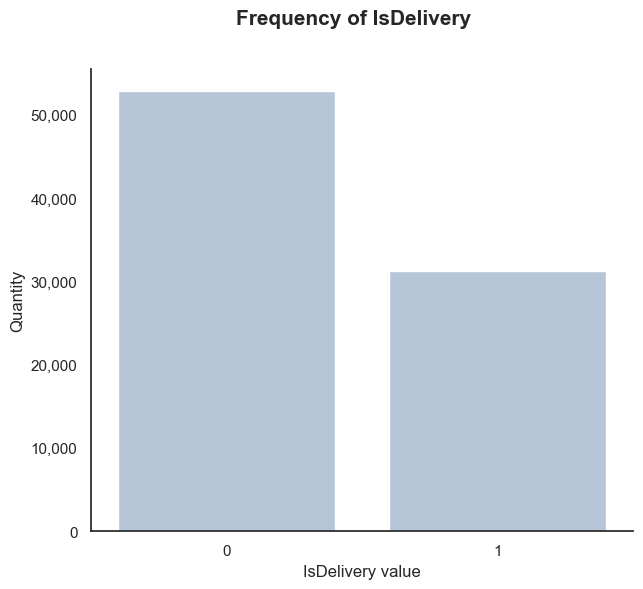

In [39]:
# Analyzing the variable 'IsDelivery' graphically.

# Draw
fig, ax = plt.subplots(figsize=(7,6))
g = sns.countplot(data=df, 
                  x=df['IsDelivery'], 
                  color = 'lightsteelblue')
# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()

# Plot
plt.suptitle('Frequency of IsDelivery', fontsize = 15, fontweight = 'bold')
plt.xlabel("IsDelivery value")
plt.ylabel("Quantity")
plt.rc('axes', labelsize=15)

In [40]:
# 'CustomerCity' distributed per 'Qty' and 'TotalAmount'.

concat_df_3 = pd.concat([df.groupby(["CustomerCity"])["Qty"].sum(), 
                       df.groupby(["CustomerCity"])["TotalAmount"].sum()], axis=1)
display(concat_df_3)

Qty  TotalAmount
CustomerCity                          
 EGKOMI               7.0        40.20
AGIOS DOMETIOS     1488.0      8737.70
AGLANTZIA          1204.0      7488.06
DALI                853.0      5144.56
EGKOMI            11060.0     67113.43
GERI                 20.0       100.32
LAKATAME             55.0       367.04
LAKATAMEIA         5330.0     30827.66
LAKSTAMEIA           33.0       236.46
LATSIA              697.0      4318.42
LEYKOSIA           4719.0     28743.96
NICOSIA            2539.0     15920.58
PANO DEYTERA         15.0        70.12
STROBOLO            100.0       546.80
STROBOLOS          8272.0     49034.44
SYN. ANTHOYPOLIS     20.0       115.38
TSERI                64.0       415.74

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


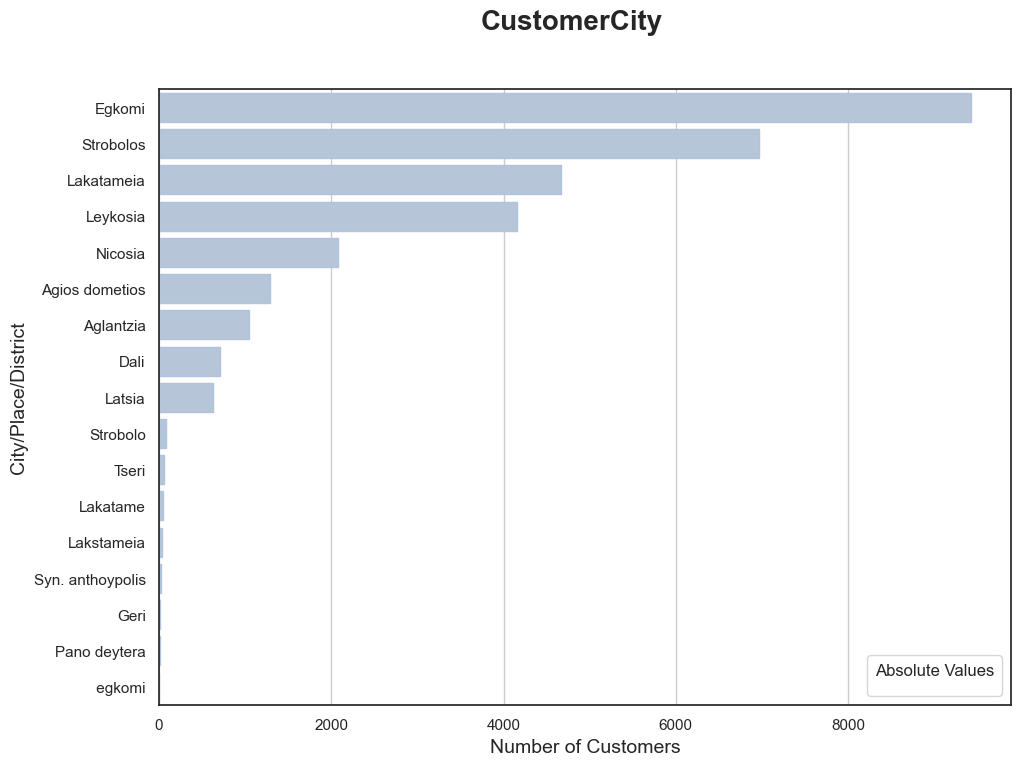

In [41]:
# Convert lowercase column using str.lower()
df['CustomerCity'] = df['CustomerCity'].str.lower()

# Capitalize first letter
df['CustomerCity'] = df['CustomerCity'].str.capitalize()

# Setting visual theme
sns.set_theme(style = 'white', 
              palette = None)

# Plot
plt.figure(figsize=(11,8))
sns.countplot(data = df,
              y = df['CustomerCity'],
              color='lightsteelblue',
              edgecolor='lightsteelblue',
              order = df['CustomerCity'].value_counts().index
              )
# Layout
plt.suptitle('CustomerCity', 
             fontsize = 20, 
             fontweight = 'bold')
plt.legend(title='Absolute Values', 
           loc='lower right', 
           prop={'size': 14})
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('City/Place/District', fontsize=14)
plt.grid(axis='x')
plt.show()

In [42]:
# Below, we can have a deeper understanding to answer the following question:
    # "Do more orders correspond to more revenue?"
        # And we can see below, costumer spend, on average, more than the double on restaurant than by deliveries.

# Defining variables.
revenue_dinne_inn = df[df.IsDelivery == 0].TotalAmount.sum()
revenue_delivery = df[df.IsDelivery == 1].TotalAmount.sum()

# Counting.
ordered_dinne_inn = len(df[df.IsDelivery == 0].DocNumber.unique()) # Counting the number of records in dinne-inn.
ordered_delivery = len(df[df.IsDelivery == 1].DocNumber.unique())  # Counting the number of records by delivery.

# Plot.
fig = make_subplots(1,2, 
                    specs=[[{"type":"domain"},
                            {"type":"domain"}]], 
                    subplot_titles=["Revenue", "Number of orders"])
colors = ['lightsteelblue', 'seagreen']
fig.add_trace(go.Pie(labels=["Dinne-Inn", "Deliveries"], 
                     values=[revenue_dinne_inn, revenue_delivery],
                     #textinfo= 'value+percent',
                     marker=dict(colors=colors)),1,1)
fig.add_trace(go.Pie(values=[ordered_dinne_inn, ordered_delivery],
                     marker=dict(colors=colors),
                     showlegend=False),1,2)
fig.update_layout(height=500, 
                  width=650, 
                  title_text="Dinne-Inn vs Deliveries",
                  font=dict(size=12))

# Average Spending per request. 
average_spending_dinneinns = np.mean(df[df.IsDelivery == 0][["DocNumber","TotalAmount"]].groupby("DocNumber").sum()) 
average_spending_deliveries = np.mean(df[df.IsDelivery == 1][["DocNumber","TotalAmount"]].groupby("DocNumber").sum()) 
print("Average Dinne-Inns spending: " + str(round(average_spending_dinneinns[0],2)) + " Euros" "\n" + 
      "Average delivery spending: " + str(round(average_spending_deliveries[0],2))+ " Euros") 
fig.show()

Average Dinne-Inns spending: 96.75 Euros
Average delivery spending: 45.05 Euros


C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [43]:
# Here, we aim to understand how many times normally customers use to visit this resturants chain.
# Most preferences:
    # 5-10 visits: 41%
    # 10+ visits: ~36%
    # 3-5 visits: 22%

on_cust = df[df.IsDelivery == 1]
colors = ["lightsteelblue","seagreen","darkgreen","red","yellow"]
freq = on_cust.CustomerID.value_counts()
freq_bins = pd.Series(["1" if i == 1 else 
                       "2" if i == 2 else 
                       "3-5" if i <= 5 else 
                       "5-10" if i <= 10 else 
                       "10+" for i in freq.values])

# Plot
fig = go.Figure(go.Pie(marker=dict(colors=colors),
                       labels=freq_bins.value_counts().index, 
                       textinfo='percent',
                       values=freq_bins.value_counts().values))
fig.update_layout(height=500, 
                  width=700, 
                  legend_title = "Different number of visits gaps",
                  title_text = "Distribution of the number of visits per client")
fig.show()

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



- **2.6) Verify Data Quality**
- 2.6.7) Checking EmployeeID

In [44]:
df['EmployeeID'].value_counts()/ len(df)

2     0.660881
5     0.154252
6     0.137334
4     0.024635
27    0.012912
23    0.009821
7     0.000166
Name: EmployeeID, dtype: float64

In [45]:
pd.crosstab(df['IsDelivery'], df['EmployeeID'])

EmployeeID     2     4     5     6   7    23   27
IsDelivery                                       
0           35812  1848  6664  7355  14  614  554
1           19774   224  6310  4196   0  212  532

In [46]:
concat_df_3 = pd.concat([df.groupby(["EmployeeID"])["Qty"].sum(), 
                       df.groupby(["EmployeeID"])["TotalAmount"].sum()], axis=1)
display(concat_df_3)

Qty  TotalAmount
EmployeeID                      
2           71578.0    574839.14
4            2489.0     19137.52
5           15371.0    108071.54
6           14255.0    106838.50
7              20.0       189.60
23           1083.0      7660.90
27           1287.0     10173.72

- **2.6) Verify Data Quality**
- 2.6.8) Checking Pax and CustomerID

In [47]:
# Customer equal to 0 may be what is inserted when the client doesn't want to create a client account in the restaurant.
# Human error, so we will keep it for now.

df['CustomerID'].value_counts()/ len(df)

0        0.628482
58239    0.002675
1567     0.002497
67025    0.002307
67875    0.002045
           ...   
53376    0.000012
66437    0.000012
28834    0.000012
26632    0.000012
27044    0.000012
Name: CustomerID, Length: 2316, dtype: float64

In [48]:
# There are some records with pax=0. 
# Since it has a very low representation in the dataset, we consider it a human error. 
# It can perfectly happen that an employee did not take note of the number of costumers of the respective order.

df['Pax'].value_counts()/ len(df)

1      0.376737
2      0.173537
4      0.140318
3      0.081359
5      0.063537
6      0.056118
8      0.028297
7      0.025301
9      0.016467
10     0.013043
12     0.004768
11     0.004399
14     0.004197
13     0.002366
15     0.001807
19     0.001320
20     0.000856
0      0.000618
43     0.000583
30     0.000547
50     0.000476
18     0.000452
23     0.000440
16     0.000345
22     0.000309
26     0.000273
17     0.000226
25     0.000214
39     0.000190
47     0.000155
74     0.000143
49     0.000131
53     0.000131
73     0.000107
29     0.000083
78     0.000024
21     0.000024
24     0.000024
45     0.000012
144    0.000012
70     0.000012
52     0.000012
200    0.000012
31     0.000012
38     0.000012
Name: Pax, dtype: float64

In [49]:
# Here, we aim to obtain more sensibility on how many people usually come to the restaurant.
# As we can see, the customers tend to organize themselves to come either in groups of 2 (pairs) 
# or in groups of 4 (prossibility a family).

x = df[(df.IsDelivery == 0) & (df.Pax < 25)].Pax.values

# Plot
fig = px.histogram(x=x)
fig.update_traces(marker_color='lightsteelblue', 
                  opacity=0.7)
fig.update_layout(height=450, 
                  width=950,
                  yaxis_title="Frequency (Absolute Values)", 
                  xaxis_title="Number of persons", 
                  title_text="Number of customers per meal", 
                  showlegend=False, 
                  plot_bgcolor="white")
mean_value = df['Pax'].mean()
fig.add_vline(x=mean_value, 
              line_dash="dash", 
              line_color="seagreen", 
              annotation_text=f"Mean: {mean_value:.2f}")
fig.show()

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [50]:
# Understanding ou 'TotalAmount' varies with 'Pax' and 'CustomerID'.

df.groupby('TotalAmount')['Pax', 'CustomerID'].sum()

Pax
TotalAmount       
0.00         21330
0.06          1783
0.10             1
0.12            13
0.18             1
...            ...
760.00          38
1064.00         70
1196.00         52
2160.00        144
3000.00        200

[374 rows x 1 columns]

# **3. Data Preparation**

- **3.1) Selecting data**
- 3.1.1) Removing unnecessary rows from Data Exploration
- 3.1.2) Removing unnecessary features from Data Exploration
- 3.1.3) Defining metric and categorical features
- **3.2) Cleaning data**
- 3.2.1) Dealing with missing values and strange values
- 3.2.2) Histograms Analysis
- 3.2.3) Boxplots Analysis
- 3.2.3.1) Manual Removal
- 3.2.3.2) IQR Removal
- 3.2.4) Correlations Analysis
- **3.3) Construct data**
- 3.3.1) Creating new variables

- **3.1) Selecting data**
- 3.1.1) Removing unnecessary rows from Data Exploration

In [51]:
# Removing this impossible values: clients can not exist before their registration.

df = df[~(df['CustomerSince']>'2018-12-31 23:59:59')]
print('The total amount of impossible values is:', df[df['CustomerSince']>'2018-12-31 23:59:59'].shape[0])
print('Percentage of data kept after removing this impossible values is:', np.round(df.shape[0] / df_original.shape[0], 4))

The total amount of impossible values is: 0
Percentage of data kept after removing this impossible values is: 0.9906


In [52]:
# Removing this impossible values: impossible to have an invoice from a client before their registration.

df = df[~(df['InvoiceDateHour'] < df['CustomerSince'])]
print('The total amount of impossible values is:', df[df['InvoiceDateHour'] < df['CustomerSince']].shape[0])
print('Percentage of data kept after removing this impossible values is:', np.round(df.shape[0] / df_original.shape[0], 4))

The total amount of impossible values is: 0
Percentage of data kept after removing this impossible values is: 0.9891


- **3.1) Selecting data**
- 3.1.2) Removing unnecessary features from Data Exploration

In [53]:
# RELEVANCY
# Dropping the following three features, which have high cardinality and does not provide any relevant informations: 
    # EmployeeID

df.drop(columns=['EmployeeID'], inplace=True)
df.head(1)

DocNumber ProductDesignation ProductFamily  Qty  TotalAmount  \
0  TKD0320000012018           1/2 duck      Starters  1.0         27.1   

      InvoiceDateHour  IsDelivery  Pax CustomerID CustomerCity CustomerSince  
0 2018-01-01 19:12:12           1    1      53908     Leykosia           NaT

- **3.1) Selecting data**
- 3.1.3) Defining metric and categorical features

In [54]:
metric_features = df.select_dtypes(include=[np.number])#.columns.tolist()
metric_features = [col for col in metric_features.columns if ('SR' not in col)]
metric_features

['Qty', 'TotalAmount', 'IsDelivery', 'Pax']

In [55]:
# Defining all CATEGORICAL variables in the dataset. 

categorical_features = [column for column in df.columns if df[column].dtype == 'object']
categorical_features 

['DocNumber',
 'ProductDesignation',
 'ProductFamily',
 'CustomerID',
 'CustomerCity']

- **3.2) Cleaning data**
- 3.2.1) Dealing with missing values and strange values

In [56]:
# 'CustomerCity' distributed per 'Qty' and 'TotalAmount'.

concat_df_3 = pd.concat([df.groupby(["CustomerCity"])["Qty"].sum(), 
                       df.groupby(["CustomerCity"])["TotalAmount"].sum()], axis=1)
display(concat_df_3)

Qty  TotalAmount
CustomerCity                          
 egkomi               7.0        40.20
Agios dometios     1422.0      8284.72
Aglantzia          1190.0      7399.30
Dali                826.0      5010.76
Egkomi            10775.0     65422.49
Geri                 20.0       100.32
Lakatame             55.0       367.04
Lakatameia         5262.0     30390.08
Lakstameia           33.0       236.46
Latsia              686.0      4246.72
Leykosia           4611.0     28141.54
Nicosia            2374.0     14880.32
Pano deytera         15.0        70.12
Strobolo            100.0       546.80
Strobolos          7686.0     45875.00
Syn. anthoypolis     20.0       115.38
Tseri                64.0       415.74

In [57]:
# As we noticed above, there are some cities/places/district wrongly written, due to human mistake.
# In this sense, we tried to merge the wrongly spelled ones to the correct ones.


# LAKATAMEIA
# We have confirmed how to spell this name correctly, replacing all those wrongly written citie/splaces/district
# by the correct one. 
# Source:
    # https://www.lakatamia.org.cy/en/home-en/
df['CustomerCity'] = np.where(df['CustomerCity']=='Lakatame',
                              'Lakatameia',df['CustomerCity'])
df['CustomerCity'] = np.where(df['CustomerCity']=='Lakstameia',
                              'Lakatameia',df['CustomerCity'])

# STROBOLOS
# We have confirmed how to spell this name correctly, replacing all those wrongly written cities/places/district 
# by the correct one. 
# Source:
# https://www.strovolos.org.cy/
df['CustomerCity'] = np.where(df['CustomerCity']=='Strobolo',
                              'Strobolos',df['CustomerCity'])


# EGKOMI
# We have confirmed how to spell this name correctly, replacing all those wrongly written cities/places/district
# by the correct one. 
# In this case, we checked that there are two different lines for the same city: EGKOMI.
        # Then, we concluded it could only be due to fact that those values have different datatypes.
# Source:
    # https://ucm.org.cy/en/municipalities/nicosia-district/
    
df['CustomerCity'] = df['CustomerCity'].str.strip()
df['CustomerCity'] = np.where(df['CustomerCity']=='Egkomi',
                              'Egkomi',df['CustomerCity'])

In [58]:
# After cleaning up our data regarding cities/places, we visualized again our 
# 'CustomerCity' distributed per 'Qty' and 'TotalAmount'.

concat_df_3 = pd.concat([df.groupby(["CustomerCity"])["Qty"].sum(), 
                       df.groupby(["CustomerCity"])["TotalAmount"].sum()], axis=1)
display(concat_df_3)

Qty  TotalAmount
CustomerCity                          
Agios dometios     1422.0      8284.72
Aglantzia          1190.0      7399.30
Dali                826.0      5010.76
Egkomi            10775.0     65422.49
Geri                 20.0       100.32
Lakatameia         5350.0     30993.58
Latsia              686.0      4246.72
Leykosia           4611.0     28141.54
Nicosia            2374.0     14880.32
Pano deytera         15.0        70.12
Strobolos          7786.0     46421.80
Syn. anthoypolis     20.0       115.38
Tseri                64.0       415.74
egkomi                7.0        40.20

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


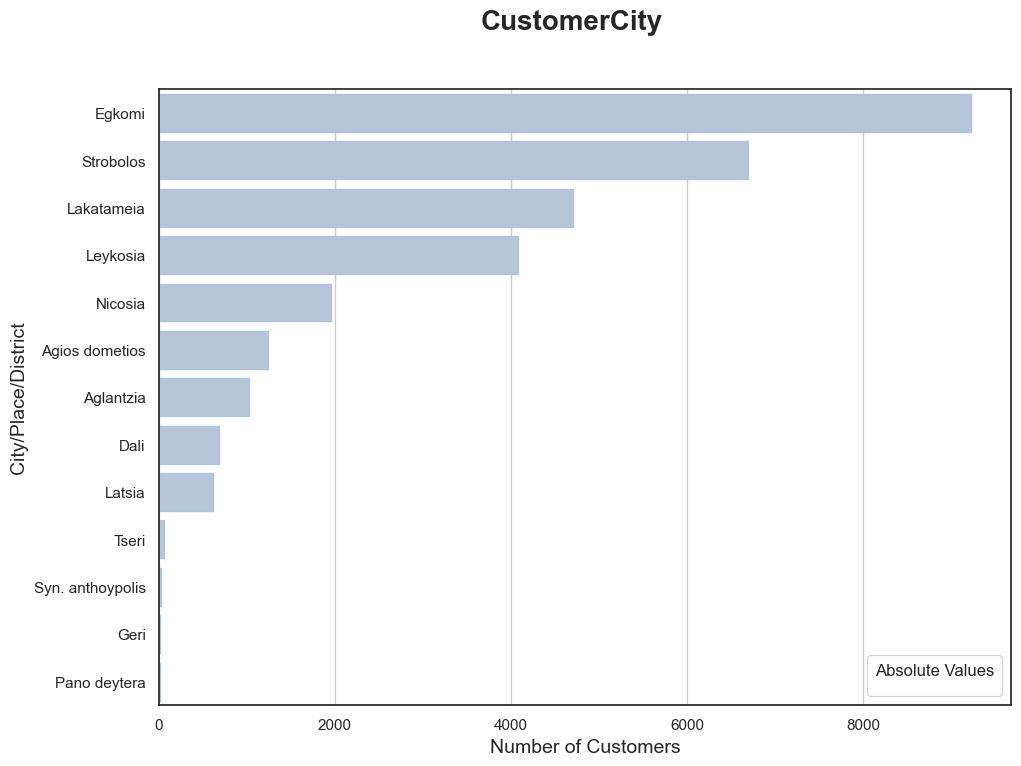

In [59]:
# Convert lowercase column using str.lower()
df['CustomerCity'] = df['CustomerCity'].str.lower()

# Capitalize first letter
df['CustomerCity'] = df['CustomerCity'].str.capitalize()

# Setting visual theme
sns.set_theme(style = 'white', 
              palette = None)

# Plot
plt.figure(figsize=(11,8))
sns.countplot(data = df,
              y = df['CustomerCity'],
              color='lightsteelblue',
              edgecolor='lightsteelblue',
              order = df['CustomerCity'].value_counts().index
              )
# Layout
plt.suptitle('CustomerCity', 
             fontsize = 20, 
             fontweight = 'bold')
plt.legend(title='Absolute Values', 
           loc='lower right', 
           prop={'size': 14})
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('City/Place/District', fontsize=14)
plt.grid(axis='x')
plt.show()

In [60]:
# Getting a visual notion of this chain locations restaurants.

# Get the latitude and longitude of the map center
center_lat, center_lon = 35.185566, 33.382275

# Create a map centered on the coordinates above
m = folium.Map(location=[center_lat, center_lon], zoom_start=8)

# Create a Nominatim geolocator
geolocator = Nominatim(user_agent="http")

# Create a rate limiter with a delay of 1 second between requests
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Group the data by city and count the number of unique DocNumbers
grouped = df.groupby('CustomerCity')['DocNumber'].nunique()

# Create a marker for each city and add it to the map
for city, count in grouped.items():
    try:
        # Get the coordinates of the city using OpenStreetMap Nominatim API
        location = geocode(city)
        if location:
            lat, lon = location.latitude, location.longitude
        else:
            # Set the coordinates to (0, 0) if the location is not found
            lat, lon = 0, 0

        # Create a marker and add it to the map
        folium.Marker([lat, lon], popup=f'{city}: {count}').add_to(m)
    except (exc.GeocoderTimedOut, exc.GeocoderServiceError):
        continue

# Display the map
m

- **3.2) Cleaning data**
- 3.2.3) Histograms Analysis

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



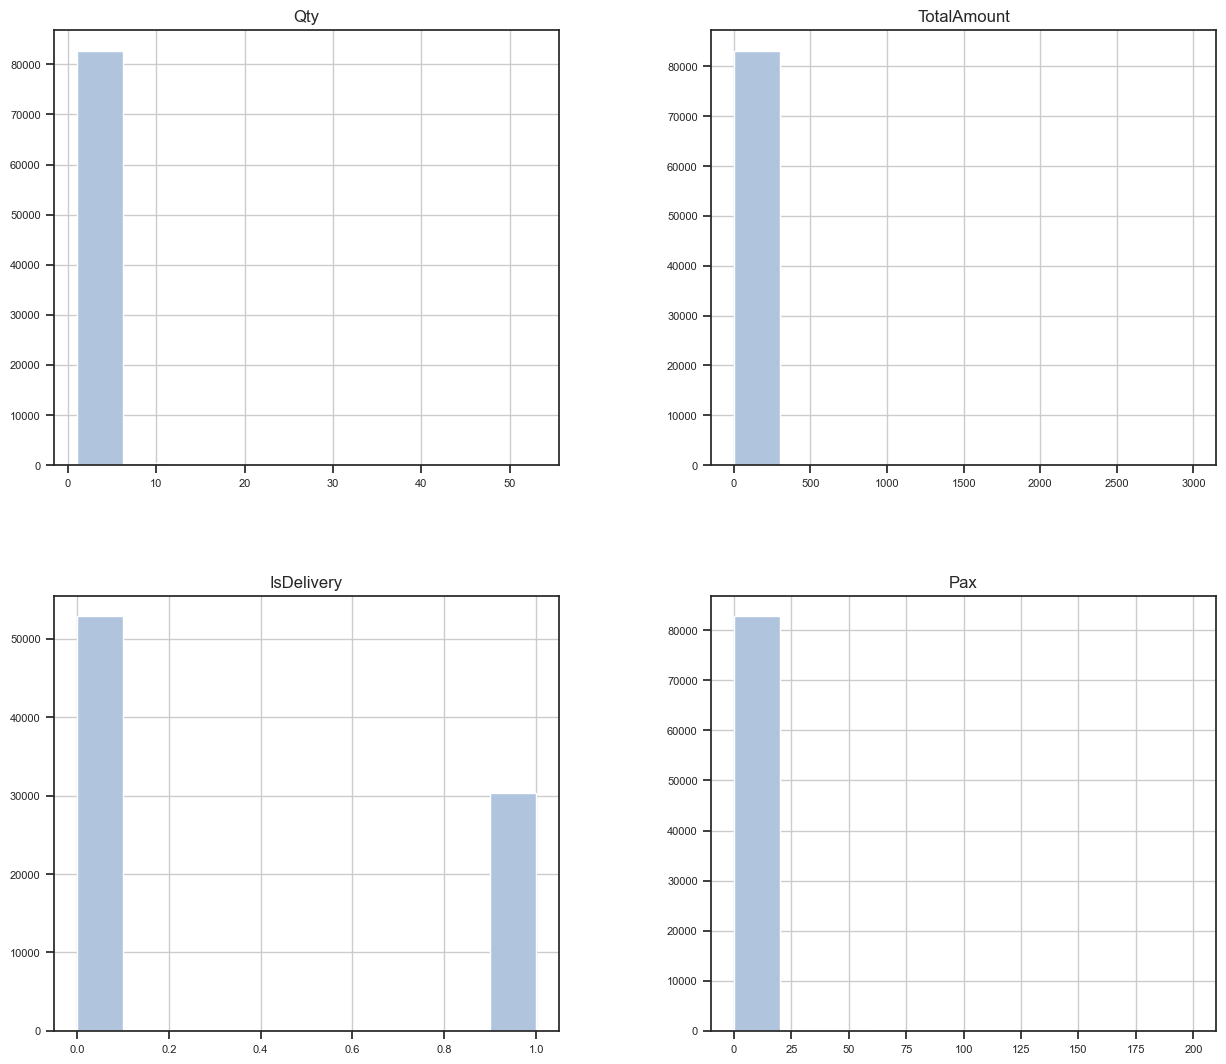

In [61]:
# HISTOGRAM (METRIC FEATURES)
# Get a depper visual understanding on metric features through histograms.

# Set layout
sns.set_theme(style = 'white', palette = None)
sns.set_style("ticks",{'axes.grid' : False})

n_col = 2
n_row = math.ceil(df[metric_features].shape[1]/n_col)
title = "Metric Variables Histograms"
df[metric_features].hist(bins=10, 
                         figsize=(15, 13), 
                         layout=(n_row, n_col), 
                         xlabelsize=8, ylabelsize=8,
                         color ='lightsteelblue'
                         );

- **3.2) Cleaning data**
- 3.2.4) Boxplots Analysis
- 3.2.4.1) Manual Removal

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



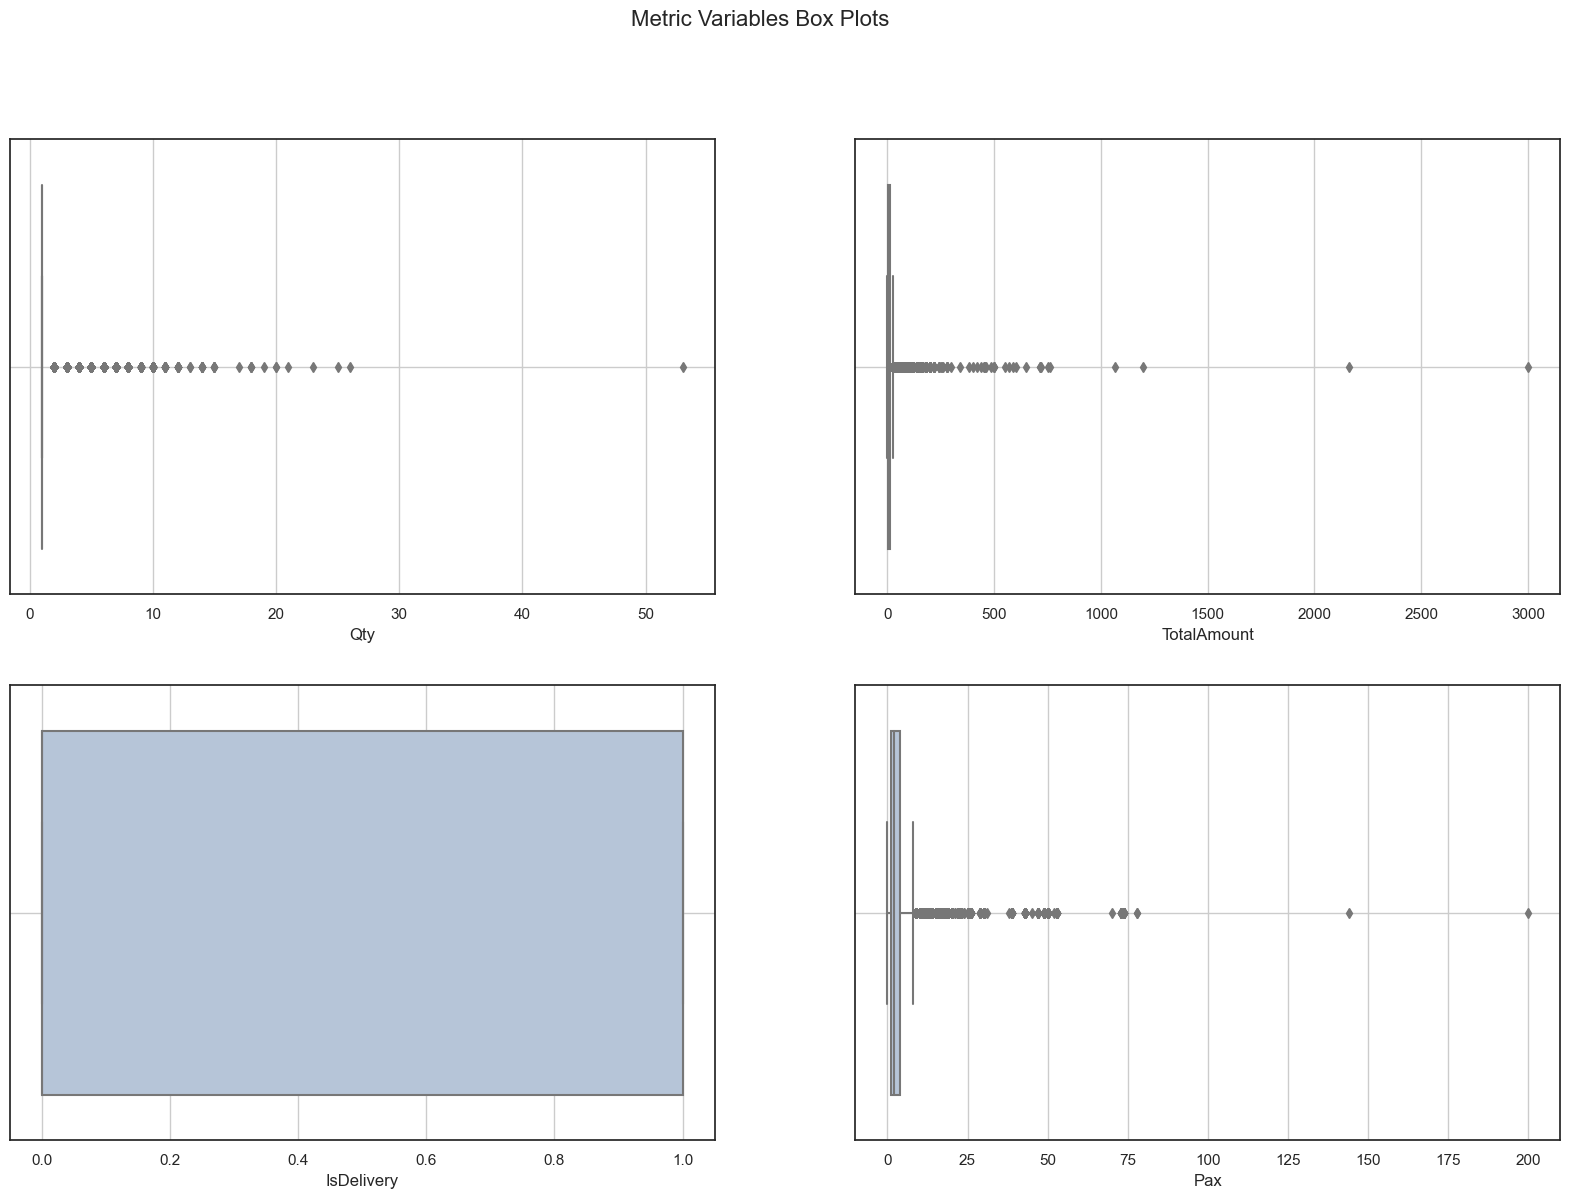

In [62]:
# Get a depper visual understanding on METRIC FEATURES through Box Plots. 
# With this graph, we can have an even better understanding on existing outliers.

# All Metric Variables' Box Plots in one figure.
sns.set()
sns.set_theme(style = 'white', 
              palette = None)

# Prepare figure. Create indvidual axes where each box plot will be placed.
fig, axes = plt.subplots(2, 2, figsize=(20, 13))

# Plot data.
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=df[feat], ax=ax, color ='lightsteelblue')
    # Customize
    ax.grid(True)
    
# Layout
title = "Metric Variables Box Plots" # Add a centered title to the figure
fig.suptitle(title, fontsize=16)
plt.show()

In [63]:
# Outlier Manual Removal (First method).
    # Here, on outliers manual remotion, we decided to look both at the histograms, at the box plots and at the 
    # descriptive statistics resume.
    # In our opinion, all these three were relevant instruments to filter each variable.
        # So, based on these elements, we mostly adopted a 'try and error aproach'.

filters_1 = (
     (df['Pax']<=70) # Mostly, by looking at the boxplots and the histograms.
     &
     (df['Qty']<=(20)) # Mostly, by looking at the boxplots and the histograms.
     &
     (df['TotalAmount']<=(1000)) # Mostly, by looking at the boxplots and the histograms. 
)

df_manual_removal = df[filters_1]

print('Percentage of data kept after removing outliers in df_1:', 
      np.round(df_manual_removal.shape[0] / df_original.shape[0], 4))

Percentage of data kept after removing outliers in df_1: 0.9887


- **3.2) Cleaning data**
- 3.2.4) Boxplots Analysis
- 3.2.4.2) IQR Removal

In [64]:
# Make another copy

df_IQR_removal = df.copy()

In [65]:
# Source: 

def check_IQR_outliers(data, criterion, mode='data'):
    '''
    Detects outliers by generating a decision range based on a criterion (threshold)
    and locating values that don't fall within this range.
    Can return the dataframe without the outliers or the percentage of remaining data
    after outlier removal or the values considered as outliers for each column by
    changing the parameter 'mode' (data as default)

    Args:
        data (pandas.core.frame.DataFrame) : set of data
        col (pandas.core.series.Series) : column of the data to check outliers
        criterion (int) : IQR multiplier, the higher, the larger the decision range
        mode (str): 'data' to get dataframe without outliers 'perc' to check percentage
                     or 'values' to check values

    Returns:
        Dataframe without
        Print with percentage of remaining data after removing outliers or
        index and values that fall outside the decision range (outliers)
    '''
    if mode == 'data':
        Q1 = data.quantile(.25) # value of first quartile
        Q3 = data.quantile(.75) # value of third quartile
        IQR = Q3 - Q1 # interquartile range
        lower_lim = Q1 - criterion * IQR # setting min limit
        upper_lim = Q3 + criterion * IQR # setting max limit

        outliers = []
        for col in data.select_dtypes(np.number).columns:
            llim = lower_lim[col]
            ulim = upper_lim[col]
            outliers.append(data[col].between(llim, ulim, inclusive='both'))

        # np.all() tests whether all array elements along a given axis evaluate to True
        outliers = data[np.all(outliers, 0)]

        return outliers

    elif mode == 'perc':
        print('\n\033[1mPercentage of remaining data after outlier removal with IQR method:\033[0m\n')
        Q1 = data.quantile(.25) # value of first quartile
        Q3 = data.quantile(.75) # value of third quartile
        IQR = Q3 - Q1 # interquartile range
        lower_lim = Q1 - criterion * IQR # setting min limit
        upper_lim = Q3 + criterion * IQR # setting max limit

        outliers = []
        for col in data.select_dtypes(np.number).columns:
            #outliers.append(data[col].between(lower_lim[col], upper_lim[col], inclusive='both'))
            llim = lower_lim[col]
            ulim = upper_lim[col]
            outliers.append(data[col].between(llim, ulim, inclusive='both'))

        # np.all() tests whether all array elements along a given axis evaluate to True
        outliers = data[np.all(outliers, axis=0)]

        print(f'\033[1m{round(len(outliers)/len(data)*100,3)} %\033[0m of remaining data',
              'after IQR method outlier removal, when criterion is', criterion)

    else:
        print('\n\n\033[1mOutlier Values:\033[0m\n')
        for col in data.select_dtypes(np.number).columns:
            Q1 = data[col].quantile(.25) # value of first quartile
            Q3 = data[col].quantile(.75) # value of third quartile
            IQR = Q3 - Q1 # interquartile range
            lower_lim = Q1 - criterion * IQR # setting min limit
            upper_lim = Q3 + criterion * IQR # setting max limit
            outliers = data.loc[(data[col] > upper_lim) | (data[col] < lower_lim)][col]
            print(f'Outlier values in \033[1m{col}\033[0m:\n')
            for idx, val in outliers.items():
                print(f'Value from Client {idx}: \033[1m', round(val,2),'\033[0m\n')

In [66]:
# Checking percentage of remaining data
check_IQR_outliers(data=df_IQR_removal, criterion=3, mode='perc')

print('Percentage of data kept after removing outliers in df_1:', 
      np.round(df_IQR_removal.shape[0] / df_original.shape[0], 4))


Percentage of remaining data after outlier removal with IQR method:

85.183 % of remaining data after IQR method outlier removal, when criterion is 3
Percentage of data kept after removing outliers in df_1: 0.9891


**Key Takeawyays**
- As we verified above, the IQR method, removes any value at all from our dataset.
- Since under the manual approach, we have more accuracy on the data we are removing, we opted for that approach.

- **3.2) Cleaning data**
- 3.2.5) Correlations Analysis

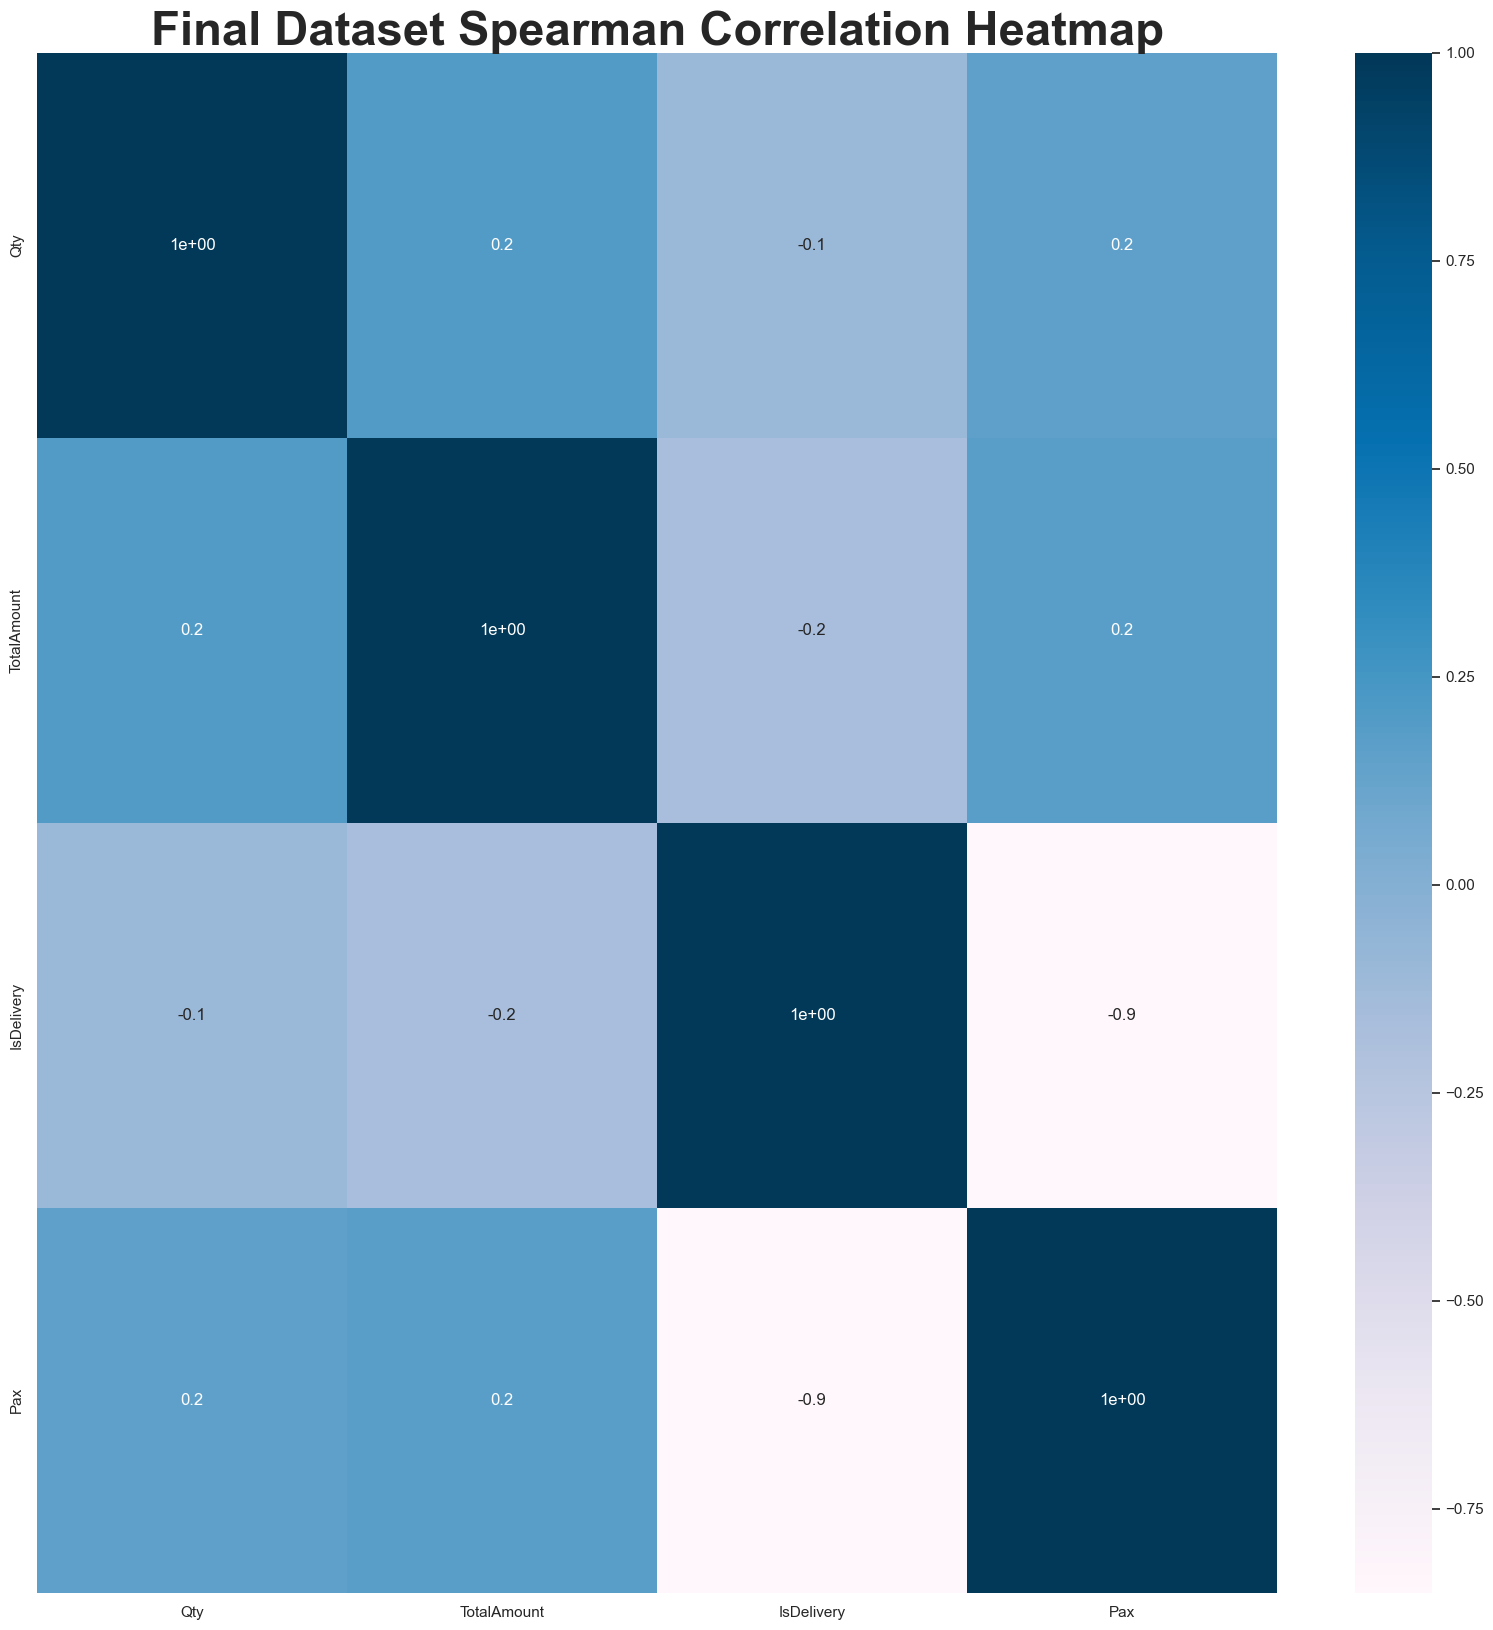

In [67]:
# The only two variables that are highly correlated are "Pax" and "IsDelivery".
# However, as long as they are key for our analysis, the decided to do not drop any of them.

def cor_heatmap(cor):
    plt.figure(figsize=(20,20))
    sns.heatmap(data = cor, 
                annot = True, 
                cmap = 'PuBu', 
                fmt='.1')
    plt.title('Final Dataset Spearman Correlation Heatmap',fontsize = 34, fontweight = 'bold')
    plt.show()
    
# Apply the correlation method to my dataset, usins spearman.
cor_spearman = df[metric_features].corr(method= 'spearman')
cor_heatmap(cor_spearman)

- **3.3) Construct data**
- 3.3.1) Creating new variables

In [68]:
# Creating 'day' variable.
df['day'] = df['InvoiceDateHour'].apply(lambda x:x.day)

# Creating 'month' variable.
df['month'] = df['InvoiceDateHour'].apply(lambda x:x.month)

# Creating 'year' variable.
df['year'] = df['InvoiceDateHour'].apply(lambda x:x.year)

# Creating 'Hour_of_day' variable.
df['Hour_of_day'] = df['InvoiceDateHour'].apply(lambda x:x.hour)

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


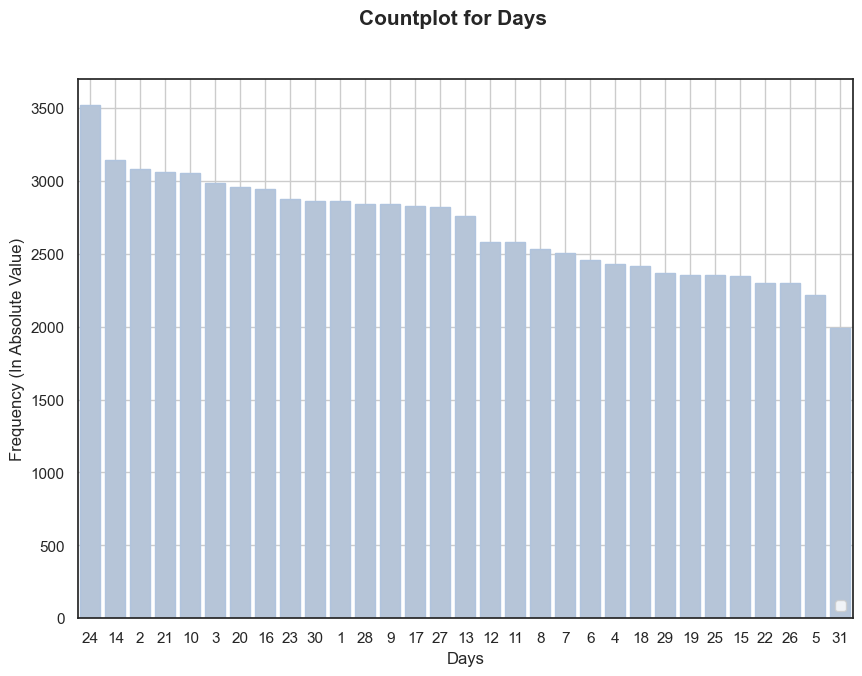

In [69]:
# Drawing a graph for 'Invoice's Day' variable sorted descendently.

# Setting visual theme
sns.set_theme(style = 'white', 
              palette = None)

# Plot
plt.figure(figsize=(10,7))
sns.countplot(data = df,
              x = df['day'],
              color='lightsteelblue',
              edgecolor='lightsteelblue',
              order = df['day'].value_counts().index
              )

# Layout
plt.suptitle('Countplot for Days', 
             fontsize = 15, 
             fontweight = 'bold')
plt.legend(title='', loc='lower right', prop={'size': 10})
plt.xlabel('Days')
plt.ylabel('Frequency (In Absolute Value)')
plt.grid()
plt.show()

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


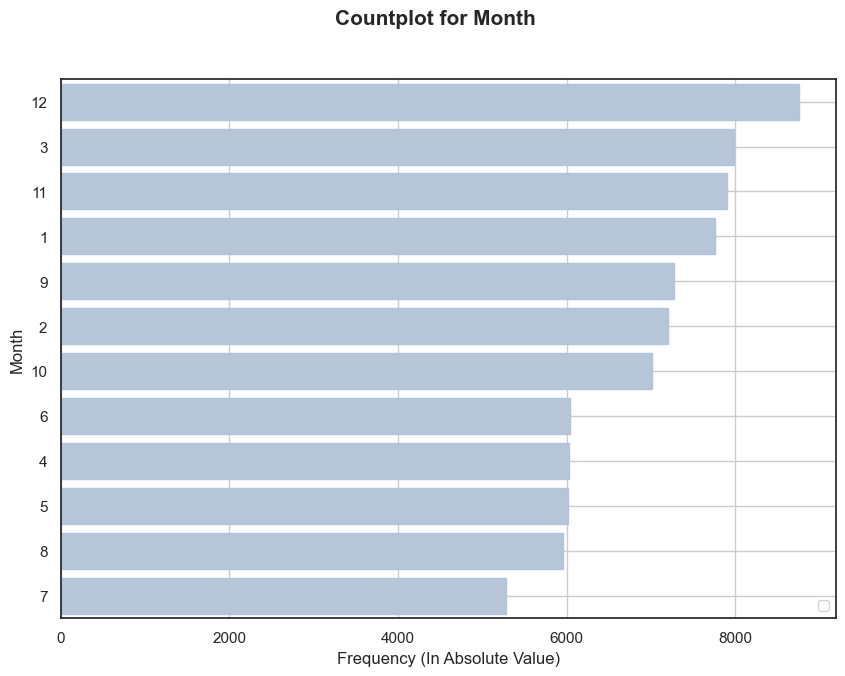

In [70]:
# Drawing a graph for 'Invoice's Month' variable sorted descendently.
# Setting visual theme
sns.set_theme(style = 'white', palette = None)

# Plot
plt.figure(figsize=(10,7))
sns.countplot(data = df,
              y = df['month'],
              color='lightsteelblue',
              edgecolor='lightsteelblue',
              order = df['month'].value_counts().index
              )

# Layout
plt.suptitle('Countplot for Month', fontsize = 15, fontweight = 'bold')
plt.legend(title='', loc='lower right', prop={'size': 10})
plt.xlabel('Frequency (In Absolute Value)')
plt.ylabel('Month')
plt.grid()
plt.show()

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


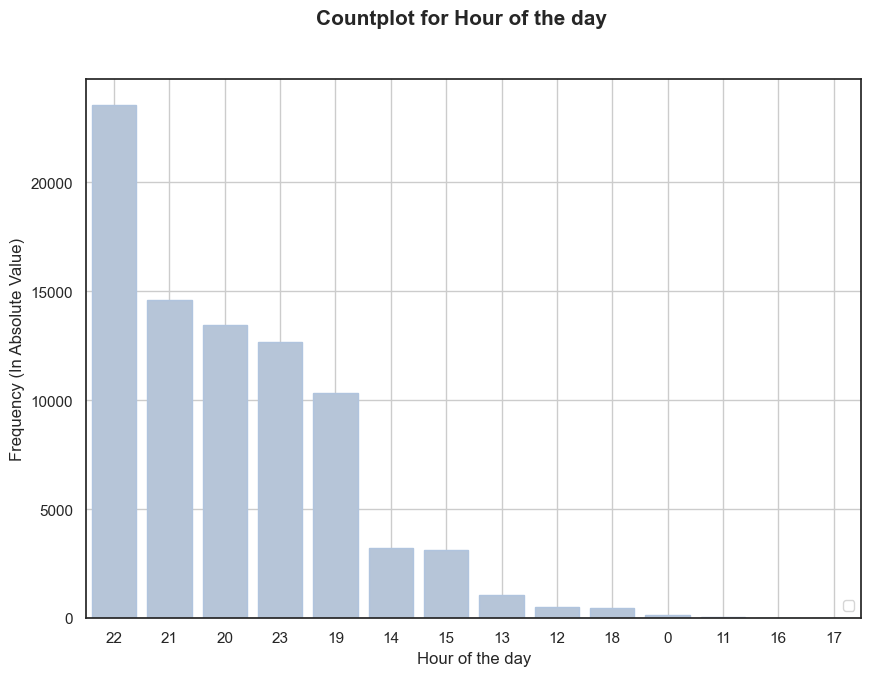

In [71]:
# Drawing a graph for 'Invoice's Hour_of_day' variable sorted descendently.
# Setting visual theme
sns.set_theme(style = 'white', palette = None)

# Plot
plt.figure(figsize=(10,7))
sns.countplot(data = df,
              x = df['Hour_of_day'],
              color='lightsteelblue',
              edgecolor='lightsteelblue',
              order = df['Hour_of_day'].value_counts().index
              )

# Layout
plt.suptitle('Countplot for Hour of the day', fontsize = 15, fontweight = 'bold')
plt.legend(title='', loc='lower right', prop={'size': 10})
plt.xlabel('Hour of the day')
plt.ylabel('Frequency (In Absolute Value)')
plt.grid()
plt.show()

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


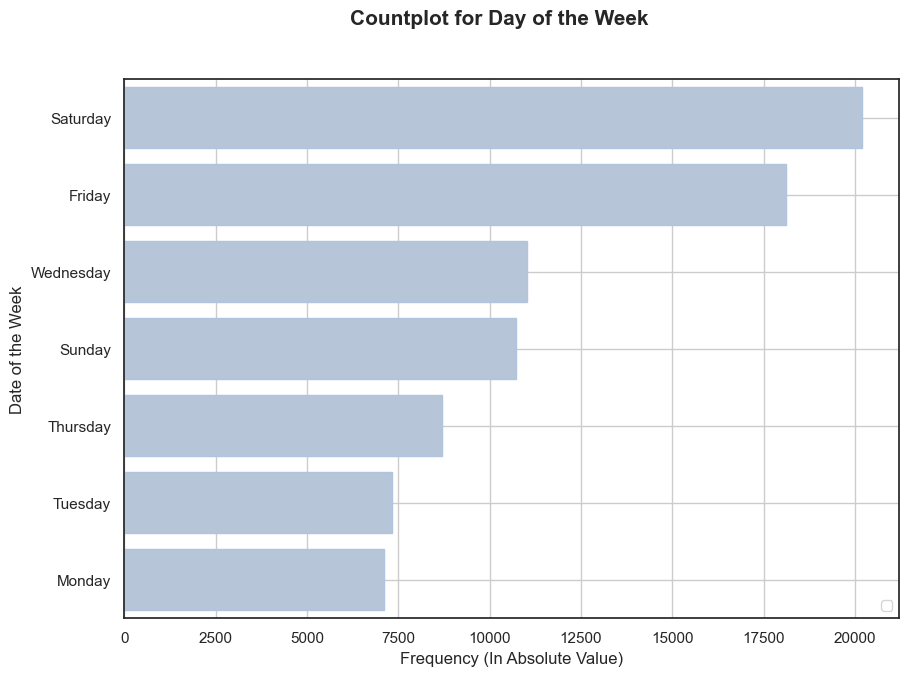

In [72]:
# Understanding on which day of the week were the invoices issued.
# Creating Invoice's Day of the Week attribute
df['date_name'] = df['InvoiceDateHour'].dt.day_name()

# # Visualizing the output
# Setting visual theme
sns.set_theme(style = 'white', palette = None)

# Plot
plt.figure(figsize=(10,7))
sns.countplot(data = df,
              y = df['date_name'],
              color='lightsteelblue',
              edgecolor='lightsteelblue',
              order = df['date_name'].value_counts().index
              )
# Layout
plt.suptitle('Countplot for Day of the Week', fontsize = 15, fontweight = 'bold')
plt.legend(title='', loc='lower right', prop={'size': 10})
plt.xlabel('Frequency (In Absolute Value)')
plt.ylabel('Date of the Week')
plt.grid()
plt.show()

In [73]:
#df['InvoiceDateHour_datetime'] = pd.to_datetime(df['InvoiceDateHour'], format='%Y-%m-%d %H:%M:%S.%f')
#df.drop(columns=['InvoiceDateHour'],inplace=True)


# Understanding on which day of the week were the invoices issued.
# Understanding whether the invoice was issued on weekend or not. Its a binary variable.
# Understanding what what time of the day the invoice was issued.
# Visualizing the output.

# Source:
    # https://stackoverflow.com/questions/62884585/select-weekends-and-weekdays-by-weekday-in-python

df['Weekday_Invoice'] = df.InvoiceDateHour.dt.dayofweek
df['Weekend_Invoice'] = np.where(df.InvoiceDateHour.dt.dayofweek.isin([5,6]), 1, 0)
df['Hour_of_day'] = df['InvoiceDateHour'].dt.hour

# Storing variables in a new dataframe called 'weekends'.
weekends = df[df['Weekend_Invoice']==1]

# Storing variables in a new dataframe called 'workdays'.
workdays = df[df['Weekend_Invoice']!=1]
display(weekends)

DocNumber   ProductDesignation ProductFamily  Qty  TotalAmount  \
1255   TKD0320000722018             1/2 duck      Starters  1.0         27.1   
1256   TKD0320000722018          extra sauce        Extras  1.0          0.0   
1257   TKD0320000722018        Lemon chicken          Meat  1.0         10.1   
1258   TKD0320000722018       Egg fried rice          Rice  1.0          5.5   
1259   TKD0320000722018          Spring roll      Starters  6.0         13.2   
...                 ...                  ...           ...  ...          ...   
83624   TK0110054552018         Tempura maki     Jap sushi  1.0          9.0   
83625   TK0110054552018    Spicy salmon maki     Jap sushi  1.0          9.0   
83626   TK0110054552018    Chinese beer 33cl       Spirits  1.0          4.0   
83627   TK0110054552018     Glass white wine    White wine  1.0          4.6   
83628   TK0110054552018  Mineral water 1.5lt        Drinks  1.0          3.0   

          InvoiceDateHour  IsDelivery  Pax CustomerID CustomerCity  \
1255  2018-01-06 13:10:29           1    1      44841    Strobolos   
1256  2018-01-06 13:10:29           1    1      44841    Strobolos   
1257  2018-01-06 13:10:29           1    1      44841    Strobolos   
1258  2018-01-06 13:10:29           1    1      44841    Strobolos   
1259  2018-01-06 13:10:29           1    1      44841    Strobolos   
...                   ...         ...  ...        ...          ...   
83624 2018-12-30 23:34:25           0    3          0          NaN   
83625 2018-12-30 23:34:25           0    3          0          NaN   
83626 2018-12-30 23:34:25           0    3          0          NaN   
83627 2018-12-30 23:34:25           0    3          0          NaN   
83628 2018-12-30 23:34:25           0    3          0          NaN   

                CustomerSince  day  month  year  Hour_of_day date_name  \
1255  2017-07-09 20:49:38.160    6      1  2018           13  Saturday   
1256  2017-07-09 20:49:38.160    6      1  2018           13  Saturday   
1257  2017-07-09 20:49:38.160    6      1  2018           13  Saturday   
1258  2017-07-09 20:49:38.160    6      1  2018           13  Saturday   
1259  2017-07-09 20:49:38.160    6      1  2018           13  Saturday   
...                       ...  ...    ...   ...          ...       ...   
83624                     NaT   30     12  2018           23    Sunday   
83625                     NaT   30     12  2018           23    Sunday   
83626                     NaT   30     12  2018           23    Sunday   
83627                     NaT   30     12  2018           23    Sunday   
83628                     NaT   30     12  2018           23    Sunday   

       Weekday_Invoice  Weekend_Invoice  
1255                 5                1  
1256                 5                1  
1257                 5                1  
1258                 5                1  
1259                 5                1  
...                ...              ...  
83624                6                1  
83625                6                1  
83626                6                1  
83627                6                1  
83628                6                1  

[30931 rows x 18 columns]

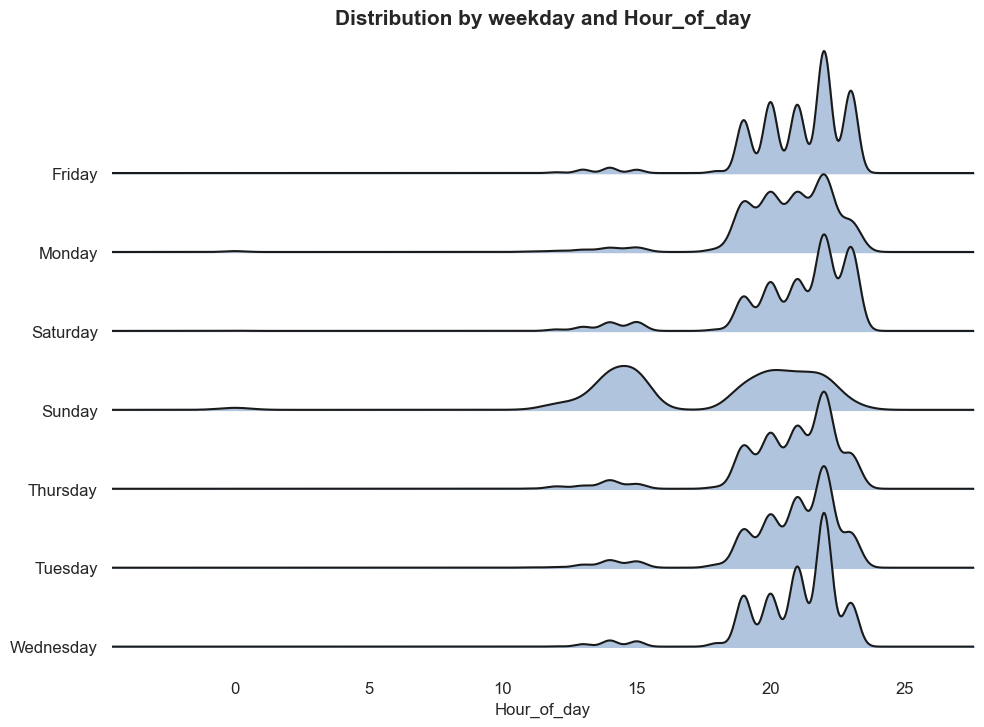

In [74]:
# Getting a graphic visualization of the sales distribution by day of the week and by hour.

# Conclusions:
    # Costumers have similar conclusions throughout the week.
    # Sunday shows more costumers during lunch time and less picks during dinner time.

# Draw
fig, ax = plt.subplots(figsize=(10,7))
g = joypy.joyplot(data=df, 
                  column='Hour_of_day', 
                  by='date_name',
                  ax=ax,
                  color='lightsteelblue') # set color parameter to lightsteelblue

# Plot
plt.title("Distribution by weekday and Hour_of_day", 
          fontsize=15, 
          fontweight = 'bold')
plt.xlabel("Hour_of_day")
plt.rc('axes', 
       labelsize=12)

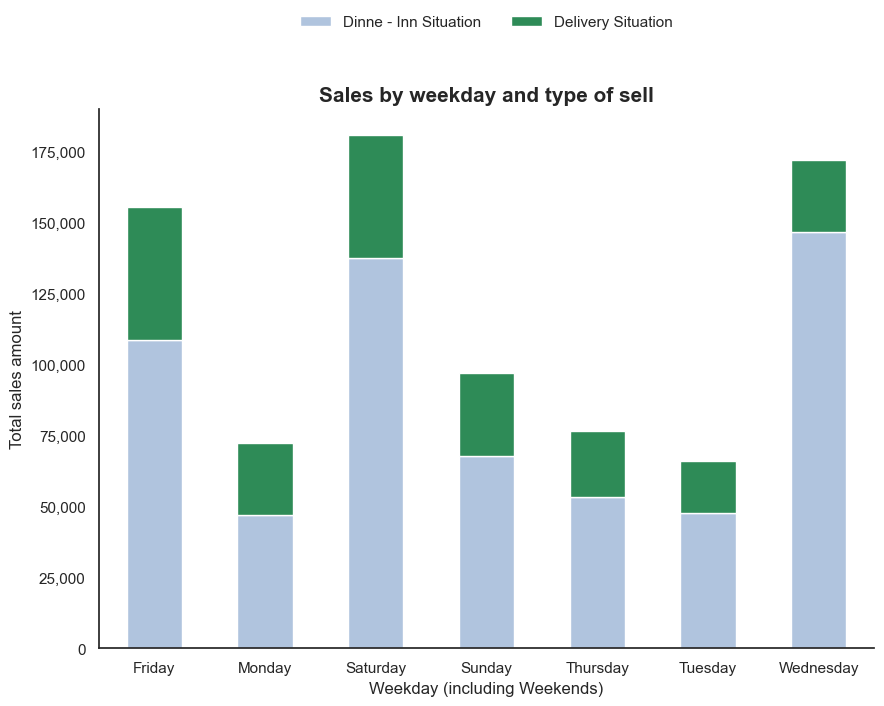

In [75]:
# Totals sales by day of the week and delivery

# Pivot table
aggregated_df = df.pivot_table(values=['TotalAmount'], 
                               index='date_name',
                               columns='IsDelivery',
                               aggfunc='sum',
                               fill_value=0)

# Draw
fig, ax = plt.subplots(figsize=(10,7))
g = aggregated_df.plot(kind='bar', 
                       stacked=True, 
                       ax=ax, 
                       color=['lightsteelblue', 'seagreen'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
handles, labels = ax.get_legend_handles_labels()
labels = ['Dinne - Inn Situation', 'Delivery Situation']  # updated labels
ax.legend(handles=handles, 
          labels=labels, 
          loc='upper center', 
          ncol=4, 
          bbox_to_anchor=(0.5, 1.2),  # updated position
          frameon=False)

# Plot
plt.title("Sales by weekday and type of sell", fontsize=15, fontweight='bold')
plt.xlabel("Weekday (including Weekends)")
plt.ylabel("Total sales amount")
plt.xticks(rotation=0, ha='center')
plt.rc('axes', labelsize=12)

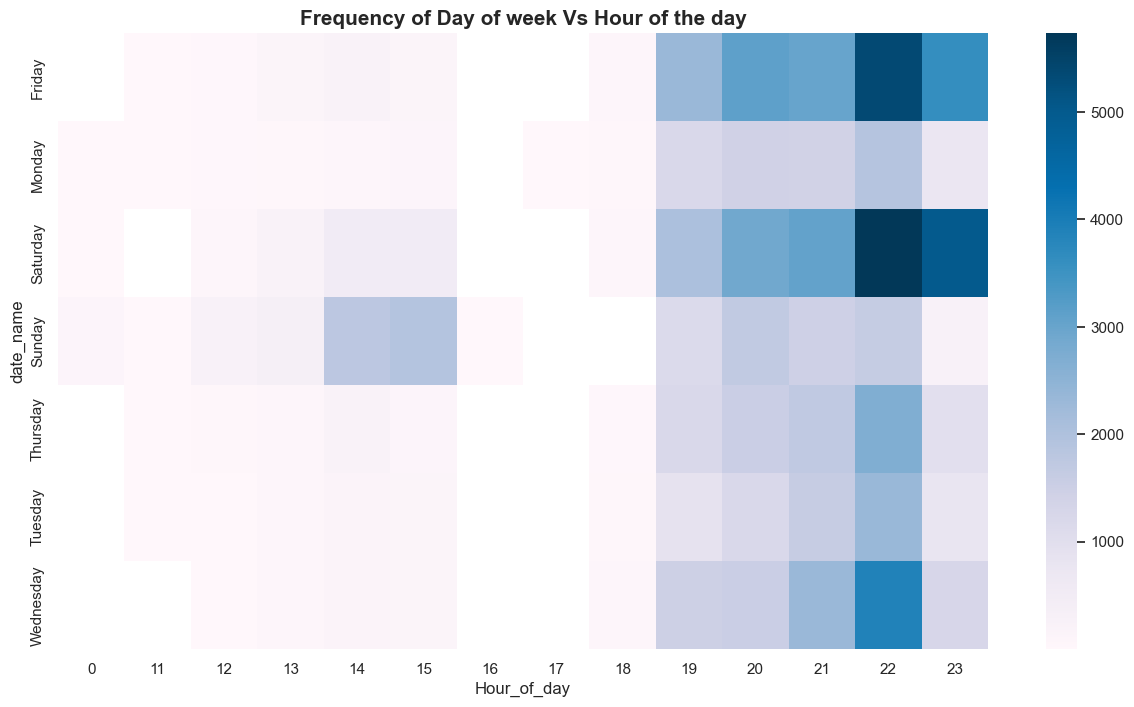

In [76]:
# We aimed to understand at which time of the week and at which time of the day, people use to come
# to the restaurants.

# Conclusions:
    # The most busy days of the week are:
        # Friday
        # Saturday
    # Sunday presents usually has some busy lunch hours. 
        

grouped_df = df.groupby(["date_name", "Hour_of_day"])["TotalAmount"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('date_name', 'Hour_of_day', 'TotalAmount')

plt.figure(figsize=(15,8))
sns.heatmap(grouped_df, cmap='PuBu')
plt.title("Frequency of Day of week Vs Hour of the day", fontsize=15, fontweight='bold')
plt.show()

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


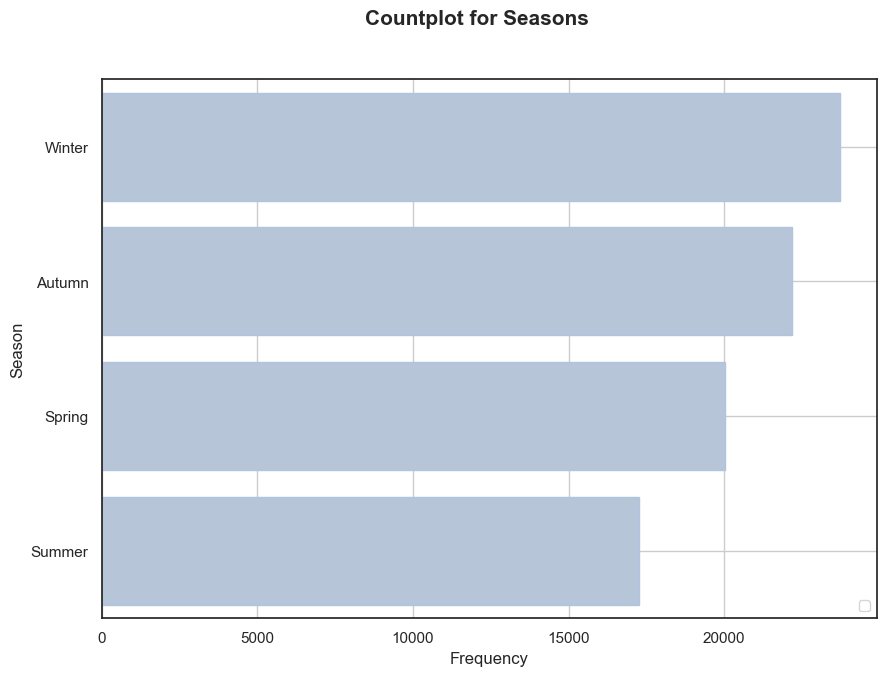

In [77]:
# Creating Invoice's Day of the Week attribute
'''
df.loc[(df['month']>= 1) &(df['month'] <=2), 'season'] = "Winter"
df.loc[(df['month']>= 3) &(df['month'] <=4), 'season'] = "Spring"
df.loc[(df['month']>= 5) &(df['month'] <=6), 'season'] = "Summer"
df.loc[(df['month']>= 7) &(df['month'] <=8), 'season'] = "Monsoon"
df.loc[(df['month']>= 9) &(df['month'] <=10), 'season'] = "Autumn"
df.loc[(df['month']>= 11) &(df['month'] <=12), 'season'] = "Winter"
'''

df.loc[(df['month']>= 1) &(df['month'] <=2), 'season'] = "Winter"
df.loc[(df['month']>= 3) &(df['month'] <=5), 'season'] = "Spring"
df.loc[(df['month']>= 6) &(df['month'] <=8), 'season'] = "Summer"
df.loc[(df['month']>= 9) &(df['month'] <=11), 'season'] = "Autumn"
df.loc[(df['month']> 11) &(df['month'] <=12), 'season'] = "Winter"

# Drawing a graph for Invoice's Day of the Week attribute
# Setting visual theme
sns.set_theme(style = 'white', palette = None)

# Plot
plt.figure(figsize=(10,7))

sns.countplot(data = df,
              y = df['season'],
              color='lightsteelblue',
              edgecolor='lightsteelblue',
              order = df['season'].value_counts().index
              )
# Layout
plt.suptitle('Countplot for Seasons', fontsize = 15, fontweight = 'bold')
plt.legend(title='', loc='lower right', prop={'size': 10})
plt.xlabel("Frequency")
plt.ylabel("Season")
plt.grid()
plt.show()

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



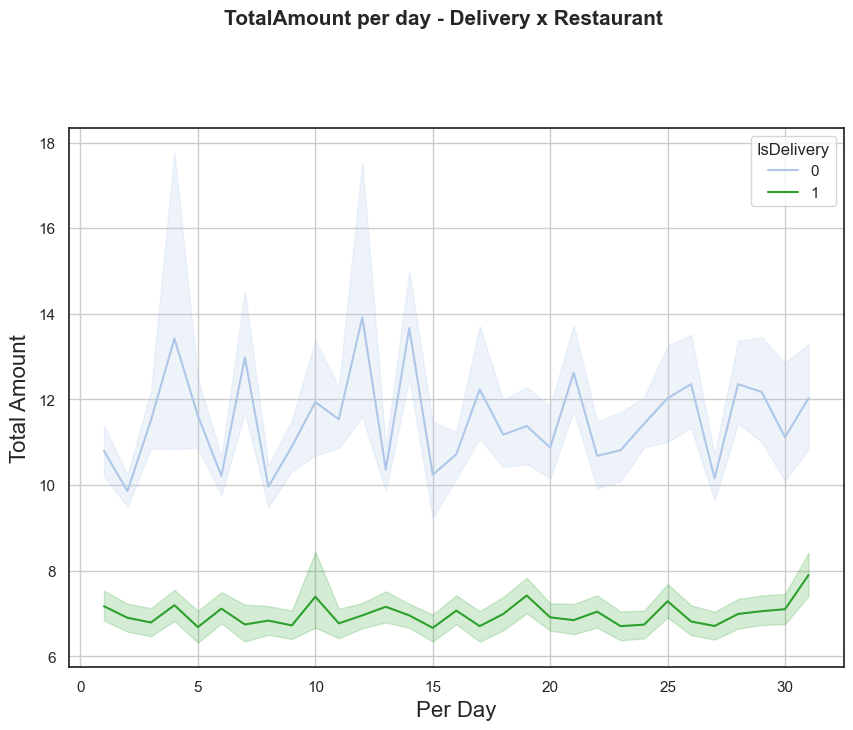

In [78]:
# Drawing a graph for Total Amount per Day
# Setting visual theme
sns.set_theme(style = 'white', palette = None)

# Plot
plt.figure(figsize=(10,7))

sns.lineplot(x="day", 
             y="TotalAmount",
             hue="IsDelivery",
             palette = ["#aec7e8", '#2ca02c'], 
             data=df)
# set the title and labels
plt.suptitle('TotalAmount per day - Delivery x Restaurant', fontsize=15, fontweight='bold', y=1.05)
plt.xlabel('Day')
plt.ylabel('Total Amount')
#plt.legend(['Restaurant', 'Delivery'], loc='lower right', prop={'size': 10})
plt.grid()

# rotate and move the y-axis label
plt.ylabel('Total Amount', ha='right',fontsize=16, labelpad = 20)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.05, 0.5)

#plt.title('Frequency of Customers by City', fontsize=20, fontweight='bold')
plt.xlabel('Per Day', fontsize=16)
plt.ylabel('Total Amount', fontsize=16)

# display the plot
plt.show()

In [79]:
# Creating National Holidays attribute
# Based on https://www.timeanddate.com/holidays/cyprus/2018

df['Date'] = df.InvoiceDateHour.apply(lambda x: x.date())

NationalHolidays = ['01-01-2018','06-01-2018','19-02-2018','25-03-2018','01-04-2018',
                    '06-04-2018','07-04-2018', '08-04-2018','09-04-2018','01-05-2018',
                    '28-05-2018','15-08-2018','01-10-2018','28-10-2018', '24-12-2018',
                    '25-12-2018','26-12-2018','31-12-2018']

holidays_date = pd.to_datetime(NationalHolidays, format='%d-%m-%Y')
holiday_dates = holidays_date.strftime('%Y-%m-%d').tolist()

df['Holiday'] = df.Date.apply(lambda x: 1 if str(x) in holiday_dates else 0)

display(df.head())

DocNumber  ProductDesignation ProductFamily  Qty  TotalAmount  \
0  TKD0320000012018            1/2 duck      Starters  1.0         27.1   
1  TKD0320000012018         Spring roll      Starters  8.0         17.6   
2  TKD0320000012018  Sweet sour chicken          Meat  2.0         20.2   
3  TKD0320000012018       Lemon chicken          Meat  1.0         10.1   
4  TKD0320000012018            Beef bbs      Sizzling  1.0         12.6   

      InvoiceDateHour  IsDelivery  Pax CustomerID CustomerCity  ... day  \
0 2018-01-01 19:12:12           1    1      53908     Leykosia  ...   1   
1 2018-01-01 19:12:12           1    1      53908     Leykosia  ...   1   
2 2018-01-01 19:12:12           1    1      53908     Leykosia  ...   1   
3 2018-01-01 19:12:12           1    1      53908     Leykosia  ...   1   
4 2018-01-01 19:12:12           1    1      53908     Leykosia  ...   1   

   month  year  Hour_of_day  date_name Weekday_Invoice  Weekend_Invoice  \
0      1  2018           19     Monday               0                0   
1      1  2018           19     Monday               0                0   
2      1  2018           19     Monday               0                0   
3      1  2018           19     Monday               0                0   
4      1  2018           19     Monday               0                0   

   season        Date Holiday  
0  Winter  2018-01-01       1  
1  Winter  2018-01-01       1  
2  Winter  2018-01-01       1  
3  Winter  2018-01-01       1  
4  Winter  2018-01-01       1  

[5 rows x 21 columns]

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


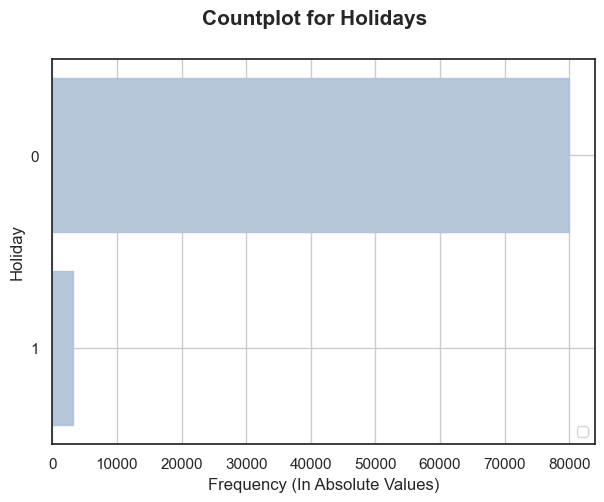

In [80]:
# Drawing a graph for Invoice's Day of the Week attribute
# Setting visual theme
sns.set_theme(style = 'white', palette = None)

# Plot
plt.figure(figsize=(7,5))

sns.countplot(data = df,
              y = df['Holiday'],
              color='lightsteelblue',
              edgecolor='lightsteelblue',
              order = df['Holiday'].value_counts().index
              )
# Layout
plt.suptitle('Countplot for Holidays', fontsize = 15, fontweight = 'bold')
plt.legend(title='', loc='lower right', prop={'size': 10})
plt.xlabel('Frequency (In Absolute Values)')
plt.ylabel('Holiday')
plt.grid()
plt.show()

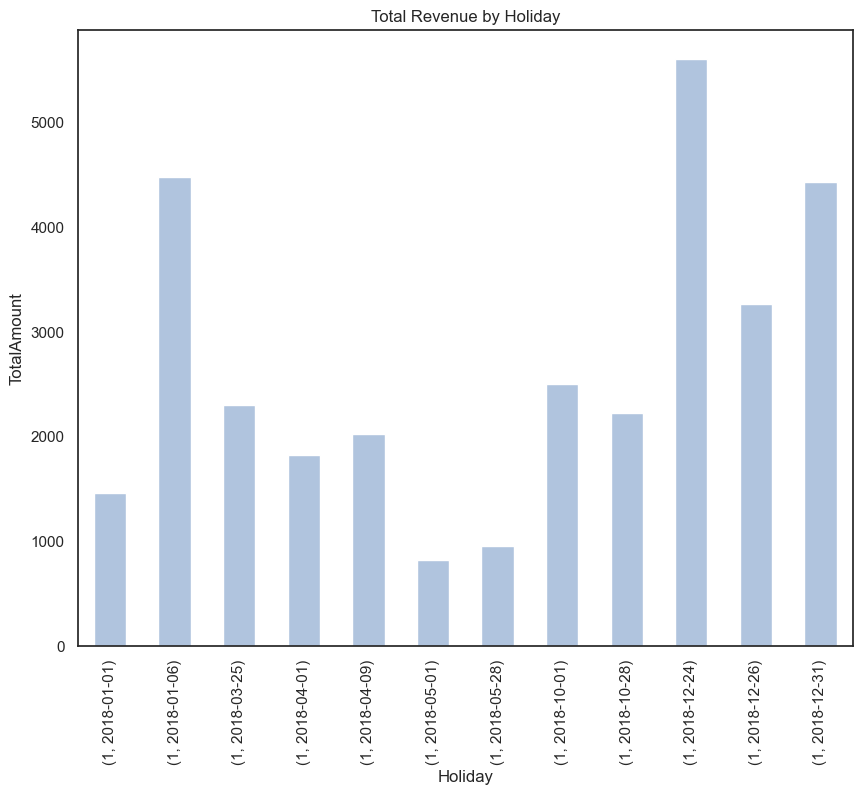

In [81]:
# The 'three most profitable' holidays are:
    # 24.12.2018, Christmas Eve
    # 31.12.2018, New Year's Eve
    # 06.01.2018, Epiphany
# This three holidays are separated for just 13 days. We suggest a special campaign during these two weeks. 

# Three 'two less profitable' holidays are:
    # 01.05.2018, Labour Day/May Day
    # 28.05.2018, Orthodox Pentecost Monday

# Group the data by holiday status and date and calculate the total revenue for each group
revenue_by_holiday = df[df['Holiday'] == 1].groupby(['Holiday', 'Date'])['TotalAmount'].sum()

# Layout
# Plot
ax = revenue_by_holiday.plot.bar(figsize=(10, 8),
                                color = ['lightsteelblue'])
ax.set_title('Total Revenue by Holiday')
ax.set_xlabel('Holiday')
ax.set_ylabel('TotalAmount')
plt
plt.show()

# **4. Modeling**


- **4.1) Association Rules**
- 4.1.1) Creating Pivot tables for apriori
- **4.2) Modelling: By Product**
- 4.2.2) Overall DataSet: Defining and Exploring some metrics as support, confidence and lift.
- 4.2.2) Key Takeaways
- **4.3) Modelling: Dinne-Inns**
- 4.3.1) Overall DataSet: Defining and Exploring some metrics as support, confidence and lift.
- 4.3.2) Key Takeaways
- **4.4) Modelling: Deliveries**
- 4.4.1) Overall DataSet: Defining and Exploring some metrics as support, confidence and lift.
- 4.4.2) Key Takeaways
- **4.5) Modelling: Dinne-Inns Excluding Water**
- 4.5.1) Overall DataSet: Defining and Exploring some metrics as support, confidence and lift.
- 4.5.2) Key Takeaways
- **4.6) Modelling: By Family**
- 4.6.1) Overall DataSet: Defining and Exploring some metrics as support, confidence and lift.
- 4.6.2) Key Takeaways
- **4.7) Menus Suggestions**
- 4.7.1) Menus for Dinne-Inns
- 4.7.2) Menus for Deliveries

- **4.1) Association Rules**
- 4.1.1) Creating Pivot tables for apriori

- **ASSUMPTIONS**
<br>
<br>
- **First Approach:** Firstly, we tried to understand the main conclusions analyzing both by product and by product family, without including any filter in our selection.
<br>
- **Second Approach:** As we saw previously throughout our report, since there are very different behaviours patterns between Dinne-Inns and Deliveries situations, we decided to create two different datasets and analyzing them separately. Additionally, in the Deliveries dataset, we decided to not include two products: Delivery Charge and Tsanta, both products related with the delivery process (not a meal itself), so that we get a cleaner visualization of the association rules.
<br>
- **Third Approach (Dinne - Inns):** after the first iteration, we noticed that the product Mineral water 1.5lt appeared very frequently in the association rules. In this sense, we decided to create a new dataset, derived from dinne-inn, but without including Mineral water 1.5lt, in order to understand deeply the behaviour patterns of the costumers.

In [82]:
# Here, we are creating the pivot tables to apply the apriori.

# 1. By Product, no restriction
df_pt = pd.pivot_table(df[['DocNumber','ProductDesignation']],
                    index='DocNumber',                                 # Each line represents a document (invoice).
                    columns='ProductDesignation',                      # Each column will represents a feature.
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)  # The value should be 1 if the product is present in the document, otherwise 0.

# 2. By Product, delivery.
df_pt_delivery = pd.pivot_table(df[(df.IsDelivery == 1)&(df.ProductDesignation != 'Tsanta')][["DocNumber","ProductDesignation"]], 
                         index='DocNumber', 
                         columns='ProductDesignation', 
                         aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0).drop("Delivery charge",axis=1) 


# 3. By Product, dinne_inn.
df_pt_dinne_in = pd.pivot_table(df[df.IsDelivery == 0][["DocNumber","ProductDesignation"]], 
                                index='DocNumber', 
                                columns='ProductDesignation', 
                                aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0) 


# 4. Dinne-Inns - excluding Water, since its highly unbalanced.
df_pt_dinne_in_no_water = pd.pivot_table(df[(df.IsDelivery == 0)&(df.ProductDesignation != 'Mineral water 1.5lt')][["DocNumber","ProductDesignation"]], 
                            index='DocNumber', 
                            columns='ProductDesignation', 
                            aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0) 


# 5. By Family, no restriction.
df_pt_family = pd.pivot_table(df[['DocNumber','ProductFamily']],
                    index='DocNumber',                                  # Each line represents a document (invoice).
                    columns='ProductFamily',                            # Each column will represents a feature.
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)   # The value should be 1 if the product is present in the document, otherwise 0


# Visualizing the table 1, by product with no restriction.
print("If we do not define any threshold, we have the following amount of association rules:", df_pt.shape)
df_pt.head()

If we do not define any threshold, we have the following amount of association rules: (11022, 255)


ProductDesignation   extra pancakes   extra salad   extra sauce  \
DocNumber                                                         
TK0110000012018                 0.0           0.0           0.0   
TK0110000022018                 0.0           0.0           0.0   
TK0110000032018                 0.0           0.0           0.0   
TK0110000042018                 0.0           0.0           0.0   
TK0110000052018                 0.0           0.0           0.0   

ProductDesignation   no baby corn   no beansprouts   no chilly   no egg  \
DocNumber                                                                 
TK0110000012018               0.0              0.0         0.0      0.0   
TK0110000022018               0.0              0.0         0.0      0.0   
TK0110000032018               0.0              0.0         0.0      0.0   
TK0110000042018               0.0              0.0         0.0      0.0   
TK0110000052018               0.0              0.0         0.0      0.0   

ProductDesignation   no meat   no mushrooms   no onion  ...  Volcano maki  \
DocNumber                                               ...                 
TK0110000012018          0.0            0.0        0.0  ...           0.0   
TK0110000022018          1.0            0.0        0.0  ...           0.0   
TK0110000032018          0.0            0.0        0.0  ...           0.0   
TK0110000042018          0.0            0.0        0.0  ...           0.0   
TK0110000052018          0.0            0.0        0.0  ...           0.0   

ProductDesignation  Whisky 17.5  Whisky 37.5cl  Whisky 5cl  \
DocNumber                                                    
TK0110000012018             0.0            0.0         0.0   
TK0110000022018             0.0            0.0         0.0   
TK0110000032018             0.0            0.0         0.0   
TK0110000042018             0.0            0.0         0.0   
TK0110000052018             0.0            0.0         0.0   

ProductDesignation  Whisky premium 5cl  Whole duck  Wine  Yellow dal dhaba  \
DocNumber                                                                    
TK0110000012018                    0.0         0.0   0.0               0.0   
TK0110000022018                    0.0         0.0   0.0               0.0   
TK0110000032018                    0.0         0.0   0.0               0.0   
TK0110000042018                    0.0         0.0   0.0               0.0   
TK0110000052018                    0.0         0.0   0.0               0.0   

ProductDesignation  Zivania 20cl  Zivania 5cl  
DocNumber                                      
TK0110000012018              0.0          0.0  
TK0110000022018              0.0          0.0  
TK0110000032018              0.0          0.0  
TK0110000042018              0.0          0.0  
TK0110000052018              0.0          0.0  

[5 rows x 255 columns]

- **4.2) Modelling: Overall DataSet**
- 4.2.2) Overall DataSet: Defining and Exploring some metrics as support, confidence and lift.

- **Itemset:** "list of all the items in the antecedent and the consequent".
- **Support:** "the fraction of the total number of transactions in which the itemset occurs (%)". 
- **Antecedent Support:** represents the frequency of the antecedent itemset in the dataset (%).
- **Consequent Support:** represents the frequency of the consequent itemset in the dataset (%).
- **Confidence:** "the conditional probability of occurrence of consequent given the antecedent (%)".
- **Lift:** "the conditional probability of occurrence of consequent given the antecedent".

In [83]:
# Here, we aim to apply the APRIORI algorithm.
# The 'min_support' parameter, measn that this rules are supported in more than 5% of the transactions.
# Source:
    # http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

# We can define the itemset as "the list of all the items in the antecedent and the consequent".
# Source:
    # https://towardsdatascience.com/association-rules-2-aa9a77241654
    # https://www.geeksforgeeks.org/association-rule/

frequent_itemsets = apriori(df_pt, min_support=0.05, use_colnames=True)

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



**Defining a threshold of 10% for support** <br>
**Defining a threshold of 50% for confidence** <br>
**Defining a threshold of 1.5 for lift** <br>

In [84]:
# Here, we aim to generate the association rules - by support.
# According to the same source, the support is "the fraction of the total number of transactions in which the itemset occurs".
# Source:
    # https://towardsdatascience.com/association-rules-2-aa9a77241654
    # https://www.geeksforgeeks.org/association-rule/
    # https://www.ibm.com/docs/en/db2/9.7?topic=associations-support-in-association-rule
rules_support = association_rules(frequent_itemsets, metric="support", min_threshold=0.1)
rules_support.sort_values(by='support', ascending=False, inplace=True)



# Here, we aim to generate the association rules - by confidence.
# According to the same source, the confidence is "the conditional probability of occurrence of 
# consequent given the antecedent".
# Source:
    # https://towardsdatascience.com/association-rules-2-aa9a77241654
    # https://www.geeksforgeeks.org/association-rule/
rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.50)
rules_confidence.sort_values(by='confidence', ascending=False, inplace=True)



# Here, we aim to generate the association rules - by lift.
# According to the same source, the lift is "the conditional probability of occurrence of 
# consequent given the antecedent".
# Source:
    # https://towardsdatascience.com/association-rules-2-aa9a77241654
    # https://www.geeksforgeeks.org/association-rule/
    # https://www.ibm.com/docs/en/db2/11.1?topic=SSEPGG_11.1.0/com.ibm.im.model.doc/c_lift_in_an_association_rule.htm
rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rules_lift.sort_values(by='lift', ascending=False, inplace=True)

# Visualizing the lift values sorted descendently.
rules_lift.sort_values(by=['lift'], ascending=False).head(5)

antecedents  \
50          (Spring roll, Noodles with meat)   
55                                ( no meat)   
46  (Noodles with meat, Mineral water 1.5lt)   
49                                ( no meat)   
42       (Egg fried rice, Noodles with meat)   

                                 consequents  antecedent support  \
50                                ( no meat)            0.090637   
55          (Spring roll, Noodles with meat)            0.097441   
46                                ( no meat)            0.099710   
49  (Noodles with meat, Mineral water 1.5lt)            0.097441   
42                                ( no meat)            0.088732   

    consequent support   support  confidence      lift  leverage  conviction  
50            0.097441  0.064054    0.706707  7.252627  0.055222    3.077324  
55            0.090637  0.064054    0.657356  7.252627  0.055222    2.653956  
46            0.097441  0.066594    0.667880  6.854164  0.056878    2.717567  
49            0.099710  0.066594    0.683426  6.854164  0.056878    2.843858  
42            0.097441  0.056795    0.640082  6.568884  0.048149    2.507677

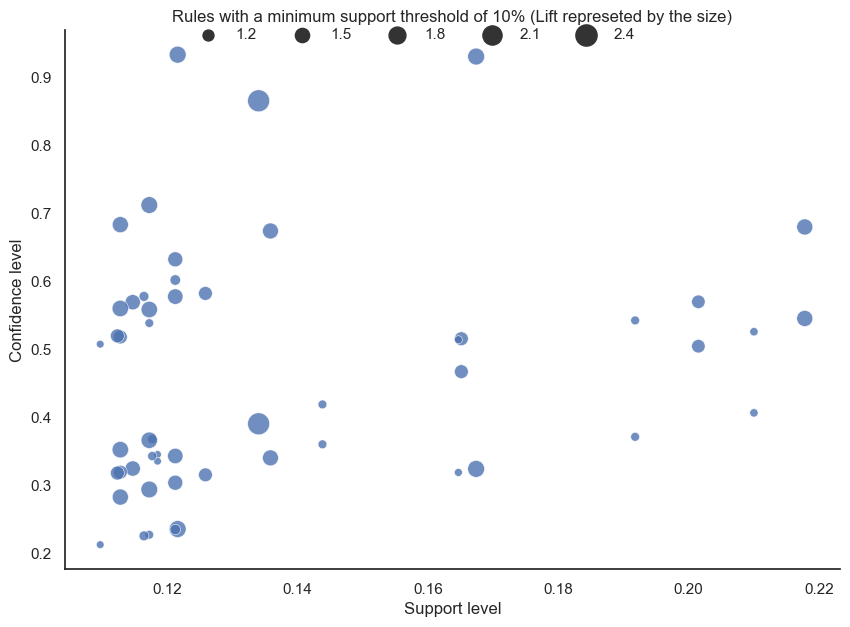

In [85]:
# Scatter plot of these rules.
# We cand understand below that normally, there is a tendency for a positive correlation between
# the metrics 'support' and 'confidence', although without a very high value in absolute terms.
# The size


# Draw
fig, ax = plt.subplots(figsize=(10,7))
g = sns.scatterplot(data=rules_support, 
                    x="support", 
                    y="confidence", 
                    size="lift", 
                    sizes=(30, 250), 
                    alpha=0.8)

# Plot
sns.despine()
plt.title("Rules with a minimum support threshold of 10% (Lift represeted by the size)", fontsize=12)
plt.xlabel("Support level")
plt.ylabel("Confidence level")
plt.rc('axes', labelsize=12)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=6, bbox_to_anchor=(0.45, 1.03), frameon=False)

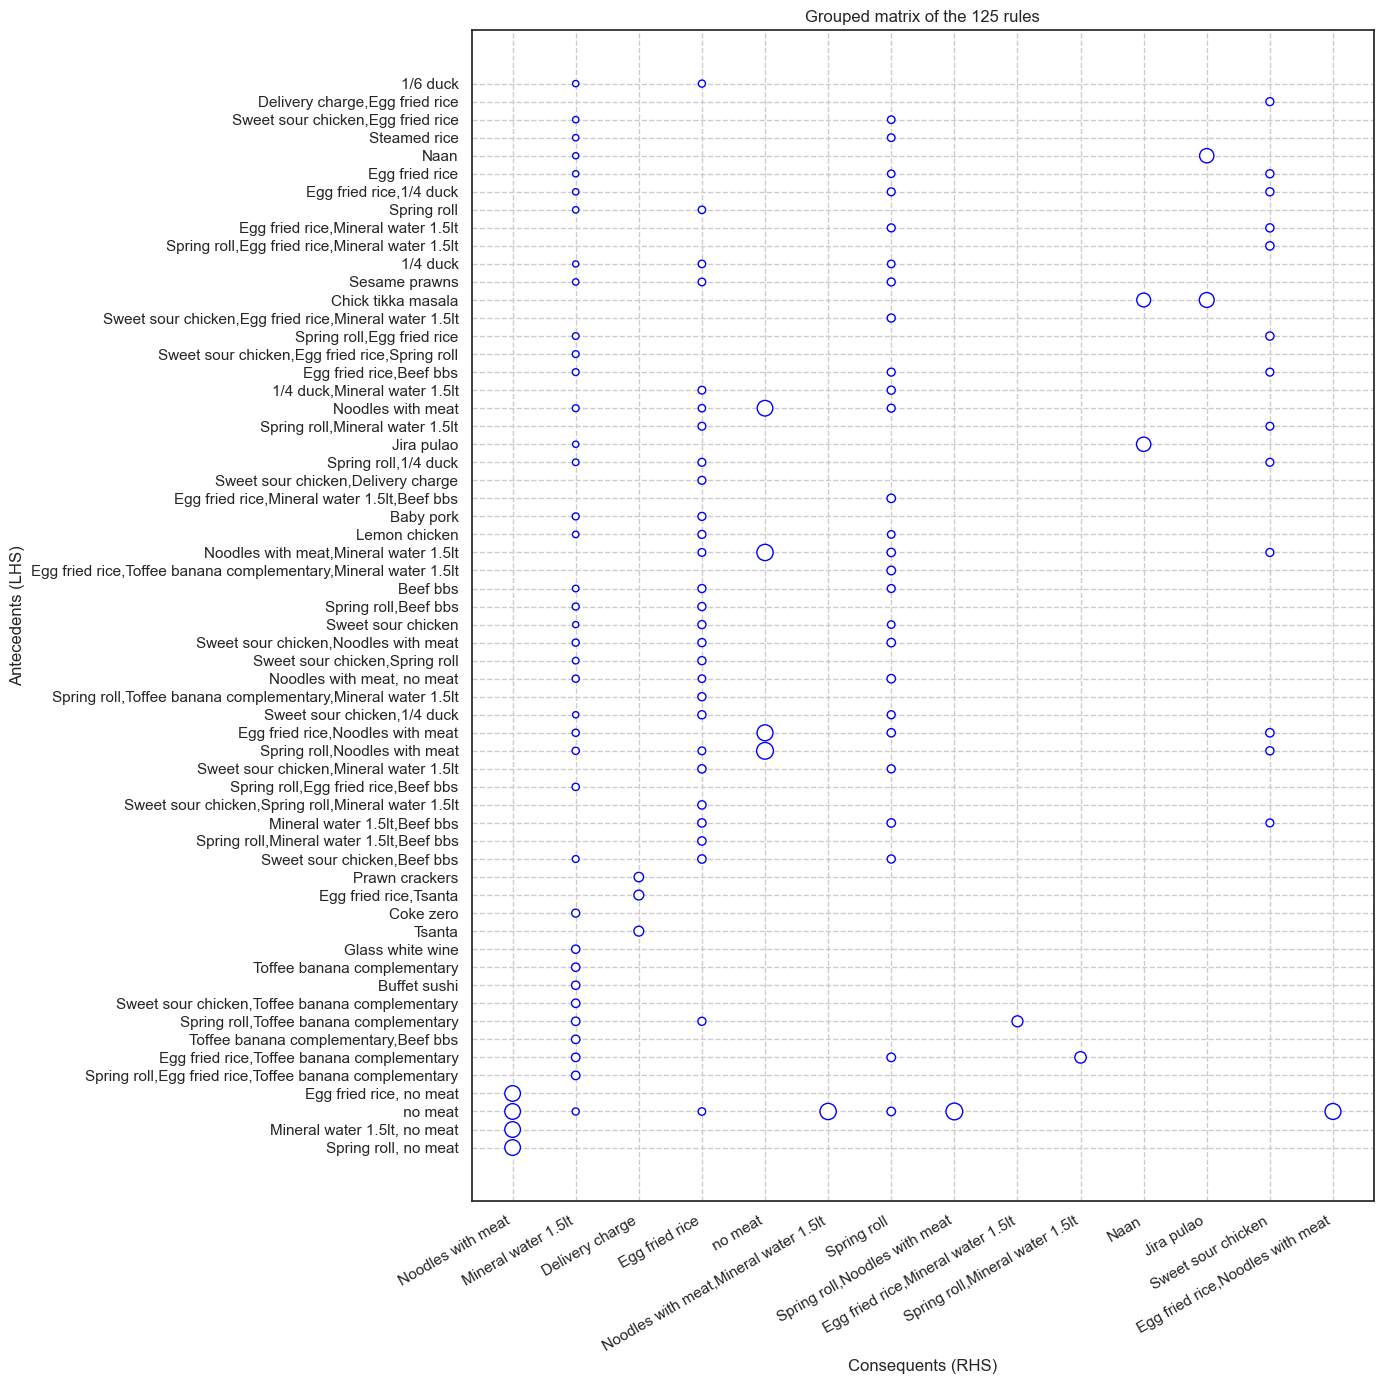

In [86]:
# Bubble plot of the rules.

# The plot displays the relationship between the support and confidence levels of different rules in a dataset, 
# where each point represents a rule. 
# In this plot, the size of each point (ball) represents the lift, which is a measure of the 
# strength of the association between the antecedent and consequent of a rule. 
# Points with a higher lift will have a bigger size, and points with a lower lift will have a smaller size.
    # Therefore, bigger balls on the plot indicate that the corresponding rules have a higher lift, 
    # which means a stronger association between the antecedent and consequent of the rule.

# Replace frozen sets with strings
rules_confidence['antecedents_'] = rules_confidence['antecedents'].apply(lambda a: ','.join(list(a)))
rules_confidence['consequents_'] = rules_confidence['consequents'].apply(lambda a: ','.join(list(a)))

# Draw
fig, ax = plt.subplots(figsize=(14,14))
ax= plt.scatter(data=rules_confidence, 
                x='consequents_', 
                y='antecedents_', 
                s = rules_confidence['lift']*20, 
                edgecolors = "blue", 
                c = "white", 
                zorder = 2)

# Plot
nRules=rules_confidence.shape[0]
plt.title(f"Grouped matrix of the {nRules} rules", fontsize=12)
plt.xlabel("Consequents (RHS)")
plt.ylabel("Antecedents (LHS)")
plt.grid(ls = "--", zorder = 1)
fig.autofmt_xdate()
plt.tight_layout()

In [87]:
# General summary for rules lift threshold defined.

rules_lift.describe()

antecedent support  consequent support     support  confidence  \
count          224.000000          224.000000  224.000000  224.000000   
mean             0.215874            0.215874    0.071424    0.430103   
std              0.121926            0.121926    0.025747    0.225641   
min              0.052622            0.052622    0.050082    0.097159   
25%              0.115973            0.115973    0.055344    0.260572   
50%              0.191798            0.191798    0.064054    0.369457   
75%              0.320541            0.320541    0.076120    0.601049   
max              0.517329            0.517329    0.217837    1.000000   

             lift    leverage  conviction  
count  224.000000  224.000000  224.000000  
mean     2.221765    0.033562         inf  
std      1.297871    0.013434         NaN  
min      1.501831    0.017842    1.049330  
25%      1.642947    0.024372    1.135518  
50%      1.788163    0.029447    1.294689  
75%      2.007419    0.037471    1.652808  
max      7.252627    0.089702         inf

**Exploring the most frequent items**

In [88]:
# Measuring the quantity of products per set.

frequent_itemsets['products_per_set'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))


# Checking the results for a 'products_per_set' = 2 and a Support >= 0.1.
# Reminding, a support repreents the percentage of transactions in the entire dataset that contain a particular itemset. 
# In this case, we aim to filter all the itemsets that represents at least 10% of the total transactions.

frequent_itemsets[(frequent_itemsets['products_per_set'] == 2) & (frequent_itemsets['support'] >= 0.17)]

support                               itemsets  products_per_set
68  0.210034  (Egg fried rice, Mineral water 1.5lt)                 2
71  0.201506          (Spring roll, Egg fried rice)                 2
72  0.217837   (Sweet sour chicken, Egg fried rice)                 2
83  0.191798     (Spring roll, Mineral water 1.5lt)                 2

In [89]:
# Itemsets with both high 'Confidence' and high 'Lift'.

rules_confidence[(rules_confidence['lift'] >= 3) & (rules_confidence['confidence'] >= 0.7)]

antecedents          consequents  antecedent support  \
55           (Spring roll,  no meat)  (Noodles with meat)            0.064054   
52   (Mineral water 1.5lt,  no meat)  (Noodles with meat)            0.066594   
3                         ( no meat)  (Noodles with meat)            0.097441   
47        (Egg fried rice,  no meat)  (Noodles with meat)            0.056795   
54  (Spring roll, Noodles with meat)           ( no meat)            0.090637   

    consequent support   support  confidence      lift  leverage  conviction  \
55            0.158410  0.064054    1.000000  6.312715  0.053907         inf   
52            0.158410  0.066594    1.000000  6.312715  0.056045         inf   
3             0.158410  0.097441    1.000000  6.312715  0.082006         inf   
47            0.158410  0.056795    1.000000  6.312715  0.047798         inf   
54            0.097441  0.064054    0.706707  7.252627  0.055222    3.077324   

                     antecedents_       consequents_  
55           Spring roll, no meat  Noodles with meat  
52   Mineral water 1.5lt, no meat  Noodles with meat  
3                         no meat  Noodles with meat  
47        Egg fried rice, no meat  Noodles with meat  
54  Spring roll,Noodles with meat            no meat

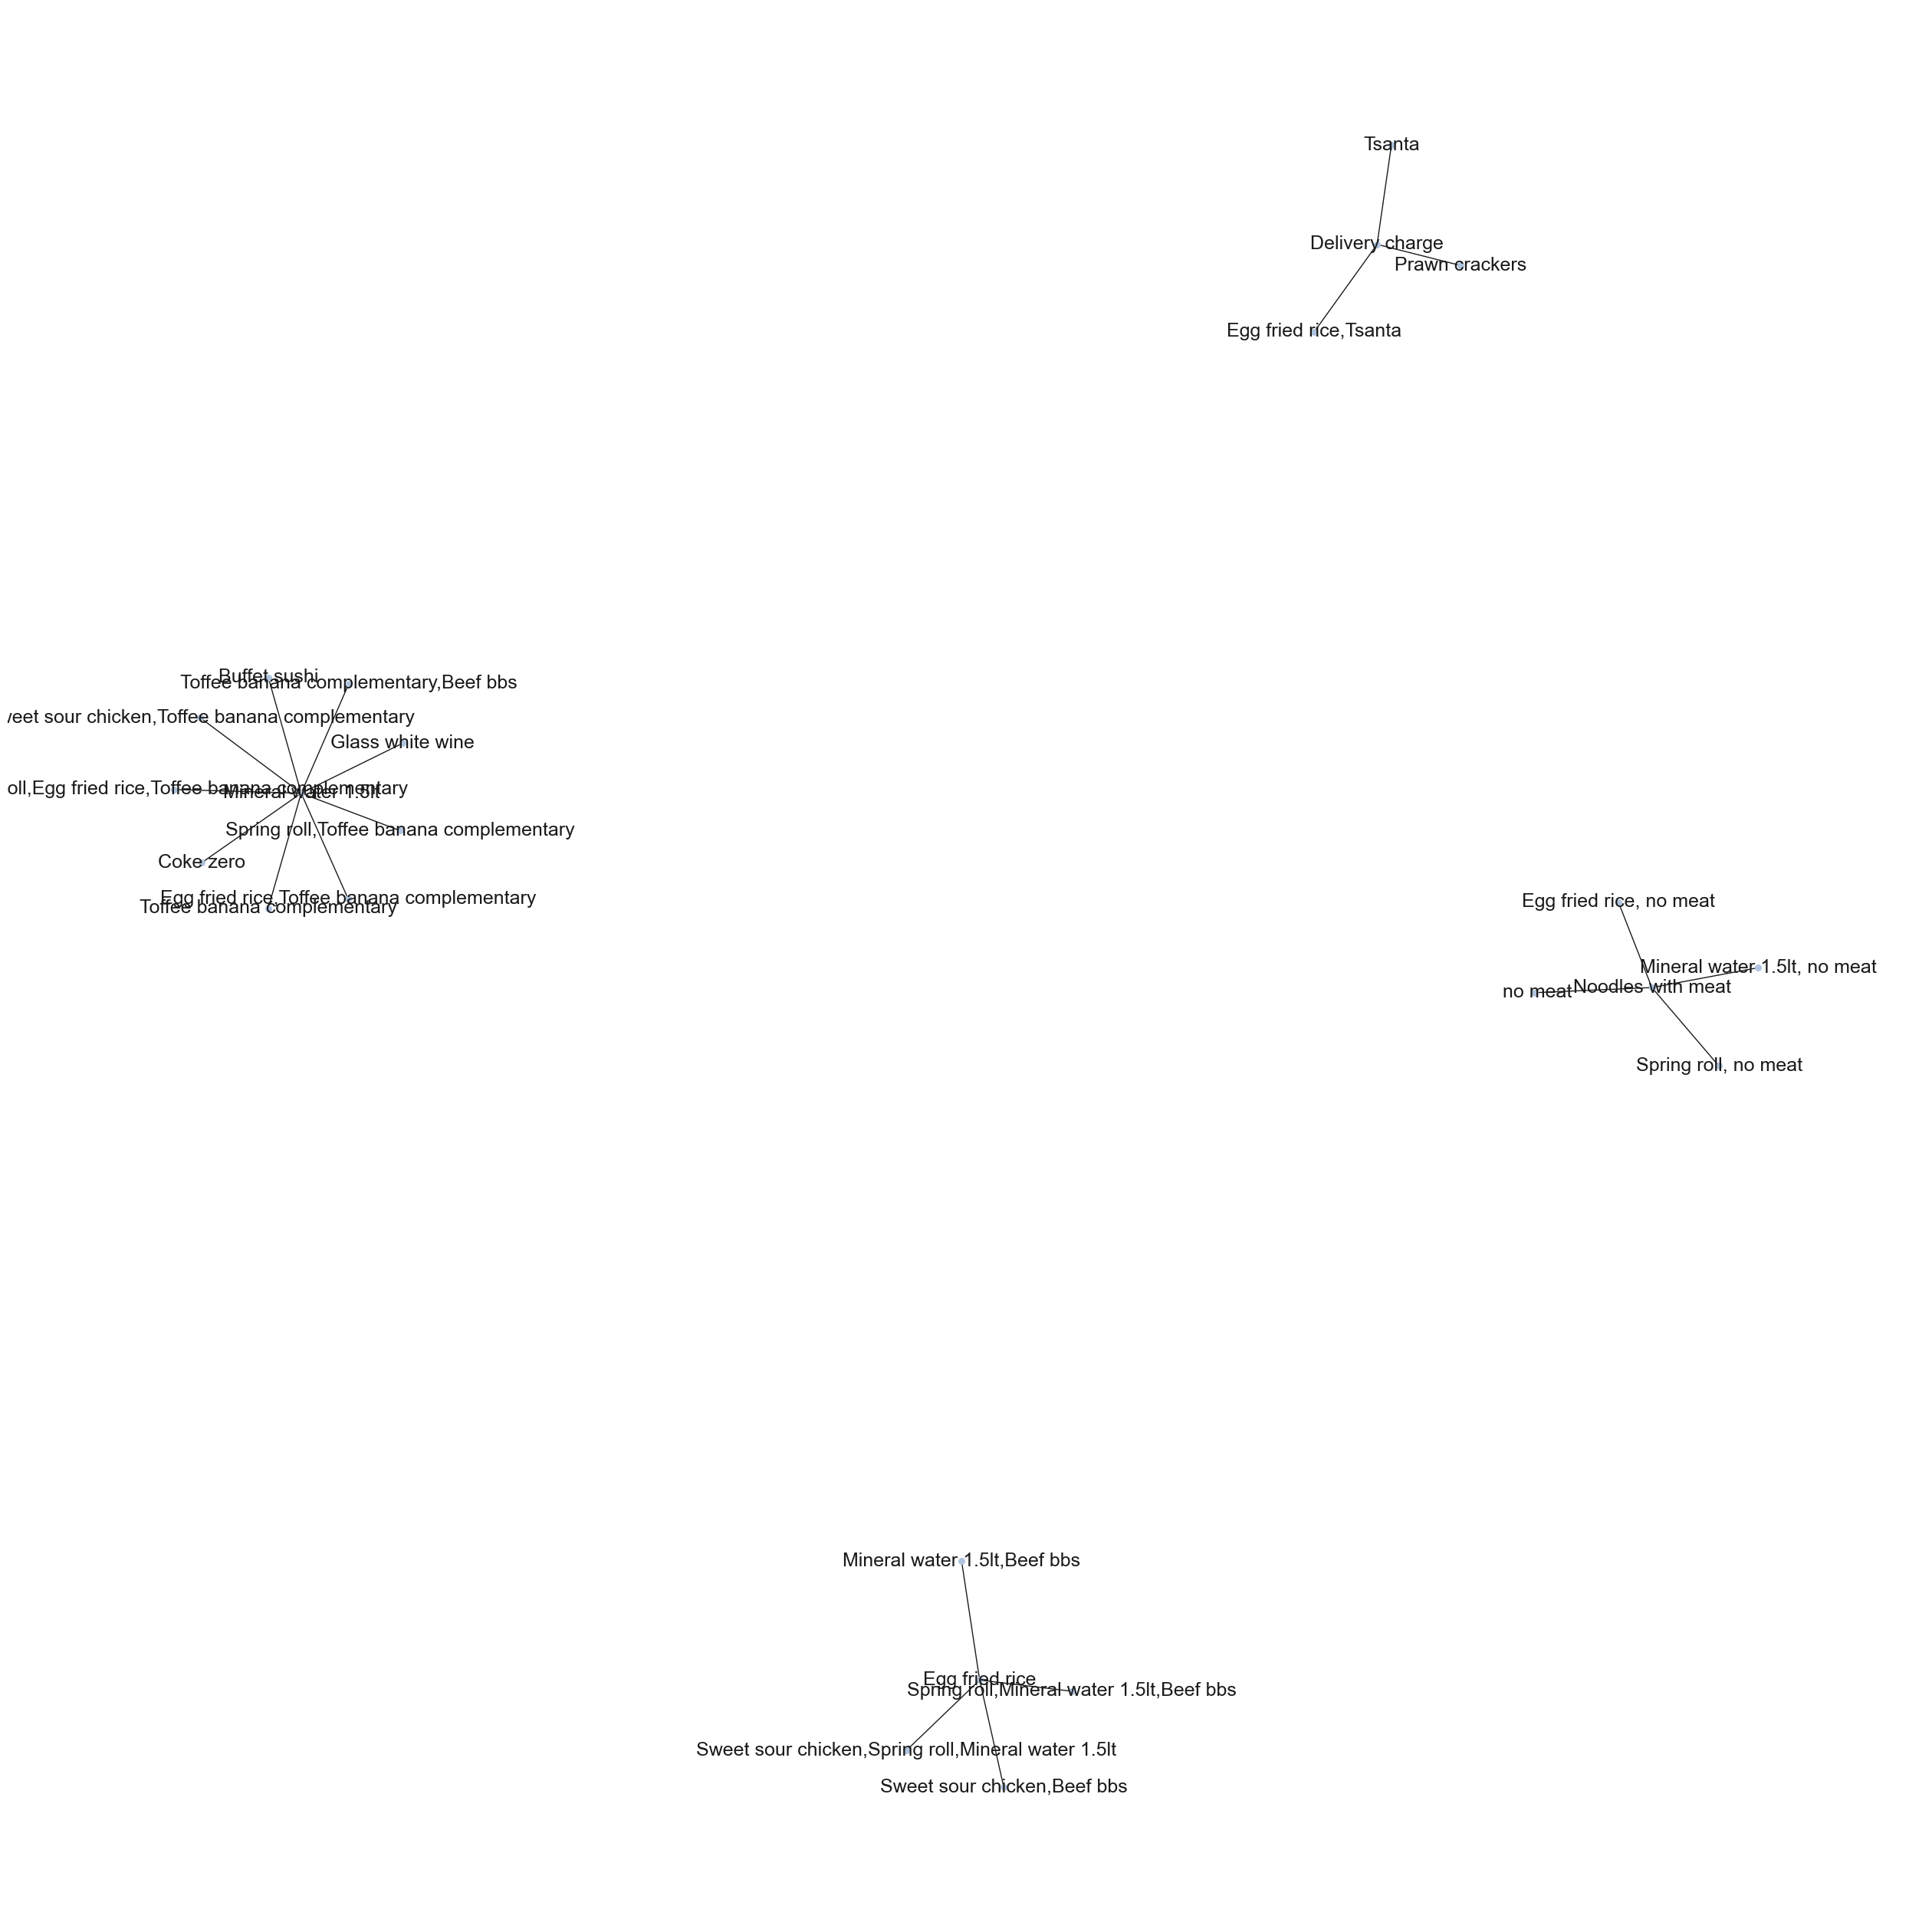

In [90]:
# First draft.
# Plot a basic network graph of the top 20 confidence rules

# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rules_confidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]

# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)

# Plot Graphically
rulesToPlot=rulesToPlot[:20]
fig = plt.figure(figsize=(25, 25)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
np.random.seed(1000)
nx.draw(G, with_labels=True, 
        node_size=30, 
        node_color="lightsteelblue", 
        font_size = 18,
        pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

- **4.2) Modelling: By Product**
- 4.2.2) Key Takeaways <br>
<br>
- **Most frequent consequents:** Egg Fried Rice, Mineral Water 1.5LT, Delivery Charge and Noodles with meat.
- All the dots that are closer to each of these "centers", are the most usual antecedents.
- The closer is the point, the higher is the confidence level.
- We still verify that the product Tsanta is closely linked with Delivery Charge. Both most not be taken into consideration. 

- **4.3) Modelling: Dinne-Inns**
- 4.3.1) Overall DataSet: Defining and Exploring some metrics as support, confidence and lift.

**Defining a threshold of 10% for support** <br>
**Defining a threshold of 50% for confidence** <br>
**Defining a threshold of 0 for lift (to analyze possible substitute products)** <br>

In [91]:
# DINNE INNS
frequent_itemsets_dinne_in = apriori(df_pt_dinne_in, min_support=0.05, use_colnames=True) 

# Defining Support
rules_support_dinne_in = association_rules(frequent_itemsets_dinne_in, metric="support", min_threshold=0.10) 
rules_support_dinne_in.sort_values(by='support', ascending=False, inplace=True) 
print(rules_support_dinne_in.head(3))

# Defining Confidence
rules_confidence_dinne_in = association_rules(frequent_itemsets_dinne_in, metric="confidence", min_threshold=0.50) 
rules_confidence_dinne_in.sort_values(by='confidence', ascending=False, inplace=True) 
print(rules_confidence_dinne_in.head(3))
 
# Defining Lift
rules_lift_dinne_in = association_rules(frequent_itemsets_dinne_in, metric="lift", min_threshold=0)  
rules_lift_dinne_in.sort_values(by='lift', ascending=False, inplace=True) 
rules_lift_dinne_in.head(3)

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



              antecedents            consequents  antecedent support  \
24       (Egg fried rice)  (Mineral water 1.5lt)            0.390702   
25  (Mineral water 1.5lt)       (Egg fried rice)            0.906544   
43  (Mineral water 1.5lt)          (Spring roll)            0.906544   

    consequent support   support  confidence      lift  leverage  conviction  
24            0.906544  0.368253    0.942543  1.039710  0.014065    1.626540  
25            0.390702  0.368253    0.406217  1.039710  0.014065    1.026129  
43            0.356950  0.336252    0.370917  1.039129  0.012662    1.022203  
                                           antecedents          consequents  \
94                      (Sweet sour chicken,  no meat)  (Noodles with meat)   
277  ( no meat, Toffee banana complementary, Minera...  (Noodles with meat)   
254            (Spring roll, Egg fried rice,  no meat)  (Noodles with meat)   

     antecedent support  consequent support   support  confidence      lift  \

antecedents  \
1144                   (Spring roll, Noodles with meat)   
1129    (Egg fried rice, Mineral water 1.5lt,  no meat)   
1133  (Noodles with meat, Spring roll, Mineral water...   

                                          consequents  antecedent support  \
1144  (Egg fried rice, Mineral water 1.5lt,  no meat)            0.115587   
1129                 (Spring roll, Noodles with meat)            0.073714   
1133                       (Egg fried rice,  no meat)            0.111606   

      consequent support   support  confidence      lift  leverage  conviction  
1144            0.073714  0.053972    0.466942  6.334479  0.045452    1.737683  
1129            0.115587  0.053972    0.732181  6.334479  0.045452    3.302285  
1133            0.077695  0.053972    0.483595  6.224302  0.045301    1.786011

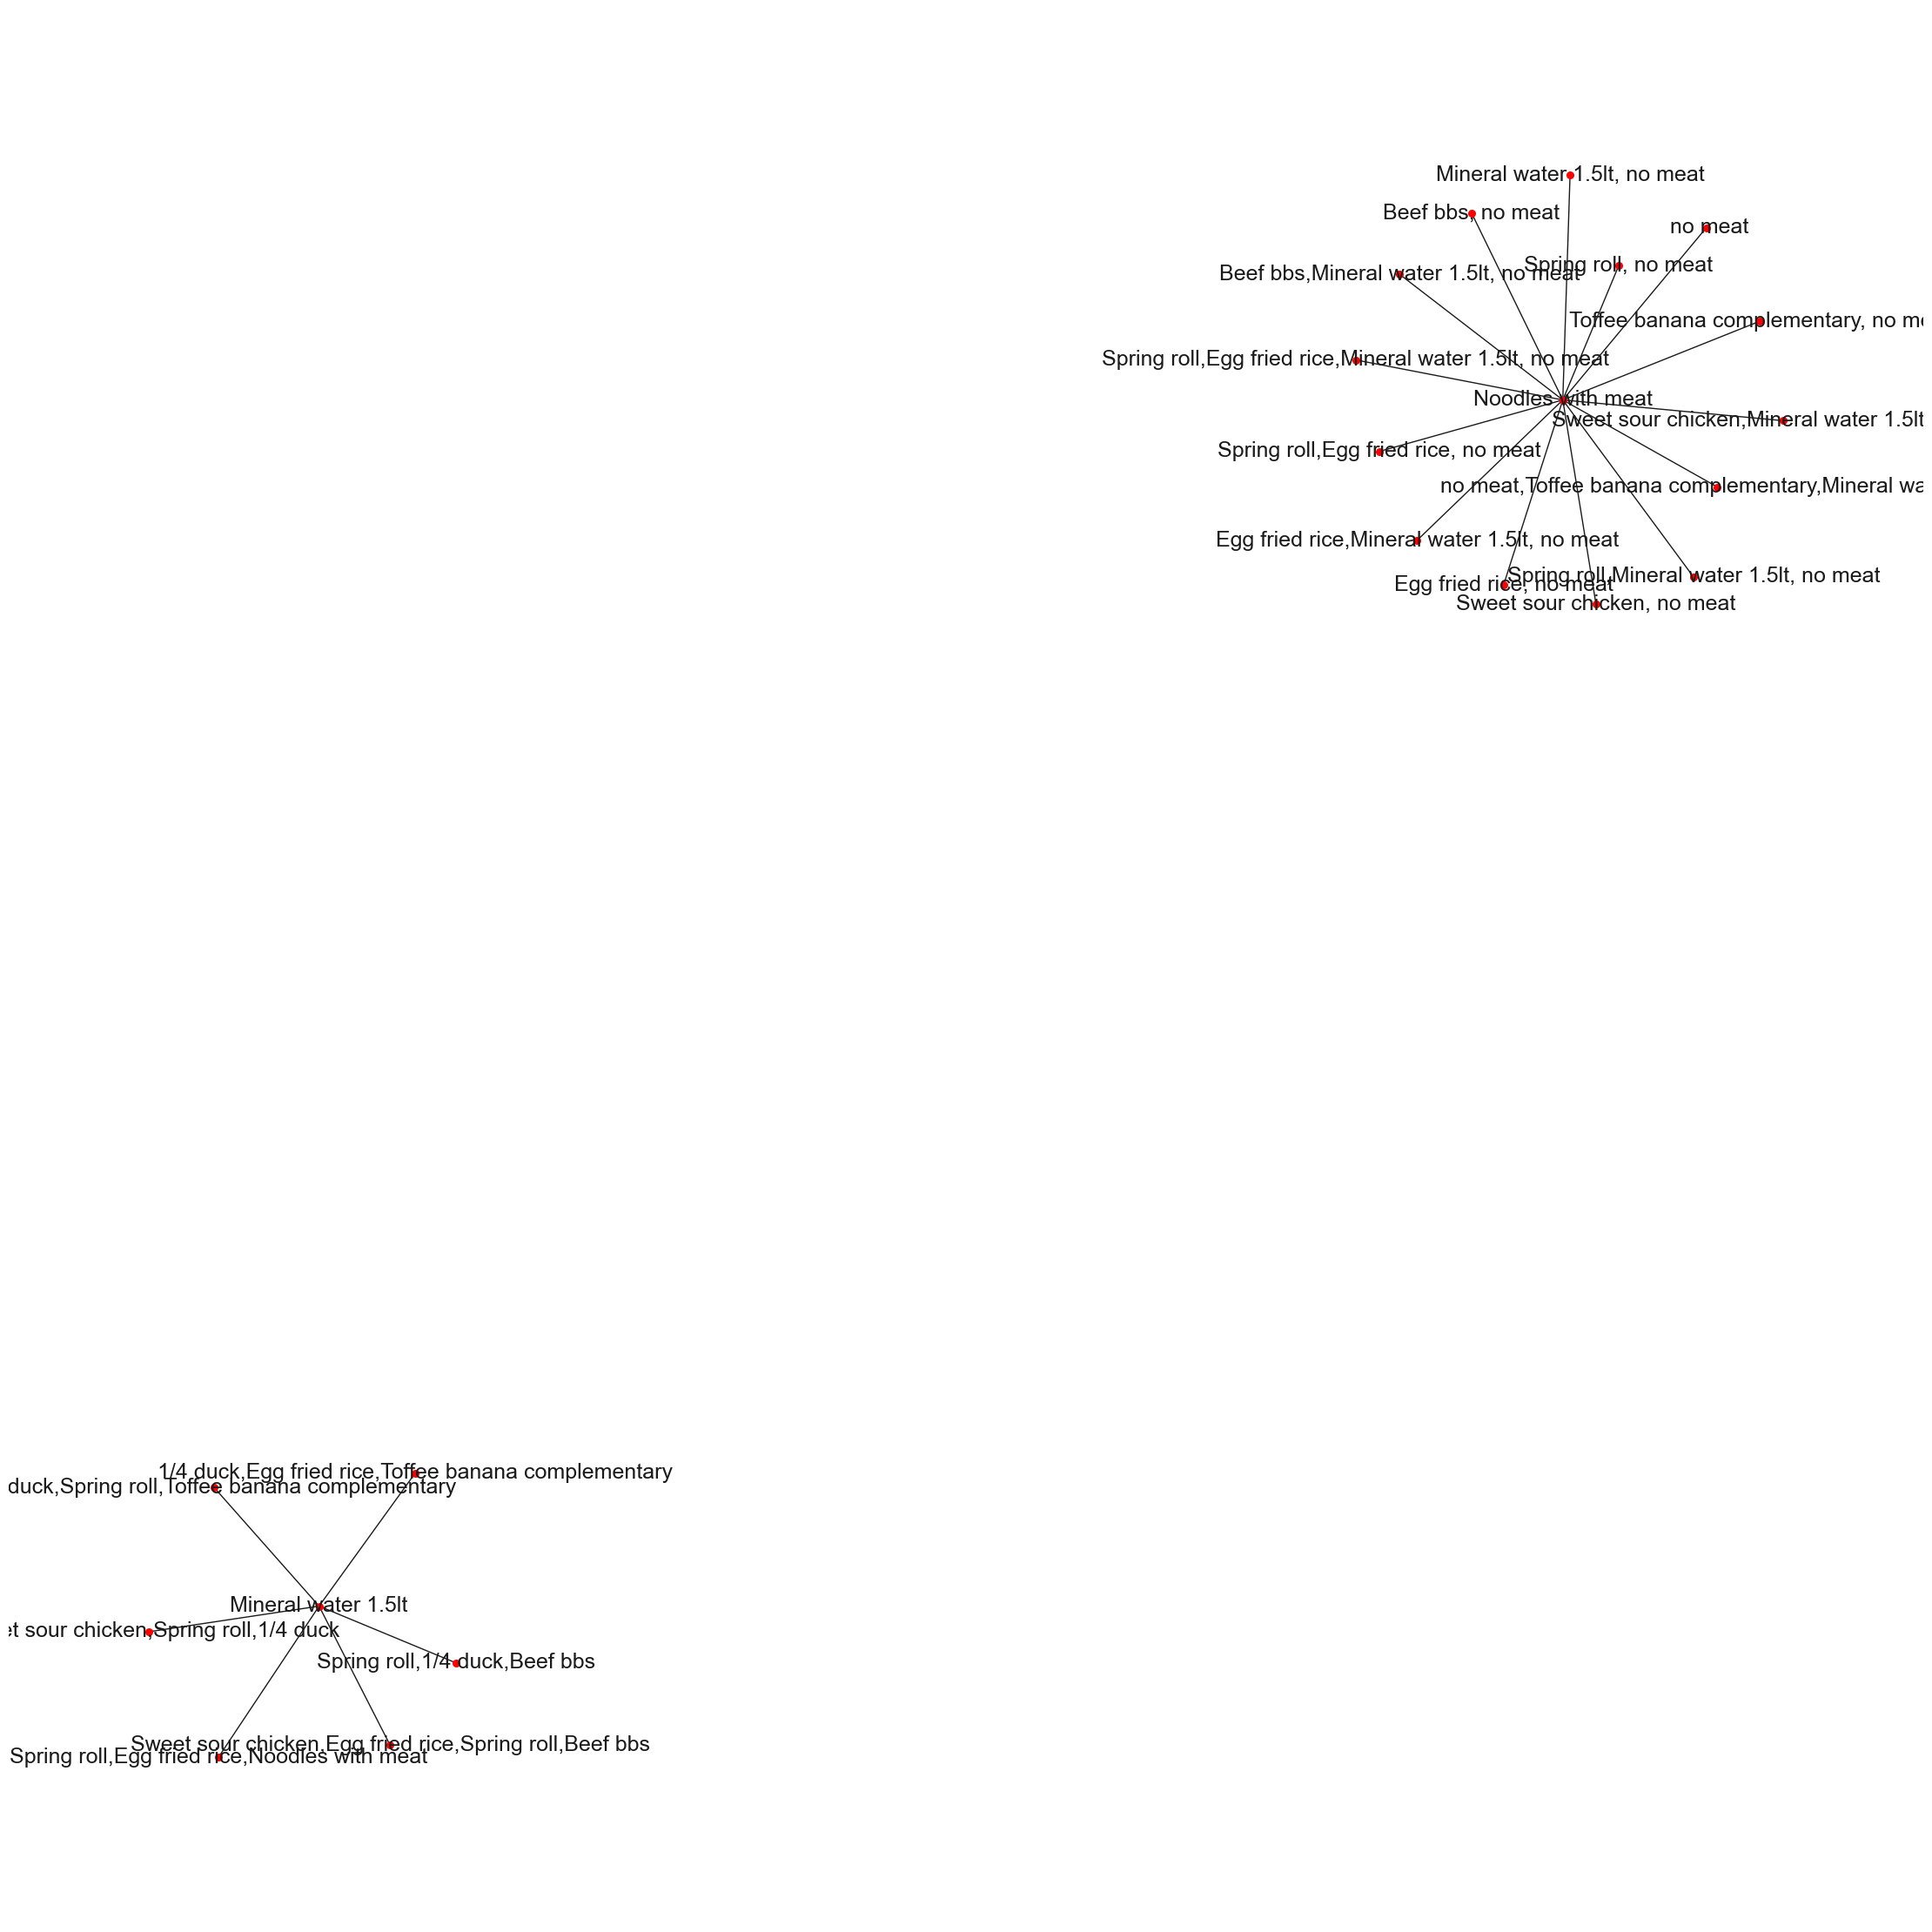

In [92]:
# First draft.
# Plot a basic network graph of the top 20 confidence rules

# Create a copy of the rules and transform the frozensets to strings
rulesToPlot_dinne_in = rules_confidence_dinne_in.copy(deep=True)
rulesToPlot_dinne_in['LHS'] = [','.join(list(x)) for x in rulesToPlot_dinne_in['antecedents']]
rulesToPlot_dinne_in['RHS'] = [','.join(list(x)) for x in rulesToPlot_dinne_in['consequents']]

# Remove duplicate if reversed rules
rulesToPlot_dinne_in['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot_dinne_in.LHS, rulesToPlot_dinne_in.RHS)]
rulesToPlot_dinne_in['sortedRow'] = rulesToPlot_dinne_in['sortedRow'].astype(str)
rulesToPlot_dinne_in.drop_duplicates(subset=['sortedRow'], inplace=True)

# Plot Graphically
rulesToPlot_dinne_in=rulesToPlot_dinne_in[:20]
fig = plt.figure(figsize=(22, 22)) 
G = nx.from_pandas_edgelist(rulesToPlot_dinne_in, 'LHS', 'RHS')
np.random.seed(1000)
nx.draw(G, with_labels=True, 
        node_size=30, 
        node_color="red", 
        font_size = 18,
        pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

- **4.3) Modelling: Dinne-Inns**
- 4.3.2) Key Takeaways <br>
<br>
- **Most frequent consequents:** Mineral Water 1.5LT and Noodles with meat.
- All the dots that are closer to each of these "centers", are the most usual antecedents.
- The closer is the point, the higher is the confidence level.

- **4.4) Modelling: Deliveries**
- 4.4.1) Overall DataSet: Defining and Exploring some metrics as support, confidence and lift.

**Defining a threshold of 10% for support** <br>
**Defining a threshold of 50% for confidence** <br>
**Defining a threshold of 0 for lift (to analyze possible substitute products)** <br>

In [93]:
# DElIVERIES
frequent_itemsets_delivery = apriori(df_pt_delivery, min_support=0.05, use_colnames=True) 

# Defining Support
rules_support_delivery = association_rules(frequent_itemsets_delivery, metric="support", min_threshold=0.10) 
rules_support_delivery.sort_values(by='support', ascending=False, inplace=True) 
print(rules_support_delivery.head(3))

# Defining Confidence
rules_confidence_delivery = association_rules(frequent_itemsets_delivery, metric="confidence", min_threshold=0.50) 
rules_confidence_delivery.sort_values(by='confidence', ascending=False, inplace=True) 
print(rules_confidence_delivery.head(3))
 
# Defining Lift
rules_lift_delivery = association_rules(frequent_itemsets_delivery, metric="lift", min_threshold=0)  
rules_lift_delivery.sort_values(by='lift', ascending=False, inplace=True) 
rules_lift_delivery.head(3) 

             antecedents           consequents  antecedent support  \
10  (Sweet sour chicken)      (Egg fried rice)            0.336216   
11      (Egg fried rice)  (Sweet sour chicken)            0.411727   
8          (Spring roll)      (Egg fried rice)            0.349715   

    consequent support   support  confidence      lift  leverage  conviction  
10            0.411727  0.216832    0.644918  1.566372  0.078403    1.656725  
11            0.336216  0.216832    0.526639  1.566372  0.078403    1.402280  
8             0.411727  0.173803    0.496984  1.207071  0.029816    1.169491  
         antecedents          consequents  antecedent support  \
3         ( no meat)  (Noodles with meat)            0.062434   
1  ( extra pancakes)       ( extra sauce)            0.085425   
0     ( extra sauce)    ( extra pancakes)            0.090065   

   consequent support   support  confidence      lift  leverage  conviction  
3            0.124868  0.062434    1.000000  8.008446  0.054638 

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



antecedents        consequents  antecedent support  \
0       ( extra sauce)  ( extra pancakes)            0.090065   
1    ( extra pancakes)     ( extra sauce)            0.085425   
2  (Noodles with meat)         ( no meat)            0.124868   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.085425  0.063700    0.707260  8.279307  0.056006    3.124188  
1            0.090065  0.063700    0.745679  8.279307  0.056006    3.577898  
2            0.062434  0.062434    0.500000  8.008446  0.054638    1.875132

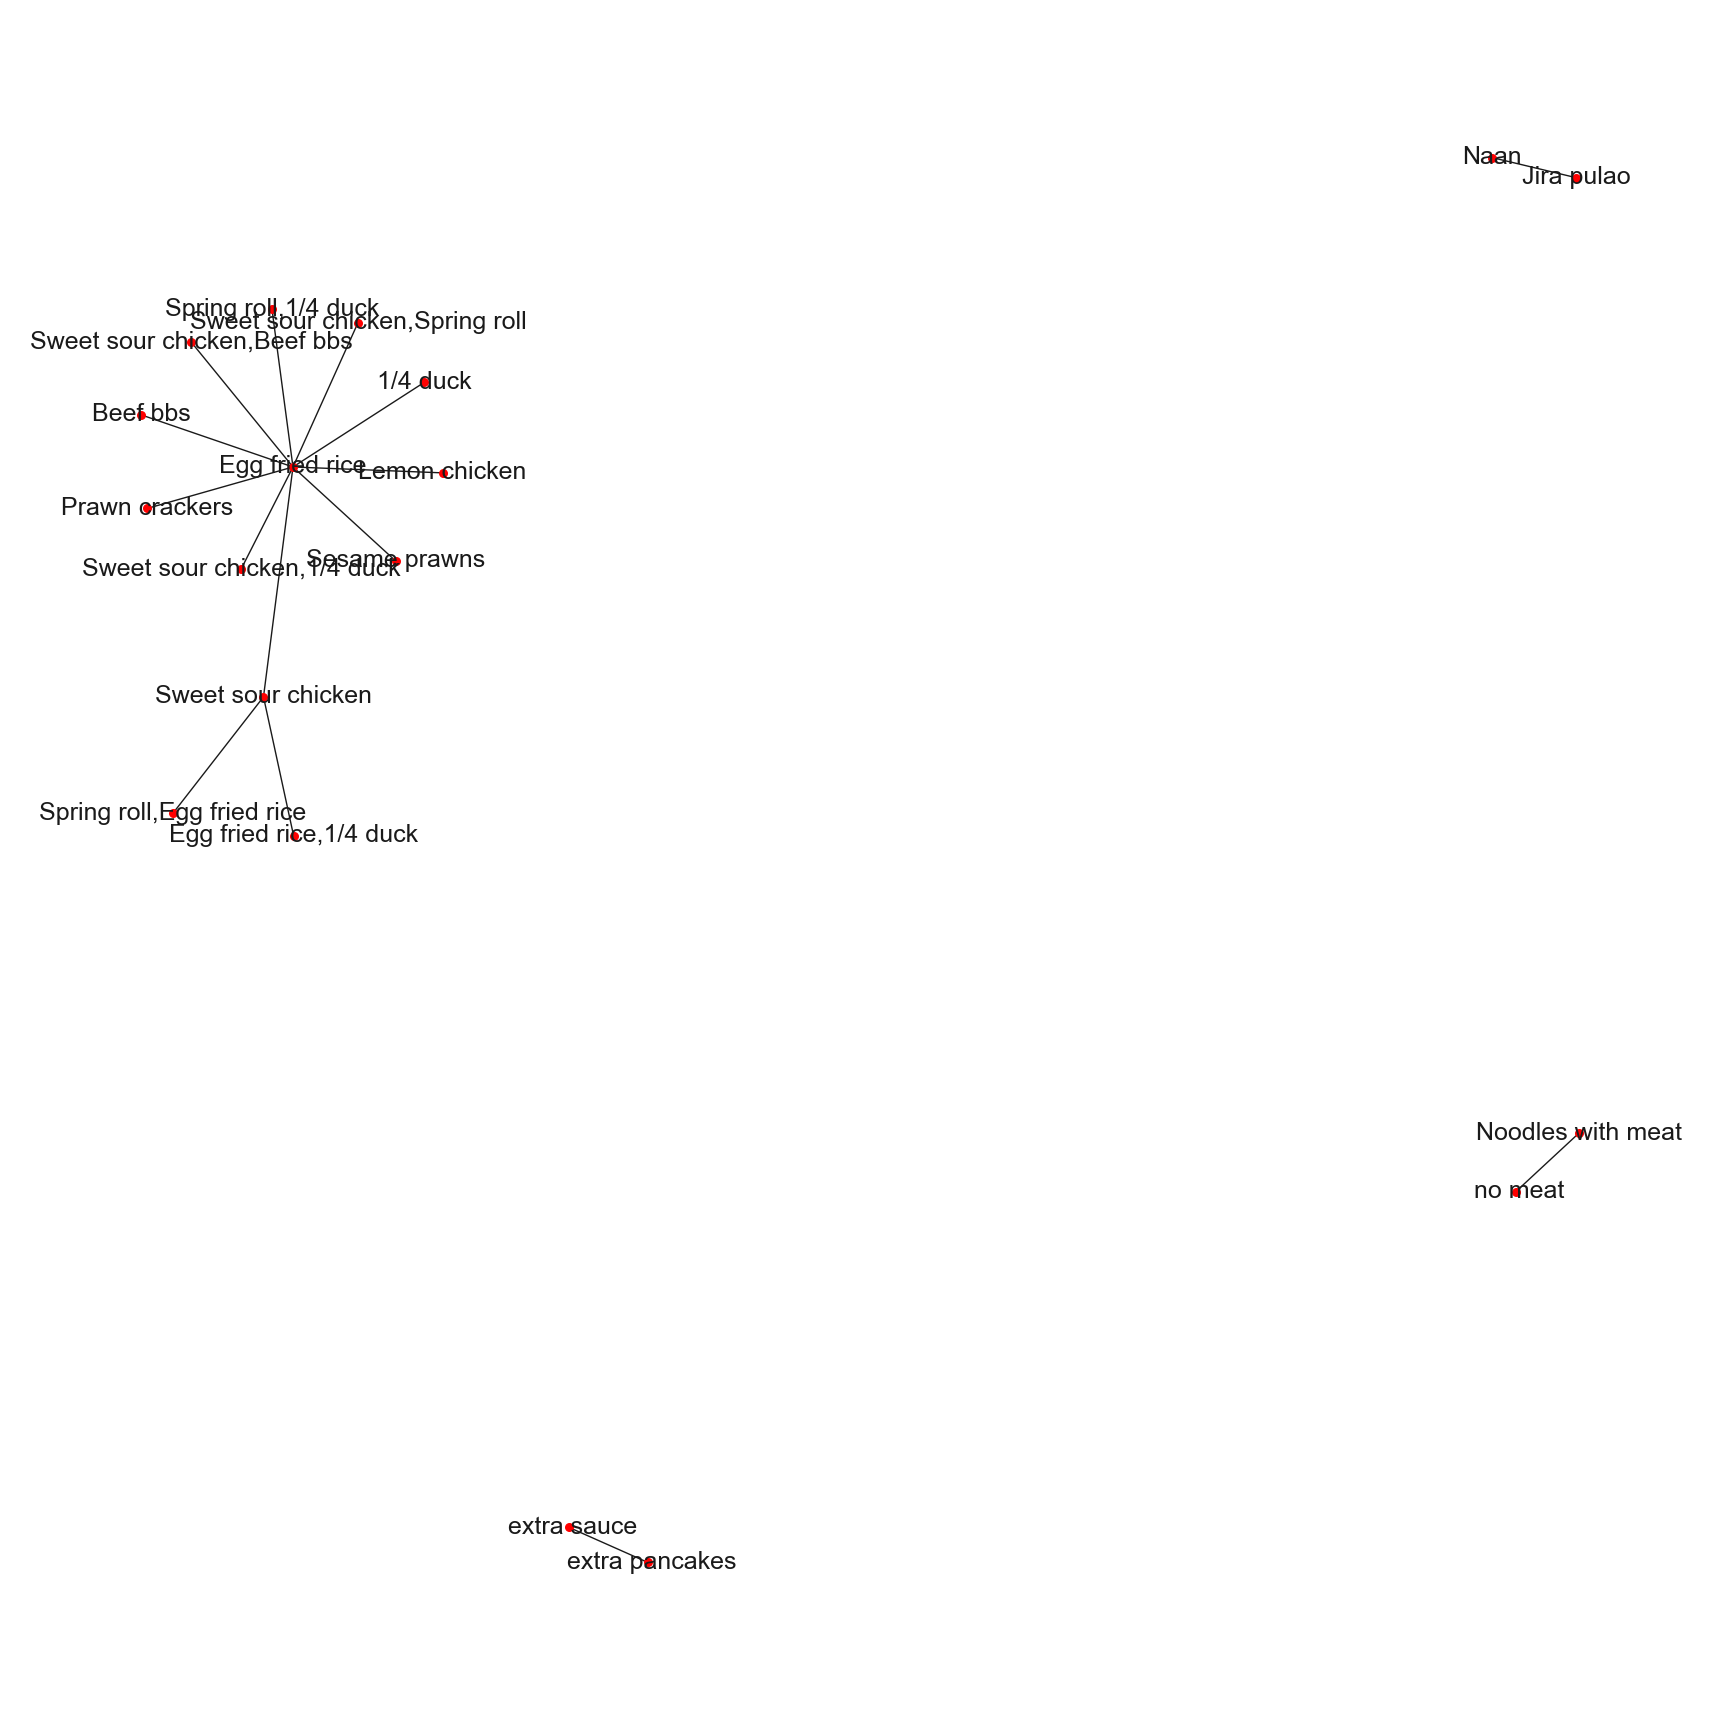

In [94]:
# First draft.
# Plot a basic network graph of the top 20 confidence rules

# Create a copy of the rules and transform the frozensets to strings
rulesToPlot_delivery = rules_confidence_delivery.copy(deep=True)
rulesToPlot_delivery['LHS'] = [','.join(list(x)) for x in rulesToPlot_delivery['antecedents']]
rulesToPlot_delivery['RHS'] = [','.join(list(x)) for x in rulesToPlot_delivery['consequents']]

# Remove duplicate if reversed rules
rulesToPlot_delivery['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot_delivery.LHS, rulesToPlot_delivery.RHS)]
rulesToPlot_delivery['sortedRow'] = rulesToPlot_delivery['sortedRow'].astype(str)
rulesToPlot_delivery.drop_duplicates(subset=['sortedRow'], inplace=True)

# Plot Graphically
rulesToPlot_delivery=rulesToPlot_delivery[:15]
fig = plt.figure(figsize=(17, 17)) 
G = nx.from_pandas_edgelist(rulesToPlot_delivery, 'LHS', 'RHS')
np.random.seed(1000)
nx.draw(G, with_labels=True, 
        node_size=30, 
        node_color="red", 
        font_size = 18,
        pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

- **4.4) Modelling: Deliveries**
- 4.4.2) Key Takeaways <br>
<br>
- **Most frequent consequents:** Sweet Sour Chicken and Egg Fried Rice.
- All the dots that are closer to each of these "centers", are the most usual antecedents.
- The closer is the point, the higher is the confidence level.
- There are three smaller groups, not linked with the main ones above referred which means that this products are not usually ordered along with the remaning clusters of products.

- **4.5) Modelling: Dinne-Inns Excluding Water**
- 4.5.1) Overall DataSet: Defining and Exploring some metrics as support, confidence and lift.

**Defining a threshold of 10% for support** <br>
**Defining a threshold of 50% for confidence** <br>
**Defining a threshold of 0 for lift (to analyze possible substitute products)** <br>

In [95]:
# DINNE INNS EXCLUDING WATER
frequent_itemsets_dinne_in_no_water = apriori(df_pt_dinne_in_no_water, min_support=0.05, use_colnames=True) 

# Defining Support
rules_support_dinne_in_no_water = association_rules(frequent_itemsets_dinne_in_no_water, metric="support", min_threshold=0.10) 
rules_support_dinne_in_no_water.sort_values(by='support', ascending=False, inplace=True) 
print(rules_support_dinne_in_no_water.head(3))

# Defining Confidence
rules_confidence_dinne_in_no_water = association_rules(frequent_itemsets_dinne_in_no_water, metric="confidence", min_threshold=0.50) 
rules_confidence_dinne_in_no_water.sort_values(by='confidence', ascending=False, inplace=True) 
print(rules_confidence_dinne_in_no_water.head(3))
 
# Defining Lift
rules_lift_dinne_in_no_water = association_rules(frequent_itemsets_dinne_in_no_water, metric="lift", min_threshold=0)  
rules_lift_dinne_in_no_water.sort_values(by='lift', ascending=False, inplace=True) 
rules_lift_dinne_in_no_water.head(3) 

         antecedents           consequents  antecedent support  \
14     (Spring roll)      (Egg fried rice)            0.357006   
15  (Egg fried rice)         (Spring roll)            0.390764   
17  (Egg fried rice)  (Sweet sour chicken)            0.390764   

    consequent support   support  confidence      lift  leverage  conviction  
14            0.390764  0.222452    0.623104  1.594578  0.082947    1.616457  
15            0.357006  0.222452    0.569275  1.594578  0.082947    1.492816  
17            0.308758  0.218631    0.559495  1.812082  0.097979    1.569203  
                                antecedents          consequents  \
35                     (Beef bbs,  no meat)  (Noodles with meat)   
52  (Toffee banana complementary,  no meat)  (Noodles with meat)   
2                                ( no meat)  (Noodles with meat)   

    antecedent support  consequent support   support  confidence      lift  \
35            0.052707            0.183758  0.052707         1.0  5.

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



antecedents                       consequents  \
304        (Egg fried rice,  no meat)  (Spring roll, Noodles with meat)   
301  (Spring roll, Noodles with meat)        (Egg fried rice,  no meat)   
127                        ( no meat)  (Spring roll, Noodles with meat)   

     antecedent support  consequent support   support  confidence      lift  \
304            0.077707            0.115605  0.055573    0.715164  6.186267   
301            0.115605            0.077707  0.055573    0.480716  6.186267   
127            0.123885            0.115605  0.087102    0.703085  6.081781   

     leverage  conviction  
304   0.04659    3.104926  
301   0.04659    1.776087  
127   0.07278    2.978611

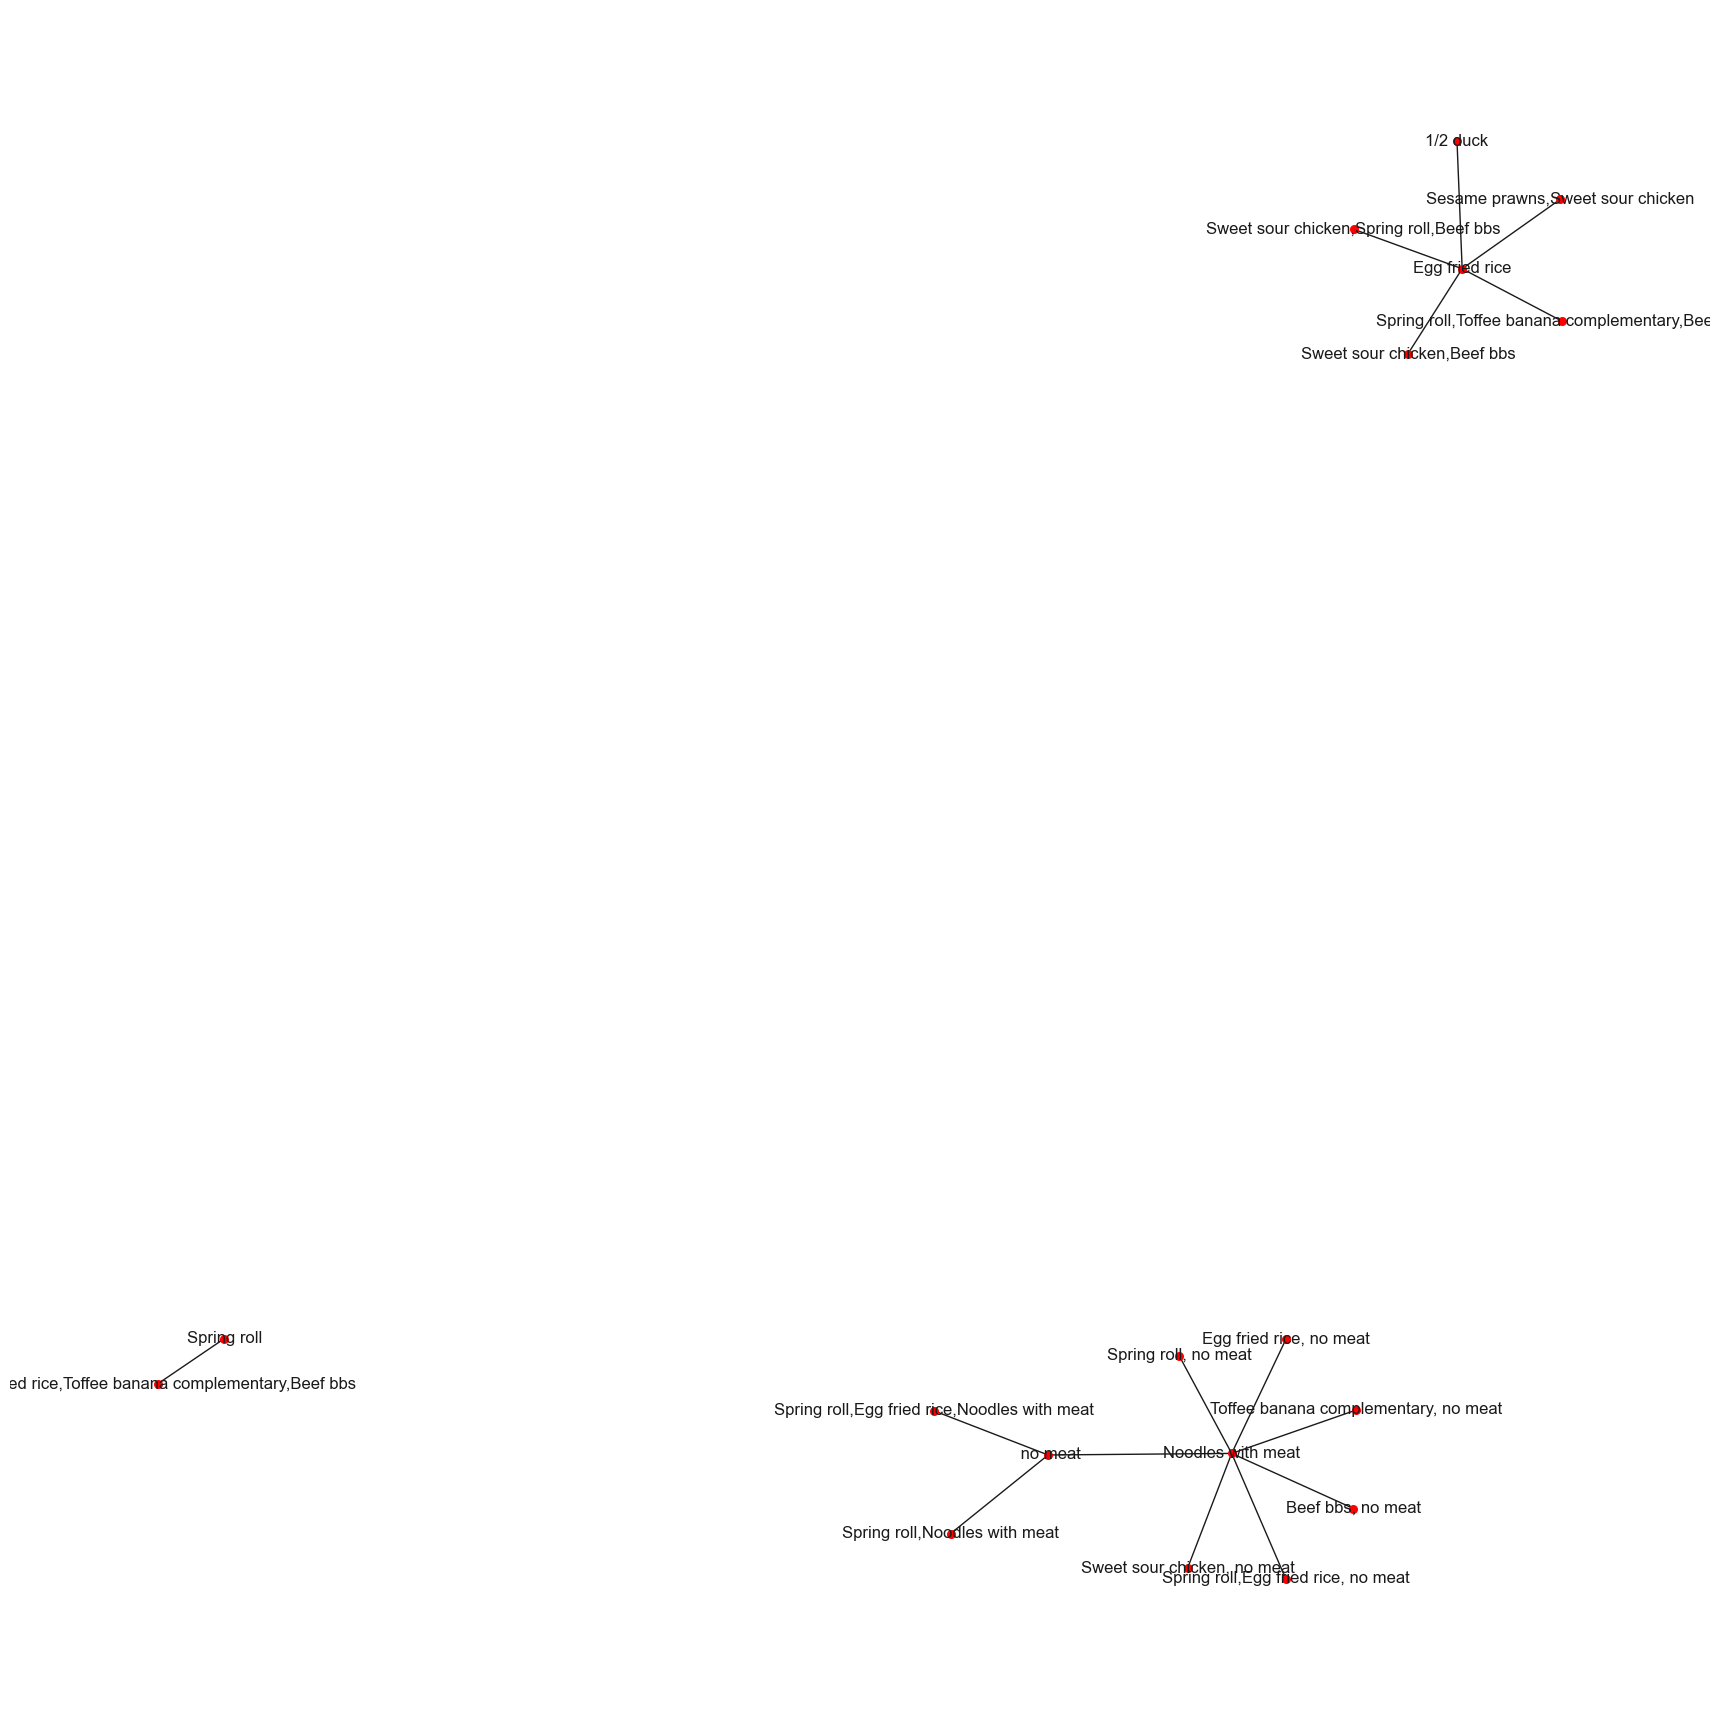

In [96]:
# First draft.
# Plot a basic network graph of the top 15 confidence rules

# Create a copy of the rules and transform the frozensets to strings
rulesToPlot_dinne_in_no_water = rules_confidence_dinne_in_no_water.copy(deep=True)
rulesToPlot_dinne_in_no_water['LHS'] = [','.join(list(x)) for x in rulesToPlot_dinne_in_no_water['antecedents']]
rulesToPlot_dinne_in_no_water['RHS'] = [','.join(list(x)) for x in rulesToPlot_dinne_in_no_water['consequents']]

# Remove duplicate if reversed rules
rulesToPlot_dinne_in_no_water['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot_dinne_in_no_water.LHS, rulesToPlot_dinne_in_no_water.RHS)]
rulesToPlot_dinne_in_no_water['sortedRow'] = rulesToPlot_dinne_in_no_water['sortedRow'].astype(str)
rulesToPlot_dinne_in_no_water.drop_duplicates(subset=['sortedRow'], inplace=True)

# Plot Graphically
rulesToPlot_dinne_in_no_water=rulesToPlot_dinne_in_no_water[:15]
fig = plt.figure(figsize=(17, 17)) 
G = nx.from_pandas_edgelist(rulesToPlot_dinne_in_no_water, 'LHS', 'RHS')
np.random.seed(1000)
nx.draw(G, with_labels=True, 
        node_size=30, 
        node_color="red", 
        pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

- **4.5) Modelling: Dinne-Inns Excluding Water**
- 4.5.2) Key Takeaways<br>
<br>
- **Most frequent consequents:** Egg Fried Rice, Spring Roll and No Meat.
- All the dots that are closer to each of these "centers", are the most usual antecedents.
- The closer is the point, the higher is the confidence level.
- We can also observe that Toffe Banana Complementary and Beef BBS are an antececedent to both the consequence above mentioned.
- For example when compared with the dataset **WITH WATER**, we can understand here the relevance of Egg fried rice.

- **4.6) Modelling: By Family**
- 4.6.1) Overall DataSet: Defining and Exploring some metrics as support, confidence and lift.

**Defining a threshold of 20% for support (since the granularity is bigger, the support is also higher, so we also increased the support threshold)** <br>
**Defining a threshold of 50% for confidence** <br>
**Defining a threshold of 0 for lift (to analyze possible substitute products)** <br>

In [97]:
# DINNE INNS EXCLUDING WATER
frequent_itemsets_family = apriori(df_pt_family, min_support=0.05, use_colnames=True) 

# Defining Support
rules_support_family = association_rules(frequent_itemsets_family, metric="support", min_threshold=0.20) 
rules_support_family.sort_values(by='support', ascending=False, inplace=True) 
print(rules_support_family.head(3))

# Defining Confidence
rules_confidence_family = association_rules(frequent_itemsets_family, metric="confidence", min_threshold=0.50) 
rules_confidence_family.sort_values(by='confidence', ascending=False, inplace=True) 
print(rules_confidence_family.head(3))
 
# Defining Lift
rules_lift_family = association_rules(frequent_itemsets_family, metric="lift", min_threshold=0)  
rules_lift_family.sort_values(by='lift', ascending=False, inplace=True) 
rules_lift_family.head(5) 

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



   antecedents consequents  antecedent support  consequent support   support  \
21  (Starters)      (Rice)            0.631646            0.677735  0.567774   
20      (Rice)  (Starters)            0.677735            0.631646  0.567774   
12      (Rice)      (Meat)            0.677735            0.537198  0.512339   

    confidence      lift  leverage  conviction  
21    0.898880  1.326299  0.139685    3.186940  
20    0.837751  1.326299  0.139685    2.270302  
12    0.755957  1.407222  0.148261    1.896395  
                         antecedents consequents  antecedent support  \
369            (Holds, Meat, Drinks)      (Rice)            0.064417   
702  (Holds, Meat, Drinks, Starters)      (Rice)            0.059880   
112                  (Holds, Drinks)      (Rice)            0.073943   

     consequent support   support  confidence      lift  leverage  conviction  
369            0.677735  0.064417         1.0  1.475502  0.020759         inf  
702            0.677735  0.059880 

antecedents             consequents  antecedent support  \
532              (Rice ind)   (Start ind, Main ind)            0.120123   
529   (Start ind, Main ind)              (Rice ind)            0.071403   
155              (Rice ind)  (Breads ind, Main ind)            0.120123   
150  (Breads ind, Main ind)              (Rice ind)            0.104609   
153            (Breads ind)    (Rice ind, Main ind)            0.130103   

     consequent support   support  confidence      lift  leverage  conviction  
532            0.071403  0.052713    0.438822  6.145735  0.044136    1.654728  
529            0.120123  0.052713    0.738247  6.145735  0.044136    3.361470  
155            0.104609  0.072219    0.601208  5.747198  0.059653    2.245261  
150            0.120123  0.072219    0.690373  5.747198  0.059653    2.841730  
153            0.106151  0.072219    0.555091  5.229239  0.058409    2.009058

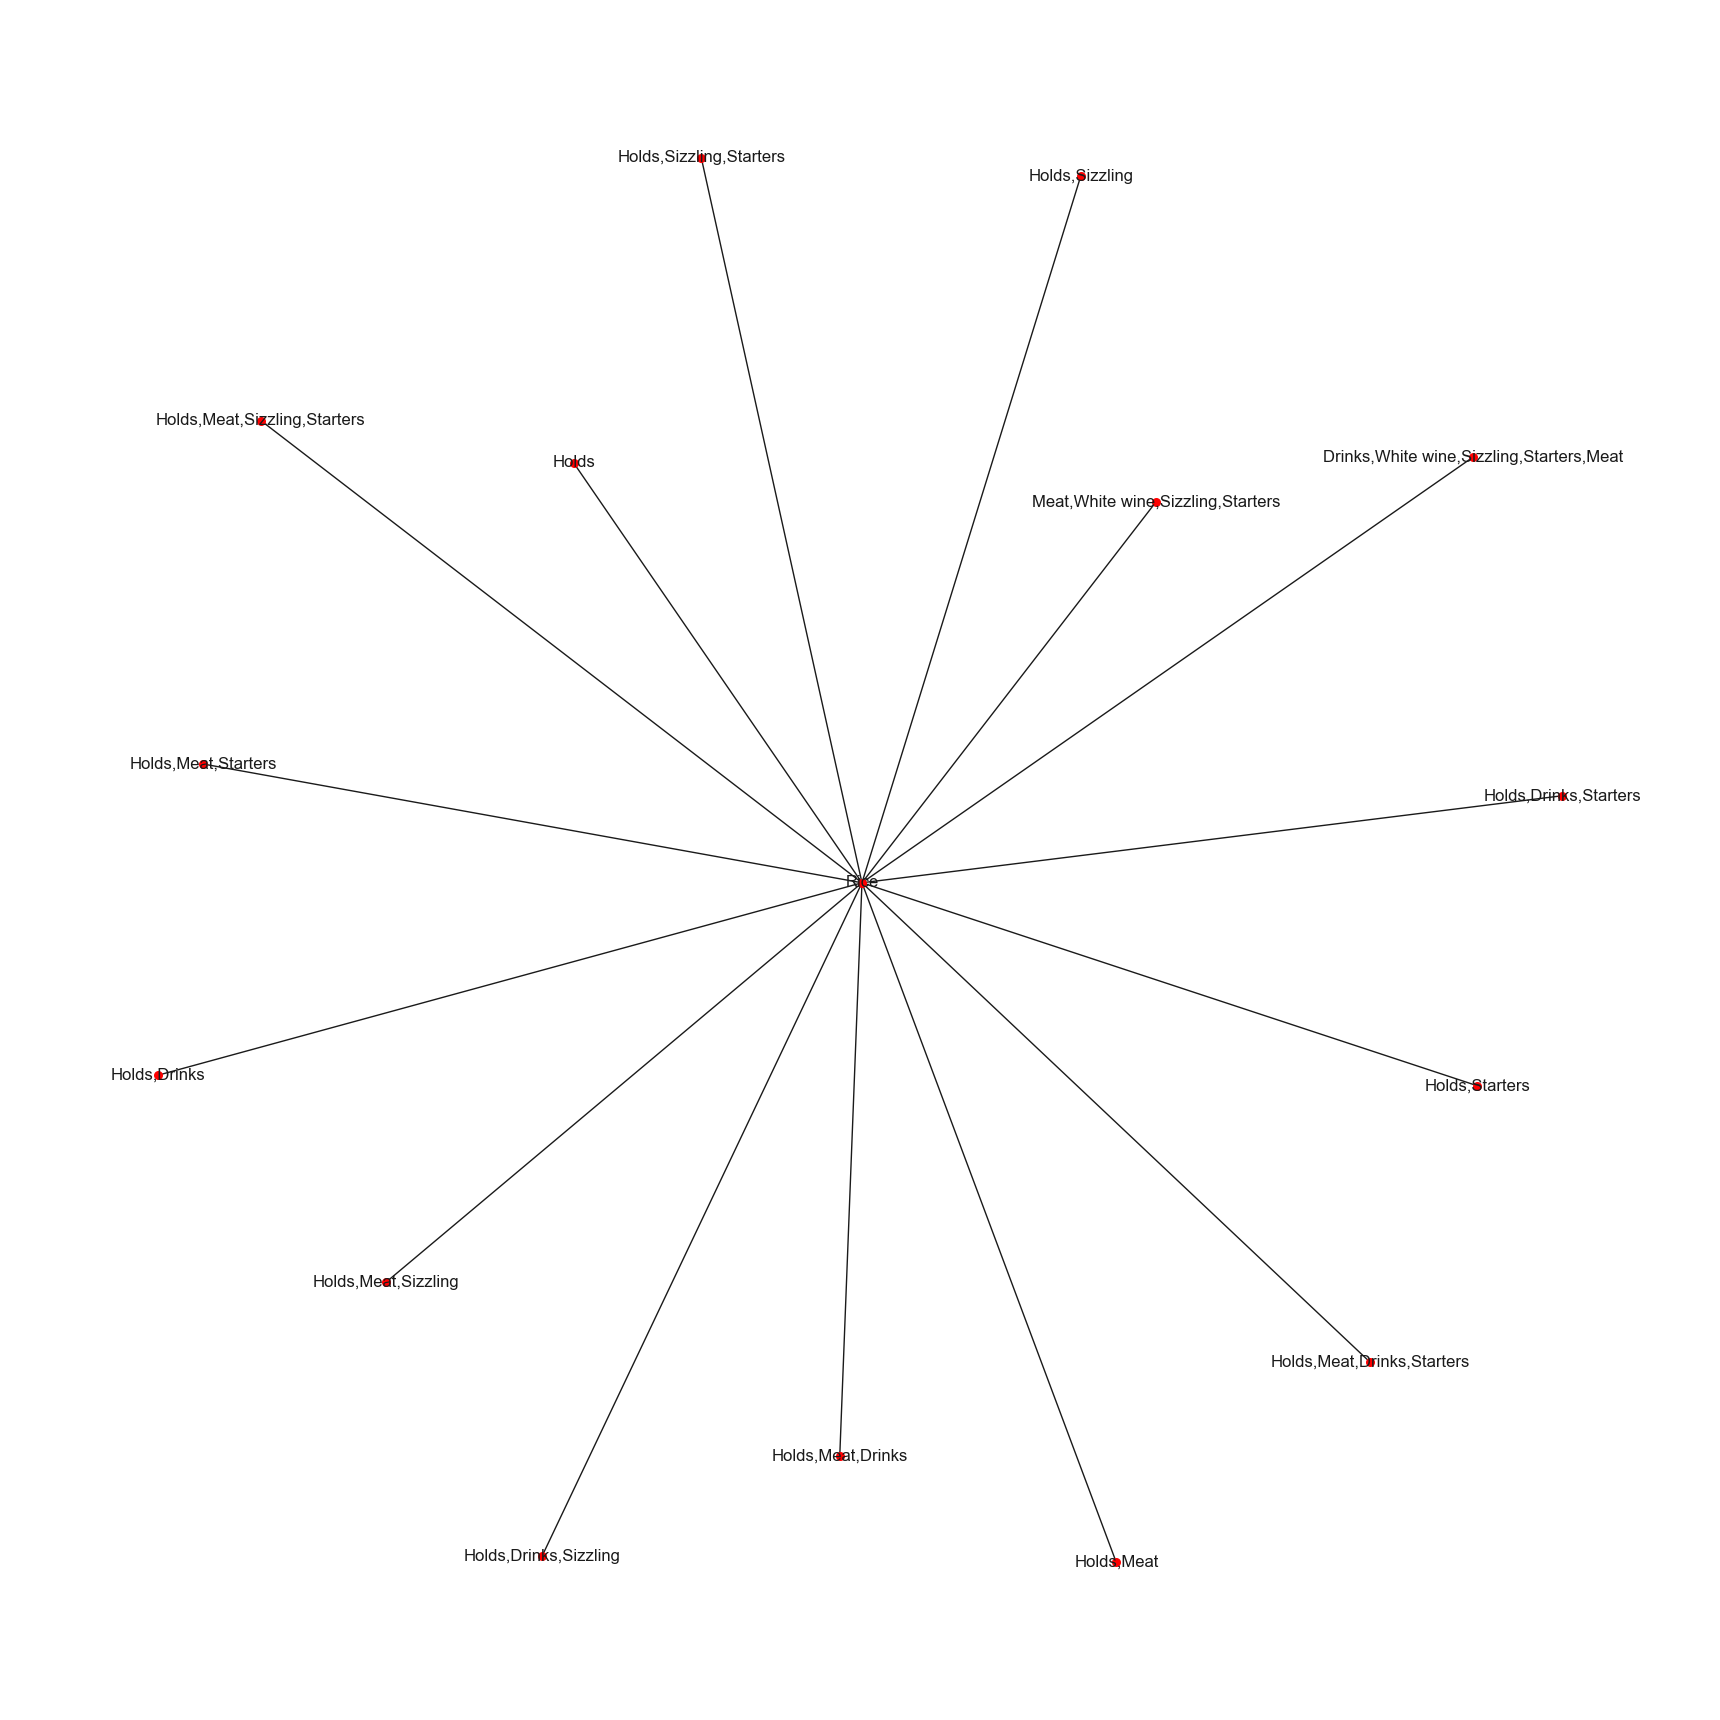

In [98]:
# First draft.
# Plot a basic network graph of the top 15 confidence rules

# Create a copy of the rules and transform the frozensets to strings
rulesToPlot_family = rules_confidence_family.copy(deep=True)
rulesToPlot_family['LHS'] = [','.join(list(x)) for x in rulesToPlot_family['antecedents']]
rulesToPlot_family['RHS'] = [','.join(list(x)) for x in rulesToPlot_family['consequents']]

# Remove duplicate if reversed rules
rulesToPlot_family['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot_family.LHS, rulesToPlot_family.RHS)]
rulesToPlot_family['sortedRow'] = rulesToPlot_family['sortedRow'].astype(str)
rulesToPlot_family.drop_duplicates(subset=['sortedRow'], inplace=True)

# Plot Graphically
rulesToPlot_family=rulesToPlot_family[:15]
fig = plt.figure(figsize=(17, 17)) 
G = nx.from_pandas_edgelist(rulesToPlot_family, 'LHS', 'RHS')
np.random.seed(1000)
nx.draw(G, with_labels=True, 
        node_size=30, 
        node_color="red", 
        pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

- **4.6) Modelling: By Family**
- 4.6.2) Key Takeaways<br>
<br>
- **Most frequent consequents:** Rice.
- All the dots that are closer to each of these "centers", are the most usual antecedents.
- The closer is the point, the higher is the confidence level.
- The two closest antecedents are: {Holds, Sizzling and Drinks} and {White Wine, Sizzling, Meat and Starters}.
- In the end, we decided do not take into account this results in our final recommendations, since we believe that products provide us a much more detailed explanation of costumers behaviors.

- **4.7) Menus Suggestions**
- 4.7.1) Menus for Dinne-Inns

- **Itemset:** "list of all the items in the antecedent and the consequent".
- **Support:** "the fraction of the total number of transactions in which the itemset occurs (%)". 
- **Antecedent Support:** represents the frequency of the antecedent itemset in the dataset (%).
- **Consequent Support:** represents the frequency of the consequent itemset in the dataset (%).
- **Confidence:** "the conditional probability of occurrence of consequent given the antecedent (%)".
- **Lift:** "the conditional probability of occurrence of consequent given the antecedent".

In [99]:
# Measuring the quantity of products per set.

frequent_itemsets_dinne_in_no_water['products_per_set'] = frequent_itemsets_dinne_in_no_water['itemsets'].apply(lambda x: len(x))


# Checking the results for a 'products_per_set' = 2 and a Support >= 0.1.

# Reminding, a support repreents the percentage of transactions in the entire dataset that contain a particular itemset. 
# In this case, we aim to filter all the itemsets that represents at least 10% of the total transactions.

frequent_itemsets_dinne_in_no_water[(frequent_itemsets_dinne_in_no_water['products_per_set'] == 2) & 
                                    (frequent_itemsets_dinne_in_no_water['support'] >= 0.17)]

support                              itemsets  products_per_set
68  0.222452         (Spring roll, Egg fried rice)                 2
69  0.218631  (Sweet sour chicken, Egg fried rice)                 2
82  0.179299     (Sweet sour chicken, Spring roll)                 2

In [100]:
# Itemsets with both high 'Confidence' and high 'Support'.
# This indicates that many customers purchase A and B together, 
# and customers who purchase A are highly likely to also purchase B.
# Together, a high support and high confidence for an association rule indicate that 
# the antecedent and consequent occur together frequently, 
# and that when the antecedent occurs, the consequent is highly likely to occur as well.

rules_support_dinne_in_no_water[(rules_support_dinne_in_no_water['confidence'] >= 0.60) &
                                   (rules_support_dinne_in_no_water['support'] >= 0.20)
                                  ]

antecedents       consequents  antecedent support  \
14         (Spring roll)  (Egg fried rice)            0.357006   
16  (Sweet sour chicken)  (Egg fried rice)            0.308758   

    consequent support   support  confidence      lift  leverage  conviction  
14            0.390764  0.222452    0.623104  1.594578  0.082947    1.616457  
16            0.390764  0.218631    0.708097  1.812082  0.097979    2.087117

In [101]:
rules_support_dinne_in[(rules_support_dinne_in['confidence'] >= 0.90) &
                                   (rules_support_dinne_in['support'] >= 0.20)
                                  ]

antecedents            consequents  \
24                       (Egg fried rice)  (Mineral water 1.5lt)   
42                          (Spring roll)  (Mineral water 1.5lt)   
48          (Toffee banana complementary)  (Mineral water 1.5lt)   
46                   (Sweet sour chicken)  (Mineral water 1.5lt)   
21                         (Buffet sushi)  (Mineral water 1.5lt)   
106         (Spring roll, Egg fried rice)  (Mineral water 1.5lt)   
112  (Sweet sour chicken, Egg fried rice)  (Mineral water 1.5lt)   
15                             (Beef bbs)  (Mineral water 1.5lt)   

     antecedent support  consequent support   support  confidence      lift  \
24             0.390702            0.906544  0.368253    0.942543  1.039710   
42             0.356950            0.906544  0.336252    0.942016  1.039129   
48             0.315714            0.906544  0.293743    0.930408  1.026325   
46             0.308709            0.906544  0.288808    0.935534  1.031979   
21             0.228626            0.906544  0.213342    0.933148  1.029347   
106            0.222417            0.906544  0.212387    0.954903  1.053345   
112            0.218596            0.906544  0.205541    0.940277  1.037211   
15             0.215889            0.906544  0.204108    0.945428  1.042893   

     leverage  conviction  
24   0.014065    1.626540  
42   0.012662    1.611764  
48   0.007534    1.342929  
46   0.008950    1.449697  
21   0.006082    1.397953  
106  0.010756    2.072360  
112  0.007374    1.564826  
15   0.008395    1.712526

In [102]:
# Itemsets with both high 'Confidence' and high 'Lift'.

rules_confidence_dinne_in_no_water[(rules_confidence_dinne_in_no_water['lift'] >= 2.5) & 
                                   (rules_confidence_dinne_in_no_water['confidence'] >= 0.6)
                                  ]

antecedents  \
35                               (Beef bbs,  no meat)   
52            (Toffee banana complementary,  no meat)   
2                                          ( no meat)   
38                         (Egg fried rice,  no meat)   
44                            (Spring roll,  no meat)   
48                     (Sweet sour chicken,  no meat)   
96            (Spring roll, Egg fried rice,  no meat)   
43                   (Spring roll, Noodles with meat)   
95   (Spring roll, Egg fried rice, Noodles with meat)   
51   (Toffee banana complementary, Noodles with meat)   
100                        (Egg fried rice,  no meat)   
46                                         ( no meat)   
36                      (Noodles with meat, Beef bbs)   
25                                       (Jira pulao)   
37                (Egg fried rice, Noodles with meat)   
1                                 (Noodles with meat)   
47            (Sweet sour chicken, Noodles with meat)   
99                            (Spring roll,  no meat)   
40                                         ( no meat)   
26                                             (Naan)   
16                               (Chick tikka masala)   

                             consequents  antecedent support  \
35                   (Noodles with meat)            0.052707   
52                   (Noodles with meat)            0.056847   
2                    (Noodles with meat)            0.123885   
38                   (Noodles with meat)            0.077707   
44                   (Noodles with meat)            0.087102   
48                   (Noodles with meat)            0.064968   
96                   (Noodles with meat)            0.055573   
43                            ( no meat)            0.115605   
95                            ( no meat)            0.074682   
51                            ( no meat)            0.077707   
100     (Spring roll, Noodles with meat)            0.077707   
46      (Spring roll, Noodles with meat)            0.123885   
36                            ( no meat)            0.075159   
25                                (Naan)            0.105414   
37                            ( no meat)            0.112580   
1                             ( no meat)            0.183758   
47                            ( no meat)            0.096497   
99   (Egg fried rice, Noodles with meat)            0.087102   
40   (Egg fried rice, Noodles with meat)            0.123885   
26                          (Jira pulao)            0.117834   
16                                (Naan)            0.090924   

     consequent support   support  confidence      lift  leverage  conviction  
35             0.183758  0.052707    1.000000  5.441941  0.043022         inf  
52             0.183758  0.056847    1.000000  5.441941  0.046401         inf  
2              0.183758  0.123885    1.000000  5.441941  0.101120         inf  
38             0.183758  0.077707    1.000000  5.441941  0.063428         inf  
44             0.183758  0.087102    1.000000  5.441941  0.071096         inf  
48             0.183758  0.064968    1.000000  5.441941  0.053030         inf  
96             0.183758  0.055573    1.000000  5.441941  0.045361         inf  
43             0.123885  0.087102    0.753444  6.081781  0.072780    3.553404  
95             0.123885  0.055573    0.744136  6.006654  0.046321    3.424148  
51             0.123885  0.056847    0.731557  5.905116  0.047220    3.263694  
100            0.115605  0.055573    0.715164  6.186267  0.046590    3.104926  
46             0.115605  0.087102    0.703085  6.081781  0.072780    2.978611  
36             0.123885  0.052707    0.701271  5.660647  0.043396    2.932809  
25             0.117834  0.073567    0.697885  5.922593  0.061145    2.919968  
37             0.123885  0.077707    0.690240  5.571607  0.063760    2.828370  
1              0.123885  0.123885    0.674177  5.441941  0.101120    2.688926  
47             0.1

In [103]:
# Here we are assessing if there are products that customers tend not to buy together, 
# once they bought one of them.
# As we can see below, there are no substitute products in Dinne - Inn.

rules_lift_dinne_in_no_water[rules_lift_dinne_in_no_water.lift<=1]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

**Relationships analysis | Suggestions for Dinne - Inns**
<br>
-  **Substitute Products:** there are no substitute products (since there is no negative lift), which means that we do not suggest any product deletion from the menu.  
-  **Creation of new products:** We suggest the creation of a new product of Noodles without meat. If there is a confidence of 100%, it means that when people order **"No Meat"**, they also order **"Noodles with meat"**, which makes sense. However, if we see the other way around, we check that 67% of the times, if the costumer order **"Noodles with meat"**, also order **"No meat"**, which is very relevant. Additionally, a lift of ~5.4, which means that the possibility of order **Noodles with meat** is 5.4 times higher than if they were independent.
-  **Creation of new menu 1:** **Spring roll** with **Egg fried rice** (support>0.2 and confidence>0.6) and with **Mineral water 1.5lt** (support>0.33 and confidence>0.94 with each of the previous refered products).
-  **Creation of new menu 2:** **Sweet sour chicken** with **Egg fried rice** (support>0.2 and confidence>0.6) and with **Mineral water 1.5lt** (support>0.28 and confidence>0.93 with each of the previous refered products).
-  **Increse Prices:** There is lift above 5 and a confidence above 0.6, on the items **Naan - Jira pulao** and **Chick tikka masala - Naan**. **Naan** is a starter, **jira pulao** is a side dish and **Chick tikka masala** a main indian dish. So, here there are two approaches we can follow: promote a discount on the the starter **Naan** and then, slightly increase the main and the side dish. Or, in case this leads to a decrease in the demand for main and side dish, we can also think about a menu 3.

<br>

**Additional Recommendations**
<br>
-  **Saturday Lunch Campaign:** We have noticed above that Sunday lunch, represents an outlier both in terms of orders volume but also in proportional to the dinner sales volume. However, we do no verify the same on Saturday. In this sense, we propose a possible campaign: if you order on Saturday Lunch before 4pm, we offer you a discount on next dinner visit.
- **Best Holidays Promotion:** The three most profitable holidays are separated by 13 days: 24.12.2018 (Christmas Eve), 31.12.2018 (New Year's Eve) and 06.01.2018 (Epiphany). We suggest the adoption of agressive marketing strategies for those specific days: first, the business hours can be slightly extended since we know that there must be high demand; second, we can create special products (for examples, a discount on the most expensive starters and desserts, since the in a special occasition, the costumers may be willing to spend more); and third, think about some partnership nearby the restaurant: festivals, cinema and massage center, for example.
- **Worst Holidays Promotion:** For the worst holidays, we suggest a campaign to attract costumers. For example: if you come on one of this holidays, you receive a 50% discount on the next visit in May or June. The holidays are the following: 1.05.2018 (Labour Day/May Day) and (28.05.2018 (Orthodox Pentecost Monday)).

- **4.7) Menus Suggestions**
- 4.7.2) Menus for Deliveries

- **Itemset:** "list of all the items in the antecedent and the consequent".
- **Support:** "the fraction of the total number of transactions in which the itemset occurs (%)". 
- **Antecedent Support:** represents the frequency of the antecedent itemset in the dataset (%).
- **Consequent Support:** represents the frequency of the consequent itemset in the dataset (%).
- **Confidence:** "the conditional probability of occurrence of consequent given the antecedent (%)".
- **Lift:** "the conditional probability of occurrence of consequent given the antecedent".

In [104]:
# Measuring the quantity of products per set.

frequent_itemsets_delivery['products_per_set'] = frequent_itemsets_delivery['itemsets'].apply(lambda x: len(x))


# Checking the results for a 'products_per_set' = 2 and a Support >= 0.1.
# Reminding, a support repreents the percentage of transactions in the entire dataset that contain a particular itemset. 
# In this case, we aim to filter all the itemsets that represents at least 10% of the total transactions.

frequent_itemsets_delivery[(frequent_itemsets_delivery['products_per_set'] == 2) & 
                                    (frequent_itemsets_delivery['support'] >= 0.1)
                                   ]

rules_support_delivery[(rules_support_delivery['support'] >= 0.2) & 
                                   (rules_support_delivery['confidence'] >= 0.50)]

antecedents           consequents  antecedent support  \
10  (Sweet sour chicken)      (Egg fried rice)            0.336216   
11      (Egg fried rice)  (Sweet sour chicken)            0.411727   

    consequent support   support  confidence      lift  leverage  conviction  
10            0.411727  0.216832    0.644918  1.566372  0.078403    1.656725  
11            0.336216  0.216832    0.526639  1.566372  0.078403    1.402280

In [105]:
# Itemsets with both high 'Confidence' and high 'Lift'.
rules_confidence_delivery[(rules_confidence_delivery['lift'] >= 1.5) & 
                                   (rules_confidence_delivery['confidence'] >= 0.5)]

antecedents           consequents  \
3                          ( no meat)   (Noodles with meat)   
1                   ( extra pancakes)        ( extra sauce)   
0                      ( extra sauce)     ( extra pancakes)   
16     (Sweet sour chicken, Beef bbs)      (Egg fried rice)   
14     (Sweet sour chicken, 1/4 duck)      (Egg fried rice)   
9                (Sweet sour chicken)      (Egg fried rice)   
17  (Sweet sour chicken, Spring roll)      (Egg fried rice)   
15         (Egg fried rice, 1/4 duck)  (Sweet sour chicken)   
11                       (Jira pulao)                (Naan)   
18      (Spring roll, Egg fried rice)  (Sweet sour chicken)   
10                   (Egg fried rice)  (Sweet sour chicken)   
2                 (Noodles with meat)            ( no meat)   

    antecedent support  consequent support   support  confidence      lift  \
3             0.062434            0.124868  0.062434    1.000000  8.008446   
1             0.085425            0.090065  0.063700    0.745679  8.279307   
0             0.090065            0.085425  0.063700    0.707260  8.279307   
16            0.074457            0.411727  0.050411    0.677054  1.644422   
14            0.105041            0.411727  0.070871    0.674699  1.638702   
9             0.336216            0.411727  0.216832    0.644918  1.566372   
17            0.146383            0.411727  0.091753    0.626801  1.522369   
15            0.127188            0.336216  0.070871    0.557214  1.657309   
11            0.098924            0.121072  0.053575    0.541578  4.473206   
18            0.173803            0.336216  0.091753    0.527913  1.570159   
10            0.411727            0.336216  0.216832    0.526639  1.566372   
2             0.124868            0.062434  0.062434    0.500000  8.008446   

    leverage  conviction  
3   0.054638         inf  
1   0.056006    3.577898  
0   0.056006    3.124188  
16  0.019755    1.821581  
14  0.027623    1.808393  
9   0.078403    1.656725  
17  0.031483    1.576298  
15  0.028108    1.499108  
11  0.041598    1.917291  
18  0.033317    1.406062  
10  0.078403    1.402280  
2   0.054638    1.875132

In [106]:
# Here we are assessing if there are products that customers tend not to buy together, 
# once they bought one of them.
# As we can see below, there are no substitute products in Deliveries

rules_lift_delivery[rules_lift_delivery.lift<=1]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

**Relationships analysis | Suggestions for Deliveries**
<br>
-  **Substitute Products:** there are no substitute products (since there is no negative lift), which means that we do not suggest any product deletion from the menu.  
-  **Creation of new products:** We suggest the creation of a new product of Noodles without meat. If there is a confidence of 100%, it means that when people order **"No Meat"**, they also order **"Noodles with meat"**, which makes sense. Additionally, a lift of ~8, which means that the possibility of order **Noodles with meat** is ~8 times higher than if they were independent.
-  **Creation of new menu 1:** **Sweet sour chicken** with **Egg fried rice** (support>0.2 and confidence>0.6).
-  **Increse Prices 1:** There is lift above 4.5 and a confidence above 0.54 on the items **Jira pulao - Naan**. **Naan** is an indian starter, **jira pulao** is an indian side dish. So, here, in opposition to what we suggested in dinne-in, there is no main dish so that we could link the products. Anyway, promote a discount on the the starter **Naan** and increase the price of the side dish could be a possibility. 
-  **Increse Prices 2:** There is lift above 8.2 and a confidence above 0.70 on the items **extra pancakes - extra sauce**, naturally. Here, we could explore a promotion on the price of additional **pancakes**, along with an increase in the **extra source** price, for example. 


**Additional Recommendations**
<br>
-  **Saturday Lunch Campaign:** We have noticed above that Sunday lunch, represents an outlier both in terms of orders volume but also in proportional to the dinner sales volume. However, we do no verify the same on Saturday. In this sense, we propose a possible campaign: if you order on Saturday Lunch before 4pm, we offer you a discount on next dinner visit.
- **Best Holidays Promotion:** The three most profitable holidays are separated by 13 days: 24.12 (Christmas Eve), 31.12 (New Year's Eve) and 06.01 (Epiphany). We suggest the adoption of agressive marketing strategies for those specific days: first, the business hours can be slightly extended since we know that there must be high demand; second, we can create special products (for examples, a discount on the most expensive starters and desserts, since the in a special occasition, the costumers may be willing to spend more); and third, think about some partnership nearby the restaurant: festivals, cinema and massage center, for example.
- **Worst Holidays Promotion:** For the worst holidays, we suggest a campaign to attract costumers. For example: if you come on one of this holidays, you receive a 50% discount on the next visit in May or June. The holidays are the following: 1 of May (Labour Day/May Day) and 28 of May (Orthodox Pentecost Monday).

# **5. Deployment**


- **5.1) Final Recommendation System for Dinne-Inns**
- **5.2) Final Recommendation System for Deliveries**

- **5.1) Final Recommendation System for Dinne-Inns**

In [107]:
# Define the order as a dinner in case the invoice was issued after 6pm.
df["Dinner_meal"] = [0 if x.hour < 18 else 1 for x in df.InvoiceDateHour]

# Creating the bins for the number of people per order.
df["People_agg"] = ["1" if i == 1 else 
                    "2" if i == 2 else 
                    "3" if i == 3 else 
                    "4-5" if i <= 5 else 
                    "5-10" if i <= 10 else 
                    "10+" for i in df.Pax ]

# Check sizes of customer segments
df_dinne_inns = df[df.IsDelivery == 0]
ct = pd.crosstab(index=[df_dinne_inns.People_agg],
                 columns=[df_dinne_inns.Dinner_meal, df_dinne_inns.Holiday])

# Sort by People_agg
ct_sorted = ct.sort_index(level=0)
ct_sorted

Dinner_meal     0           1     
Holiday         0    1      0    1
People_agg                        
1              67    9    359    4
10+           458   63   1410  144
2             913   55  13323  305
3            1011   81   5602  149
4-5          1856  139  14902  301
5-10         1813  204   9361  332

In [108]:
# Auxiliar functions:
    # 1. df_people
    # 2. df_products_alphabetically
    # 3. df_rules

    
# 1.This function returns the transactions dataset filtered by the following variables: 
    # 'Deliveries', 
    # 'People_agg'
    # 'Dinner_meal'.
    # 'Holidays'
def df_people(People_agg):
    
    # 1.1 Obtain the bins for people category.
    if People_agg <= 1: 
        People = "1"
    elif People_agg <=2:
        People = "2"
    elif People_agg <= 5:
        People = "3-5"
    elif People_agg <= 10:
        People = "5-10"
    else:
        People = "10+"
        
    # 1.2 Get current time and check if dinner.
    dinner = 1                      # By default, we are assuming that the meal is a dinner, since the majority of the meals are dinner.
    if dt.datetime.now().hour < 18: # By previously looking at the plots, we have defined this as our threshold.
        dinner = 0 
        
    # 1.3 Get current date and check if holiday
    holiday_day = 0
    if len(df[(df.Holiday == 1) & (df.month == dt.datetime.now().month) & (df.day == dt.datetime.now().day)]) != 0:
        holiday_day = 1
    
    # 1.4 Making our final filter, storing in a new variable, called df_finne_inns. 
    df_dinne_inns = df[(df.IsDelivery == 0) & 
                       (df.Dinner_meal == dinner) & 
                       (df.Holiday == holiday_day) &
                       (df.People_agg == People)].copy(deep=True)
    return df_dinne_inns


# 2. This function returns a list of alphabetically sorted strings with all possible itemset combinations
def df_productset_alphabetically(products):
    
     # Get all possible combinations as a list of tuples.
    product_sets = []
    for i in range(1,len(products) + 1):
        for i in itertools.combinations(products, i):
            product_sets.append(i)

    # Transform tuples into list of strings, sort the list alphabetically and create string out of sorted list .
    productslists = [list(x) for x in product_sets]
    for i in productslists:
        i.sort()
    productsstrings = [" ".join(x) for x in productslists]
    return productsstrings


# 3. This functions returns a dataframe with rules, based on the df returned by filter_df(pax)
def df_rules(People_agg, support_min, confidence_min):
    
    # Create frequent itemset of filtered df
    df_dinne_inn = pd.pivot_table(df_people(People_agg)[["DocNumber","ProductDesignation"]], 
                            index='DocNumber', 
                            columns='ProductDesignation', 
                            aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0) 
    frequent_itemsets_df_dinne_inn = apriori(df_dinne_inn, min_support=support_min, use_colnames=True) 
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_min)
    
    # Remove duplicate if reversed rules
    rules['LHS'] = [','.join(list(x)) for x in rules['antecedents']]
    rules['RHS'] = [','.join(list(x)) for x in rules['consequents']]
    rules['sortedRow'] = [sorted([a,b]) for a,b in zip(rules.LHS, rules.RHS)]
    rules['sortedRow'] = rules['sortedRow'].astype(str)
    rules.drop_duplicates(subset=['sortedRow'], inplace=True)

    # Transform antecedents and consequents into list of strings, sort the list alphabetically and create string out of sorted list 
    rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x))
    rules["consequents"] = rules["consequents"].apply(lambda x: list(x))

    for i in rules.index.values:
        rules.loc[i,"antecedents"].sort()
        rules.loc[i,"consequents"].sort()

    rules["antecedents"] = rules["antecedents"].apply(lambda x: " ".join(x))
    rules["consequents"] = rules["consequents"].apply(lambda x: " ".join(x))

    # Remove space in the beginning of antecedents and consequents
    rules["antecedents"] = rules["antecedents"].apply(lambda x: x[1:] if x[0] == " " else x)
    rules["consequents"] = rules["consequents"].apply(lambda x: x[1:] if x[0] == " " else x)
    
    return rules

In [109]:
# Get recommended products 
# Based on number of persons and ordered items, return maximum 7 itemsets with the highest lift

def final_recommendation_dinne_inn(People_agg, products, support_min=0.05, confidence_min=0.15, lift_min=1.1):
    productsstrings = df_productset_alphabetically(products)
    rules = df_rules(People_agg, support_min, confidence_min)
    
    # Filter possible recommendations
    suggestions = rules[rules.antecedents.isin(productsstrings)]
    
    # Sort by lift and select relevant information of top ten
    best_seven = suggestions.sort_values("lift", ascending=False)[:7][["antecedents", "consequents", 
                                                                   "support", "confidence", "lift"]]
    
    # Only consider rules with certain lift 
    best_seven = best_seven[best_seven.lift >= lift_min]
    
    return best_seven

In [110]:
# Example: 
    # Two costumers that orders "Mineral water 1.5lt": 
        # "What are the main suggestions under our model?"

final_recommendation_dinne_inn(2, ["Mineral water 1.5lt"])

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



antecedents   consequents   support  confidence      lift
41  Mineral water 1.5lt  Buffet sushi  0.121575    0.235005  1.803780
31  Mineral water 1.5lt      Beef bbs  0.116404    0.225009  1.116133

- **5.2) Final Recommendation System for Deliveries**

In [111]:
# Define the order as a dinner in case the invoice was issued after 6pm.
df["Dinner_meal"] = [0 if x.hour < 18 else 1 for x in df.InvoiceDateHour]

# Check sizes of customer segments
df_deliveries = df[df.IsDelivery == 1]
pd.crosstab(df_deliveries.CustomerCity,[df_deliveries.Dinner_meal, df_deliveries.Holiday])
# Sort by People_agg
ct_sorted_deliveries = ct.sort_index(level=0)
ct_sorted_deliveries

Dinner_meal     0           1     
Holiday         0    1      0    1
People_agg                        
1              67    9    359    4
10+           458   63   1410  144
2             913   55  13323  305
3            1011   81   5602  149
4-5          1856  139  14902  301
5-10         1813  204   9361  332

In [112]:
# Auxiliar functions:
    # 1. df_city_delivery
    # 2. df_products_alphabetically_delivery
    # 3. df_rules_delivery

# 1.This function returns the transactions dataseet filtered by:
    # Only Delivery customers
    # Corresponding city
    # Whether is Holiday or not
    # Whether is Dinner or not
def df_city_delivery(city):
    # Get current time and check if dinner
    dinner_meal = 1
    if dt.datetime.now().hour < 18:
        dinner_meal = 0
        
    # Get current date and check if holiday
    holiday_day = 0
    if len(df[(df.Holiday == 1) & (df.month == dt.datetime.now().month) & (df.day == dt.datetime.now().day)]) != 0:
        holiday_day = 1
    
    # Filter dataset 
    df_deliveries_1 = df[(df.IsDelivery == 1) & 
                         (df.Dinner_meal == dinner_meal) & 
                         (df.Holiday == holiday_day) & 
                         (df.CustomerCity == city)].copy(deep=True)
    if len(df_deliveries_1.index.values) > 75:
        return df_deliveries_1
    else: 
        return df[(df.IsDelivery == 1) & 
                  (df.Dinner_meal == dinner_meal) & 
                  (df.Holiday == holiday_day)].copy(deep=True)

# 2. This function returns a list of alphabetically sorted strings with all possible itemset combinations
def df_products_alphabetically_delivery(products):
    
     # Get all possible combinations as a list of tuples
    productsets = []
    for i in range(1,len(products) + 1):
        for i in itertools.combinations(products, i):
            productsets.append(i)

    # Transform tuples into list of strings, sort the list alphabetically and create string out of sorted list 
    productslists = [list(x) for x in productsets]
    for i in productslists:
        i.sort()
    productsstrings = [" ".join(x) for x in productslists]
    return productsstrings

# 3. This functions returns a dataframe with rules, based on the df returned by filter_df(pax)
def df_rules_delivery(city, support_min, confidence_min):
    
    # Create frequent itemset of filtered df
    df_deliveries = pd.pivot_table(df_city_delivery(city)[["DocNumber","ProductDesignation"]], 
                            index='DocNumber', 
                            columns='ProductDesignation', 
                            aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0) 
    frequent_itemsets = apriori(df_deliveries, min_support=support_min, use_colnames=True) 
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_min)
    
    # Remove duplicate if reversed rules
    rules['LHS'] = [','.join(list(x)) for x in rules['antecedents']]
    rules['RHS'] = [','.join(list(x)) for x in rules['consequents']]
    rules['sortedRow'] = [sorted([a,b]) for a,b in zip(rules.LHS, rules.RHS)]
    rules['sortedRow'] = rules['sortedRow'].astype(str)
    rules.drop_duplicates(subset=['sortedRow'], inplace=True)

    # Transform antecedents and consequents into list of strings, sort the list alphabetically and create string out of sorted list 
    rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x))
    rules["consequents"] = rules["consequents"].apply(lambda x: list(x))

    for i in rules.index.values:
        rules.loc[i,"antecedents"].sort()
        rules.loc[i,"consequents"].sort()

    rules["antecedents"] = rules["antecedents"].apply(lambda x: " ".join(x))
    rules["consequents"] = rules["consequents"].apply(lambda x: " ".join(x))

    # Remove space in the beginning of antecedents and consequents
    rules["antecedents"] = rules["antecedents"].apply(lambda x: x[1:] if x[0] == " " else x)
    rules["consequents"] = rules["consequents"].apply(lambda x: x[1:] if x[0] == " " else x)
    
    return rules

In [113]:
# Get recommended products 
# Based on number of city and ordered products, return maximum 7 itemsets with the highest lift.
def final_recommendation_delivery(city, products, support_min=0.03, confidence_min=0.1, lift_min=1.1):
    productsstrings_delivery = df_products_alphabetically_delivery(products)
    rules_delivery = df_rules_delivery(city, support_min, confidence_min)
    
    # Filter possible recommendations
    suggestions = rules_delivery[rules_delivery.antecedents.isin(productsstrings_delivery)]
    
    # Sort by lift and select relevant information of top ten
    best_seven = suggestions.sort_values("lift", ascending=False)[:7][["antecedents", "consequents", 
                                                                        "support", "confidence", "lift"]]
    
    # Only consider rules with certain lift 
    best_seven = best_seven[best_seven.lift >= lift_min]
    
    return best_seven

In [114]:
# Example: 
    # A costumer that orders "Spring roll" in "Egkomi":
        # "What are the main suggestions under our model?"

final_recommendation_delivery("Egkomi", ["Spring roll"])

C:\Users\Utilizador\anaconda3\envs\Programming_for_DS\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



antecedents         consequents   support  confidence      lift
144  Spring roll       Lemon chicken  0.037037    0.161290  2.721774
186  Spring roll   Sweet sour prawns  0.037037    0.161290  2.721774
80   Spring roll            Beef bbs  0.088889    0.387097  2.488479
168  Spring roll  Salt pepper prawns  0.051852    0.225806  2.032258
68   Spring roll            1/4 duck  0.103704    0.451613  1.966701
130  Spring roll      Egg fried rice  0.081481    0.354839  1.651835